This file contains linear regression and back test analysis for some stock market stock's.
if you want to just focus in one stock, change SAMPLE_STOCK_NAME value from None to that stock's file name in stock-samples folder, then you will only see plots that are related to that stock. Also if you want to focus on the Closing price only, you can change the SAMPLE_COLUMN_NAME to Close in order to only see plots relating to that column. 

### Importing packages

In [1]:
from holder.stock_holder import StockHolder
from backtest.simulator.bakctest_simulator import BackTestSimulator
from regression.LinearRegressionModel import LinearRegressionModel
from regression.linear_regression_simulator import LrSimulator

## Data

### Defining some parameters

In [2]:
MOVING_AVERAGE_LIST = [(4, 8), (3, 5), (5, 15), (10, 20), (10, 30), (10, 40), (20, 30), (20, 40), (20, 50)]

INITIAL_CASH = 100, 000
MARKET_COMMISSION = 0.01

SAMPLE_STOCK_NAME = None
SAMPLE_COLUMN_NAME = None

### Reading sample data

In [3]:
stock_holder = StockHolder(save_data=True)

### data stats view

stock stats:
<bound method NDFrame.describe of                     Name       Date     High      Low    Close   Volume  \
0     Behpardakht.Mellat 2019-10-26  17200.0  16500.0  16850.0   344371   
1     Behpardakht.Mellat 2019-10-28  17355.0  16700.0  16963.0   177782   
2     Behpardakht.Mellat 2019-10-30  17811.0  17000.0  17507.0   510068   
3     Behpardakht.Mellat 2019-11-02  17850.0  17000.0  17428.0   556914   
4     Behpardakht.Mellat 2019-11-03  17700.0  17000.0  17113.0  1226758   
...                  ...        ...      ...      ...      ...      ...   
1139  Behpardakht.Mellat 2024-10-13   5690.0   5690.0   5560.0   633951   
1140  Behpardakht.Mellat 2024-10-14   5720.0   5720.0   5650.0  1784601   
1141  Behpardakht.Mellat 2024-10-15   5810.0   5810.0   5660.0   119618   
1142  Behpardakht.Mellat 2024-10-16   5820.0   5820.0   5670.0   213396   
1143  Behpardakht.Mellat 2024-10-19   5840.0   5840.0   5710.0   710911   

         Open  
0     16842.0  
1     16850.0  
2   

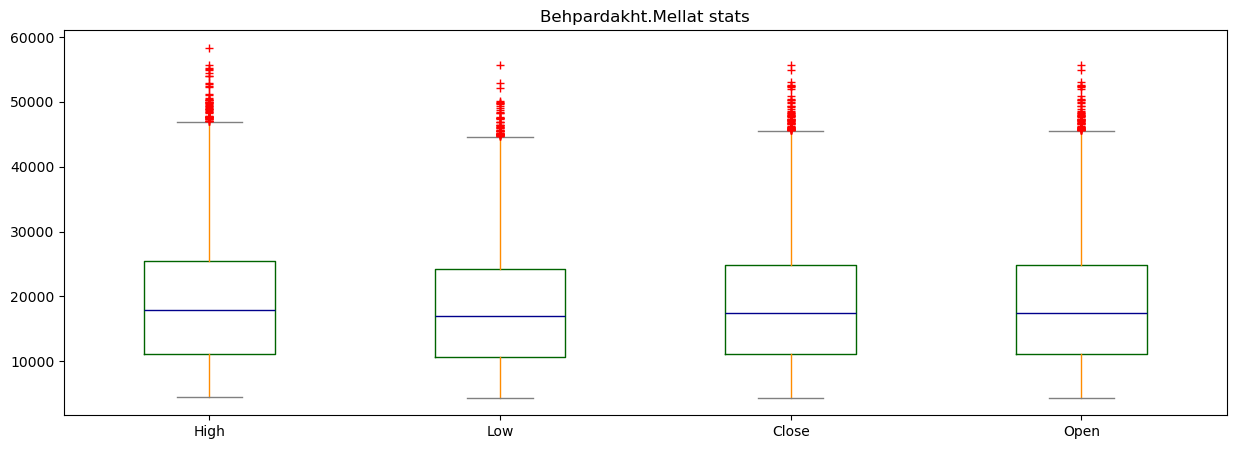

stock stats:
<bound method NDFrame.describe of                 Name       Date     High      Low    Close   Volume     Open
0     Iran.Kh..A..M. 2019-10-26   3450.0   3289.0   3296.0  9663049   3462.0
1     Iran.Kh..A..M. 2019-10-28   3460.0   3200.0   3444.0  8537462   3296.0
2     Iran.Kh..A..M. 2019-10-30   3616.0   3530.0   3607.0  7478387   3444.0
3     Iran.Kh..A..M. 2019-11-02   3779.0   3500.0   3648.0  9452988   3607.0
4     Iran.Kh..A..M. 2019-11-03   3830.0   3600.0   3790.0  8195580   3648.0
...              ...        ...      ...      ...      ...      ...      ...
1130  Iran.Kh..A..M. 2024-10-13  24180.0  24180.0  23890.0   381902  23480.0
1131  Iran.Kh..A..M. 2024-10-14  24600.0  24600.0  24360.0   439056  23890.0
1132  Iran.Kh..A..M. 2024-10-15  25090.0  23640.0  24830.0  2181608  24360.0
1133  Iran.Kh..A..M. 2024-10-16  25140.0  24090.0  24170.0   693513  24830.0
1134  Iran.Kh..A..M. 2024-10-19  23450.0  23450.0  24150.0    19281  24170.0

[1135 rows x 7 columns]>


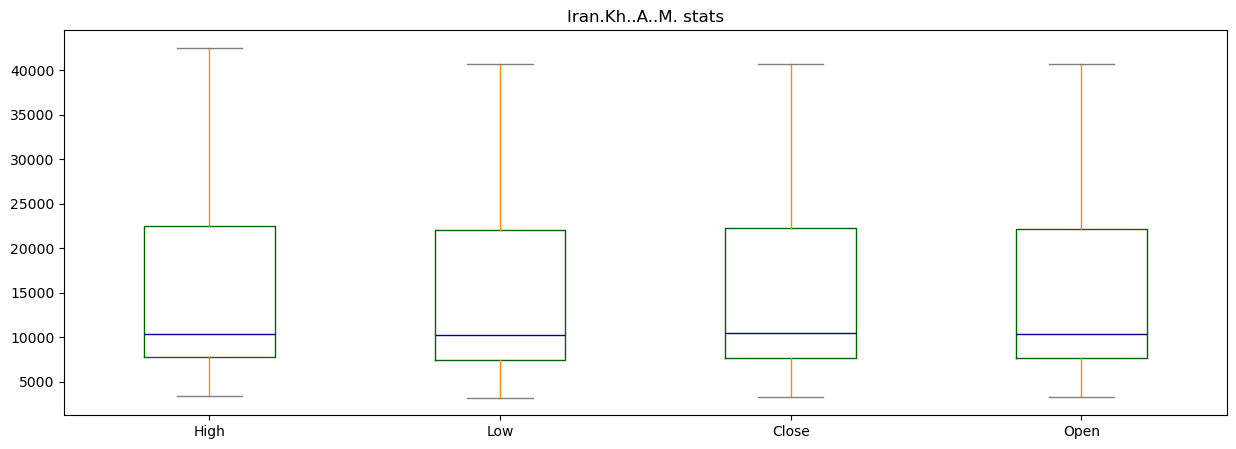

stock stats:
<bound method NDFrame.describe of                    Name       Date     High      Low    Close    Volume  \
0    IranAntibiotic.MFG 2024-02-07  22511.0  20000.0  20559.0  96347764   
1    IranAntibiotic.MFG 2024-02-10  21550.0  21550.0  21550.0   4105453   
2    IranAntibiotic.MFG 2024-02-12  22600.0  22600.0  22600.0   3901429   
3    IranAntibiotic.MFG 2024-02-13  23700.0  23700.0  23700.0   5796377   
4    IranAntibiotic.MFG 2024-02-14  24850.0  24850.0  24850.0   8578361   
..                  ...        ...      ...      ...      ...       ...   
150  IranAntibiotic.MFG 2024-10-13  22500.0  22500.0  22500.0   1161253   
151  IranAntibiotic.MFG 2024-10-14  23150.0  22200.0  22900.0   6403548   
152  IranAntibiotic.MFG 2024-10-15  22500.0  22250.0  22250.0   1403607   
153  IranAntibiotic.MFG 2024-10-16  22900.0  21700.0  22750.0   1268874   
154  IranAntibiotic.MFG 2024-10-19  23050.0  22100.0  22150.0   1377870   

        Open  
0     1000.0  
1    20559.0  
2    21

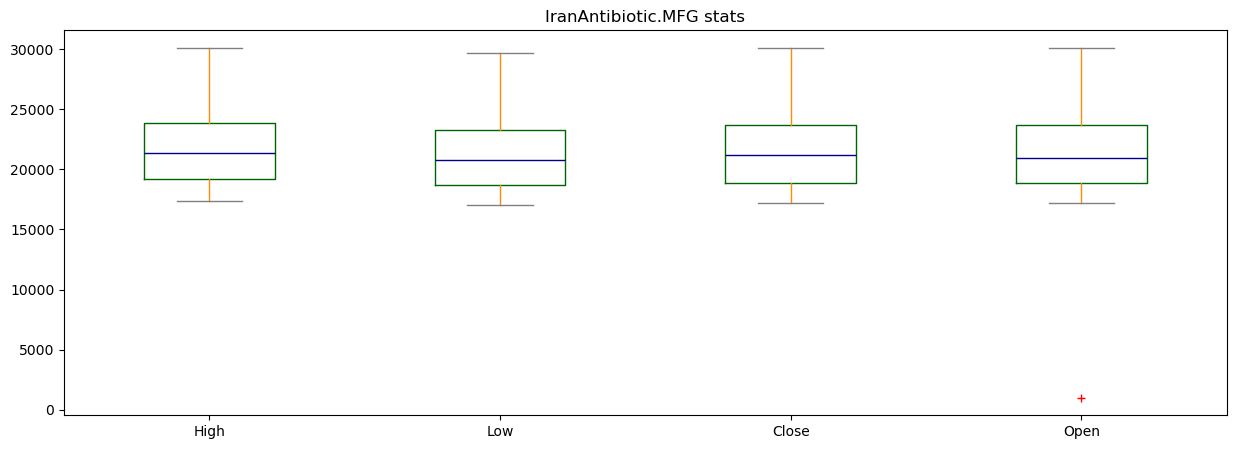

stock stats:
<bound method NDFrame.describe of        Name       Date     High      Low    Close    Volume     Open
0     MAPNA 2019-10-26   8793.0   8434.0   8507.0   4025586   8535.0
1     MAPNA 2019-10-28   8756.0   8570.0   8644.0   3396670   8507.0
2     MAPNA 2019-10-30   8990.0   8705.0   8849.0   6929651   8644.0
3     MAPNA 2019-11-02   9105.0   8428.0   8822.0   3698112   8850.0
4     MAPNA 2019-11-03   8958.0   8600.0   8798.0   7748497   8822.0
...     ...        ...      ...      ...      ...       ...      ...
1089  MAPNA 2024-10-13  11560.0  11130.0  11200.0  15671221  11470.0
1090  MAPNA 2024-10-14  11190.0  10870.0  11070.0   4432100  11200.0
1091  MAPNA 2024-10-15  10740.0  10740.0  11050.0    750361  11070.0
1092  MAPNA 2024-10-16  10720.0  10720.0  10990.0   1729490  11050.0
1093  MAPNA 2024-10-19  10670.0  10670.0  10950.0   1500022  10990.0

[1094 rows x 7 columns]>


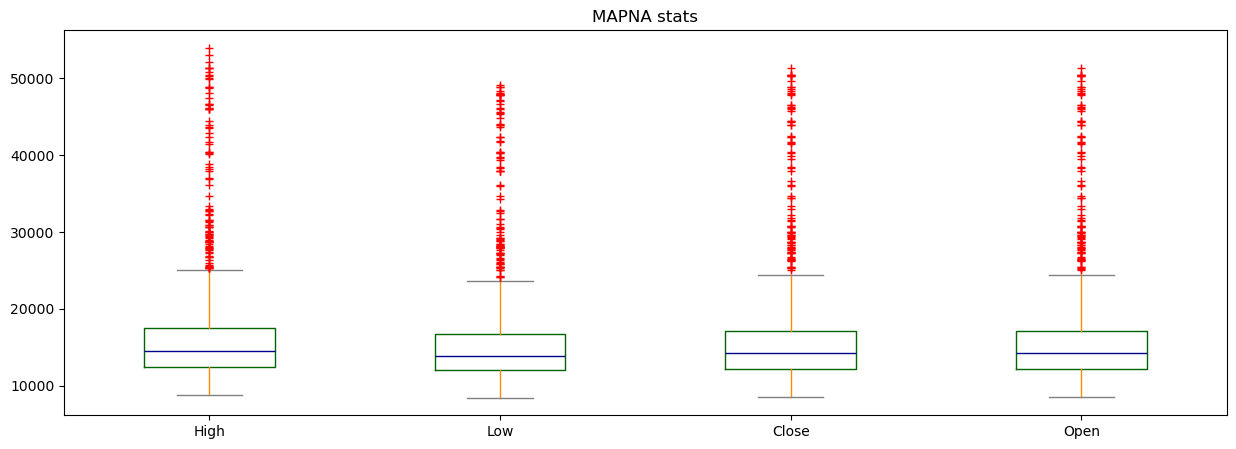

stock stats:
<bound method NDFrame.describe of                  Name       Date    High     Low   Close    Volume    Open
0     S*I..N..C..Ind. 2019-10-26  5450.0  5306.0  5376.0  12972981  5367.0
1     S*I..N..C..Ind. 2019-10-28  5410.0  5340.0  5383.0   9211254  5376.0
2     S*I..N..C..Ind. 2019-10-30  5421.0  5368.0  5390.0  17480460  5383.0
3     S*I..N..C..Ind. 2019-11-02  5398.0  5252.0  5358.0  15891464  5390.0
4     S*I..N..C..Ind. 2019-11-03  5400.0  5250.0  5331.0  12790315  5358.0
...               ...        ...     ...     ...     ...       ...     ...
1124  S*I..N..C..Ind. 2024-10-13  6480.0  6280.0  6380.0  60943119  6350.0
1125  S*I..N..C..Ind. 2024-10-14  6410.0  6220.0  6300.0  57560134  6380.0
1126  S*I..N..C..Ind. 2024-10-15  6270.0  6120.0  6170.0  57098404  6300.0
1127  S*I..N..C..Ind. 2024-10-16  6280.0  6120.0  6190.0  38337686  6170.0
1128  S*I..N..C..Ind. 2024-10-19  6180.0  6010.0  6020.0  73686321  6190.0

[1129 rows x 7 columns]>


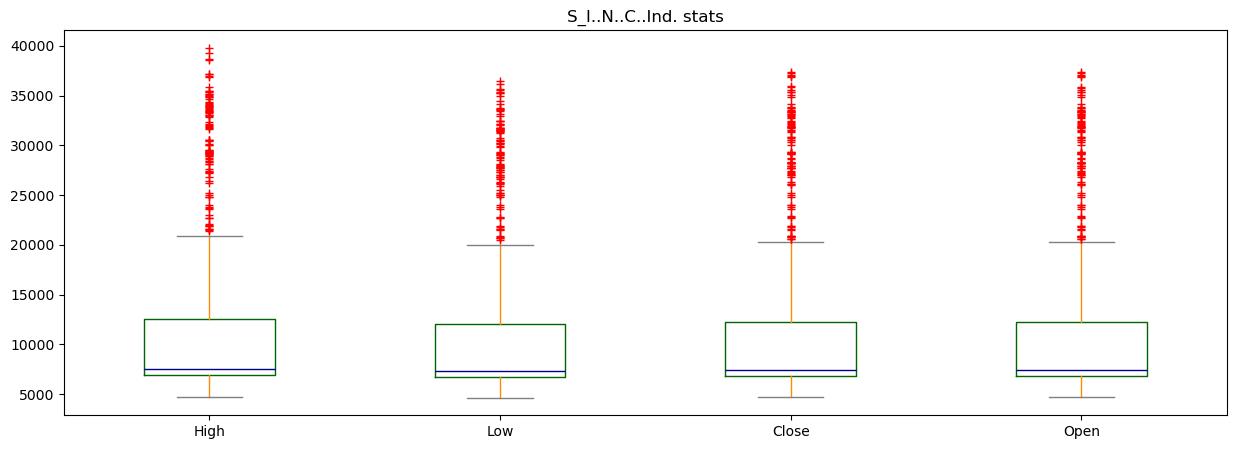

stock stats:
<bound method NDFrame.describe of                     Name       Date    High     Low   Close     Volume    Open
0     S*Isf..Oil.Ref.Co. 2019-10-26  5730.0  5536.0  5578.0   12795545  5636.0
1     S*Isf..Oil.Ref.Co. 2019-10-28  5619.0  5548.0  5579.0   14554246  5578.0
2     S*Isf..Oil.Ref.Co. 2019-10-30  5688.0  5577.0  5608.0   14108569  5579.0
3     S*Isf..Oil.Ref.Co. 2019-11-02  5701.0  5531.0  5575.0   15486688  5608.0
4     S*Isf..Oil.Ref.Co. 2019-11-03  5590.0  5480.0  5543.0   15982561  5575.0
...                  ...        ...     ...     ...     ...        ...     ...
1116  S*Isf..Oil.Ref.Co. 2024-10-13  3910.0  3745.0  3787.0  118253185  3860.0
1117  S*Isf..Oil.Ref.Co. 2024-10-14  3800.0  3674.0  3683.0   58739101  3787.0
1118  S*Isf..Oil.Ref.Co. 2024-10-15  3600.0  3573.0  3573.0   93824156  3683.0
1119  S*Isf..Oil.Ref.Co. 2024-10-16  3600.0  3468.0  3512.0   91443440  3573.0
1120  S*Isf..Oil.Ref.Co. 2024-10-19  3491.0  3407.0  3410.0   40488704  3512.0

[112

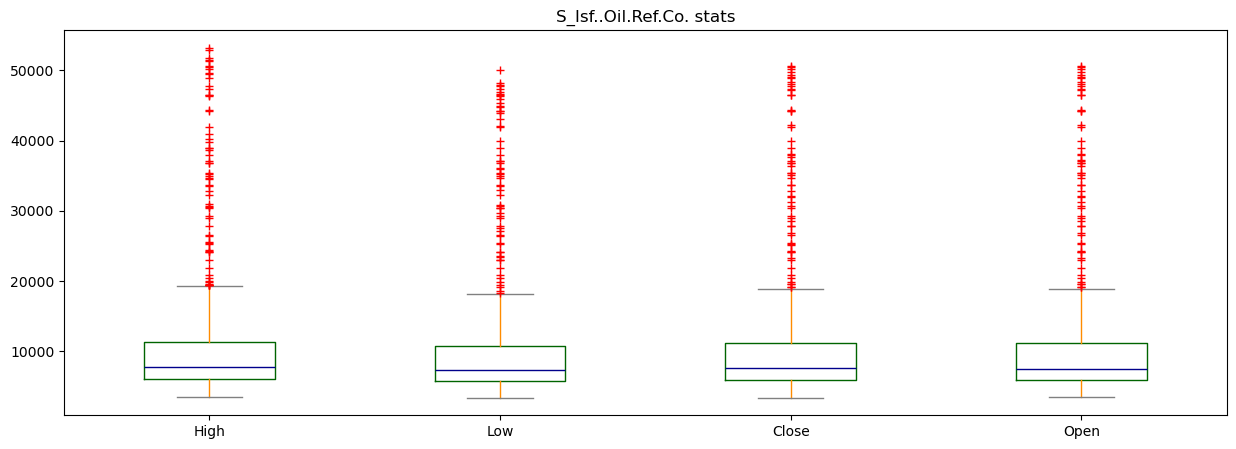

In [4]:
stock_holder.describe_plot(SAMPLE_STOCK_NAME)

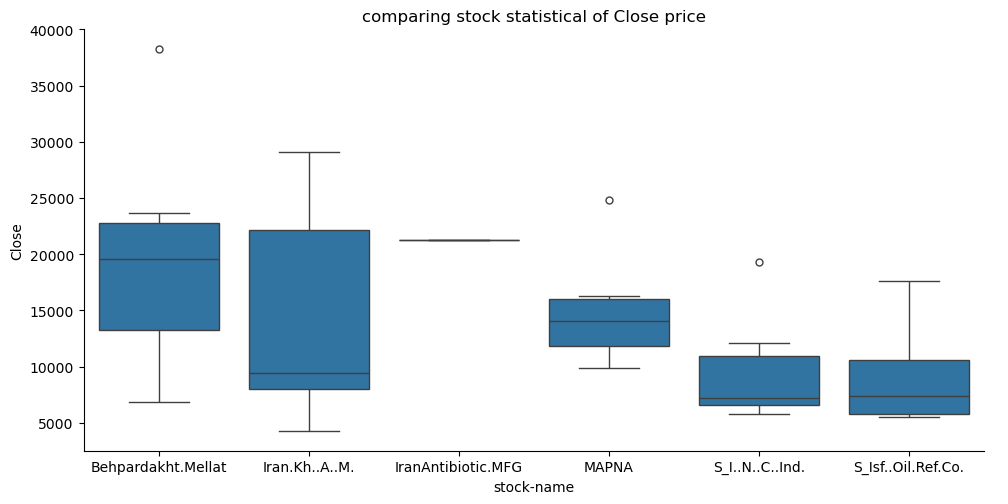

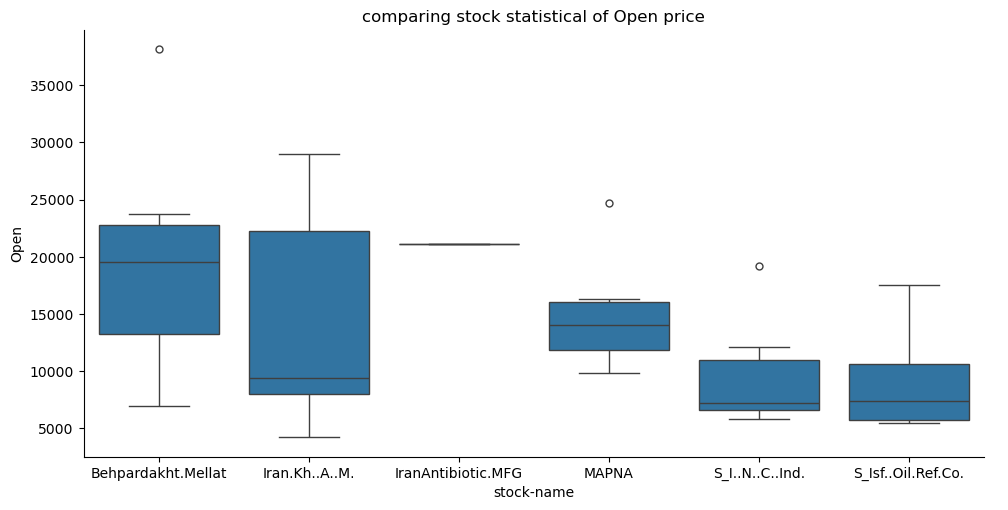

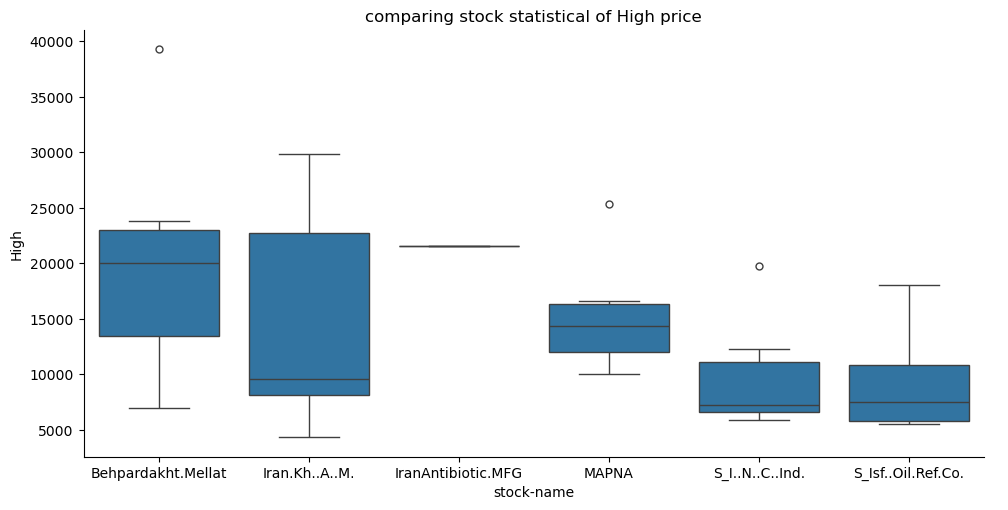

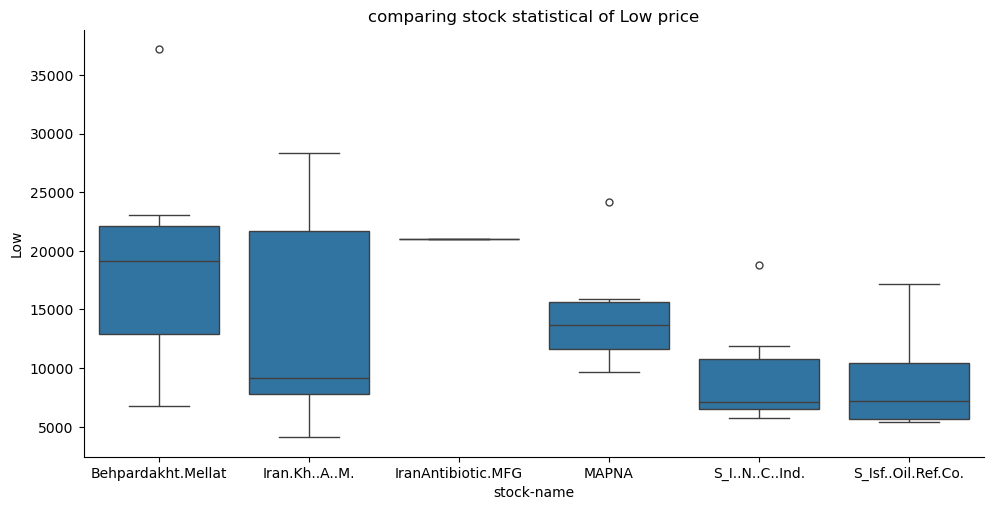

In [5]:
stock_holder.describe_together_single_col()
# stock_holder.describe_together_all_cols() for comparing stats of all columns

### closing - opening price

last 100 days

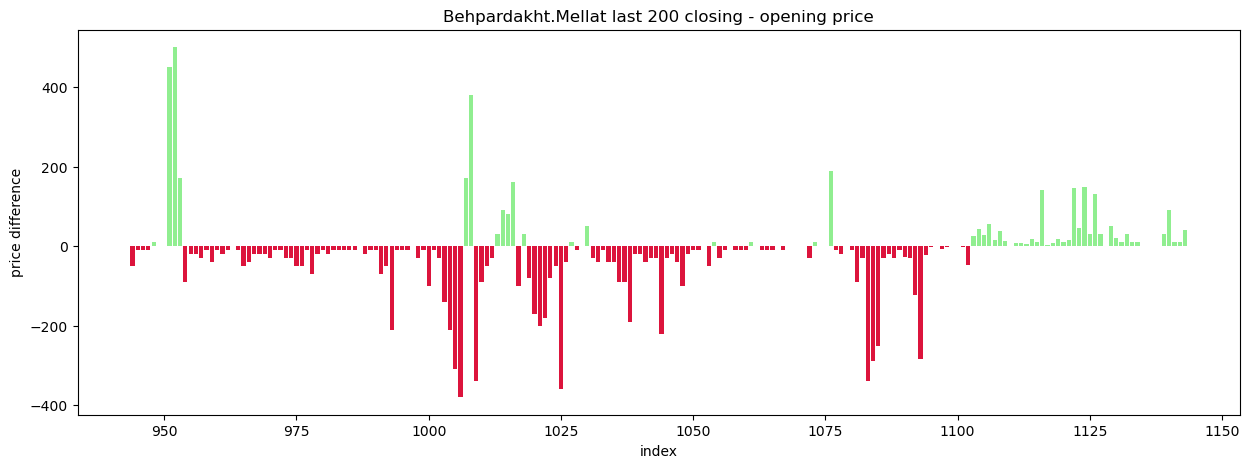

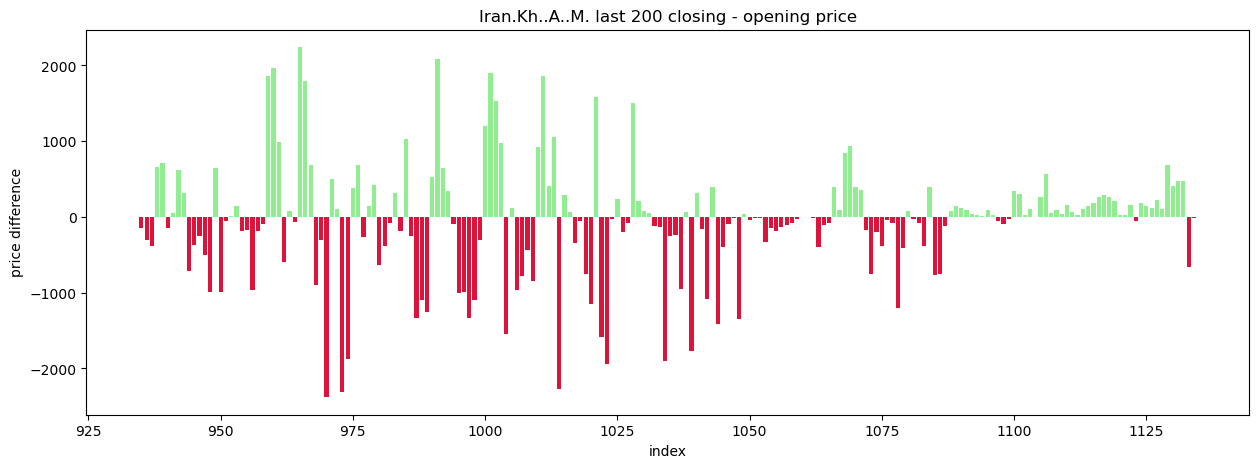

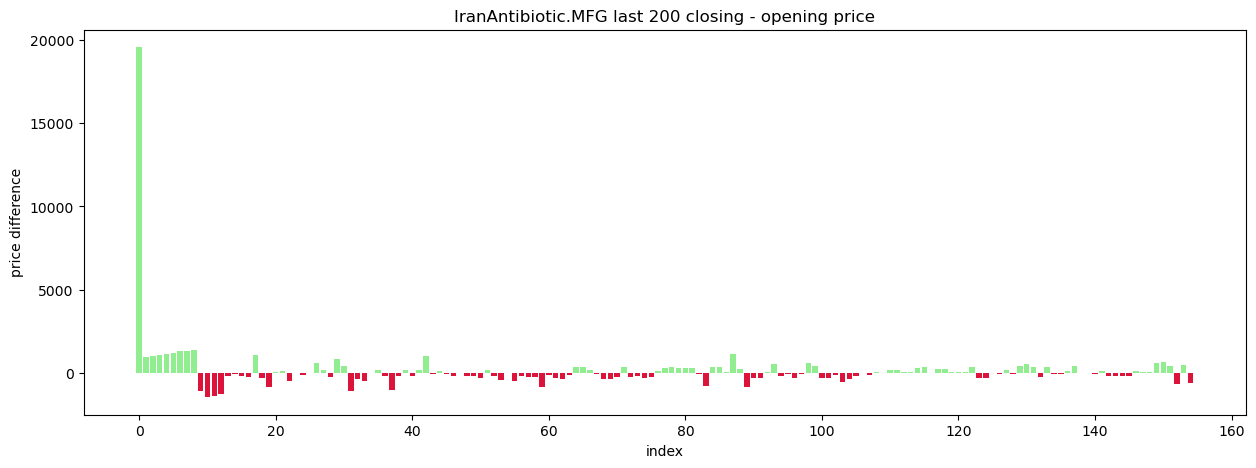

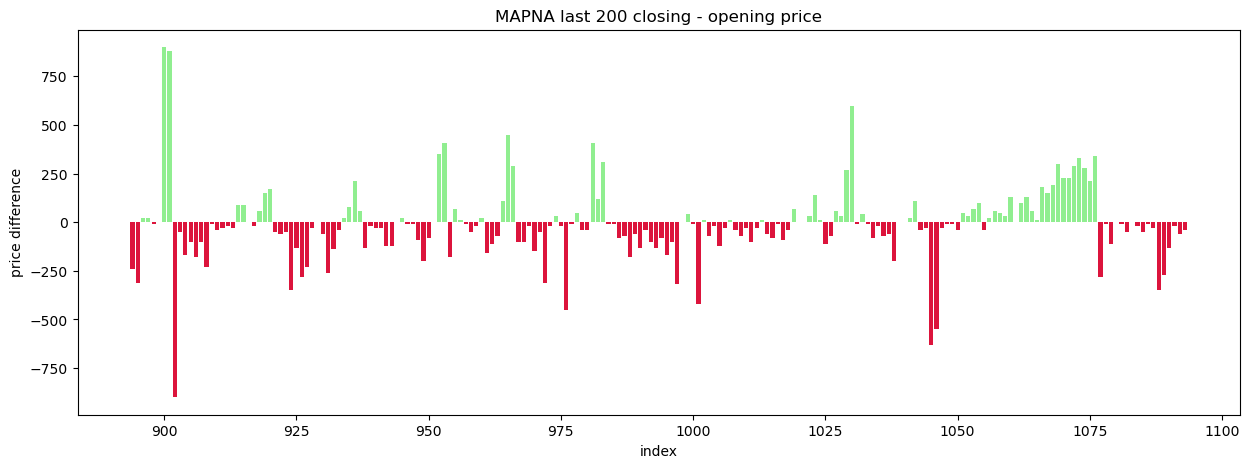

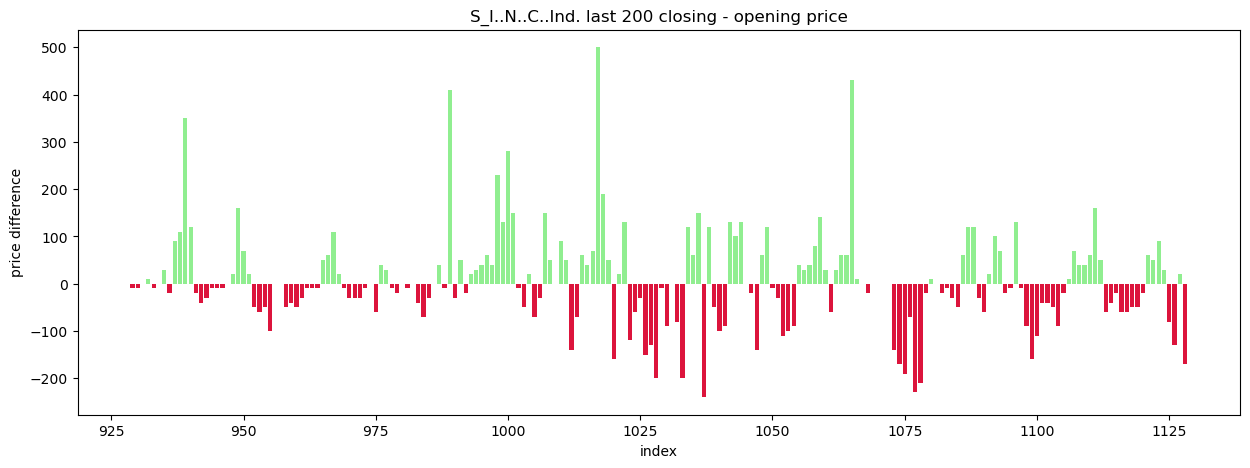

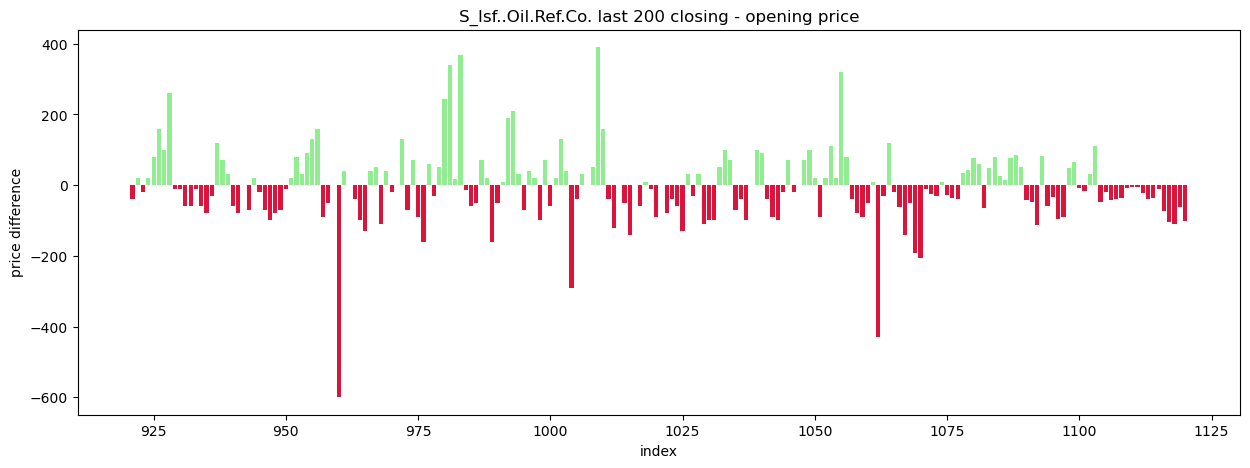

In [6]:
stock_holder.close_open_diff(SAMPLE_STOCK_NAME, period_in_day=200, is_head=False)

#### year by year mean

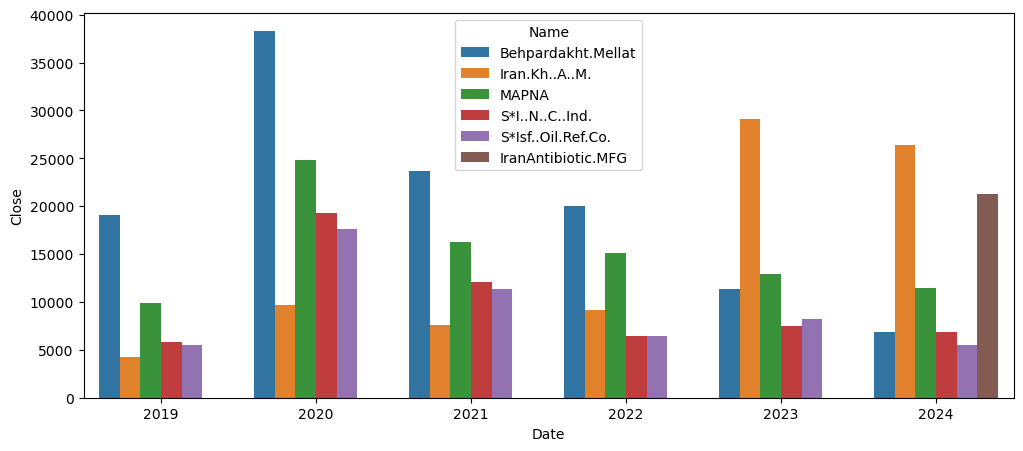

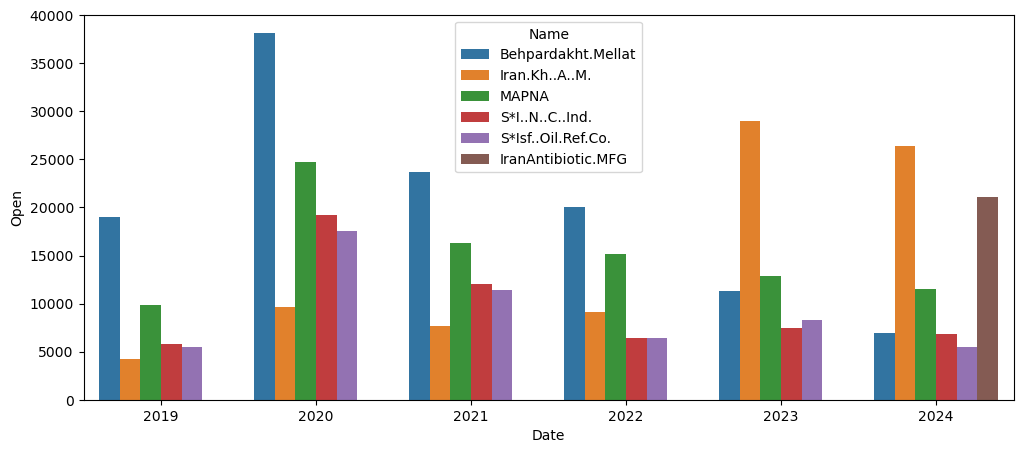

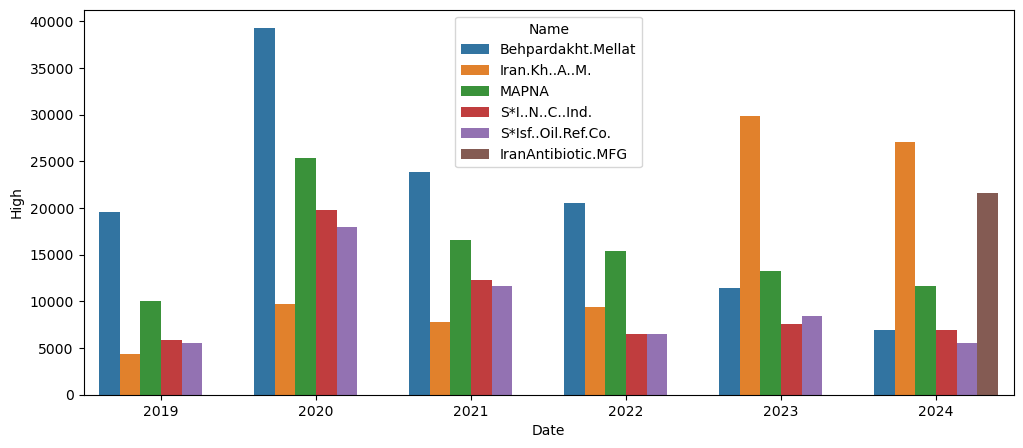

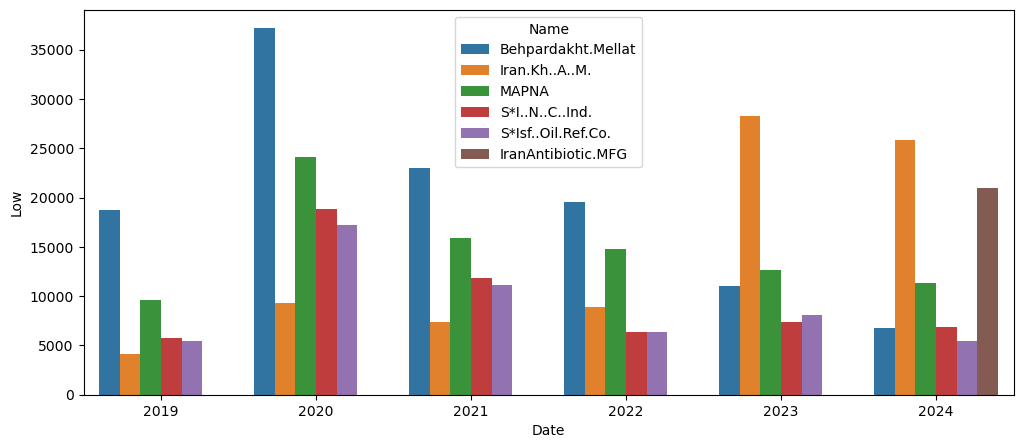

In [7]:
stock_holder.year_mean_compare(col=SAMPLE_COLUMN_NAME)

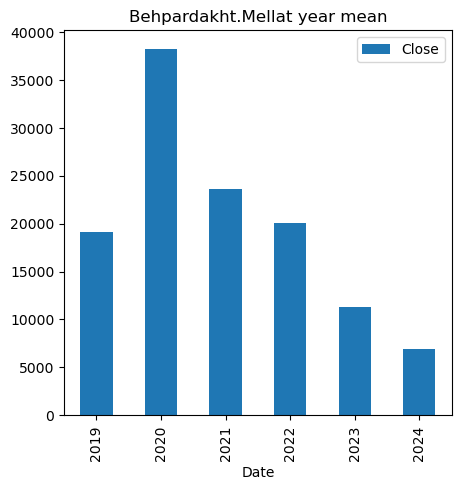

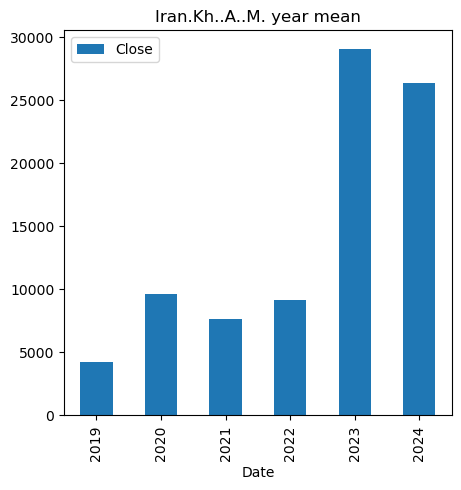

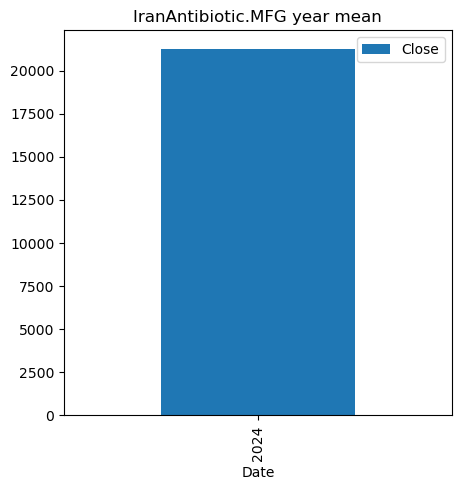

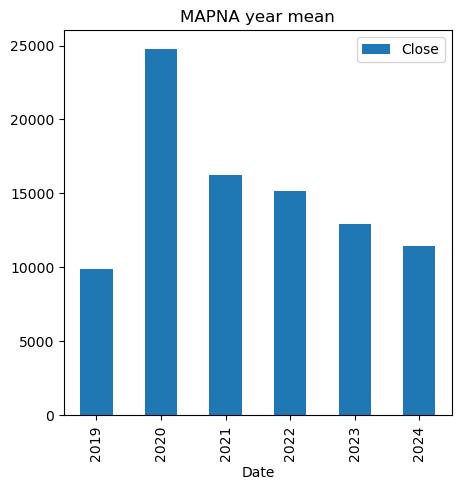

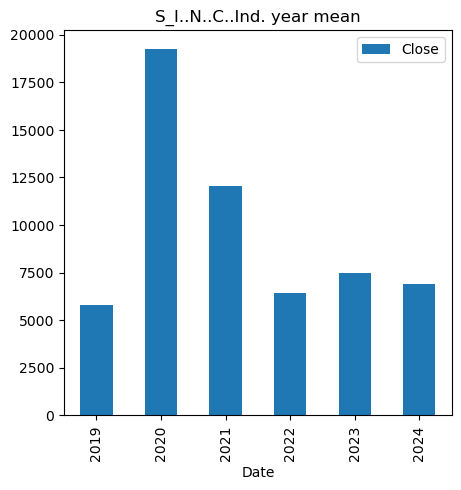

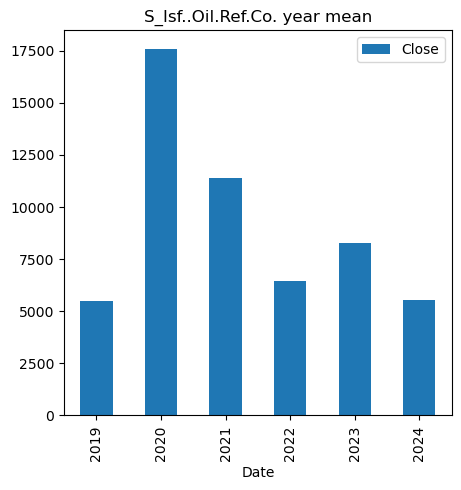

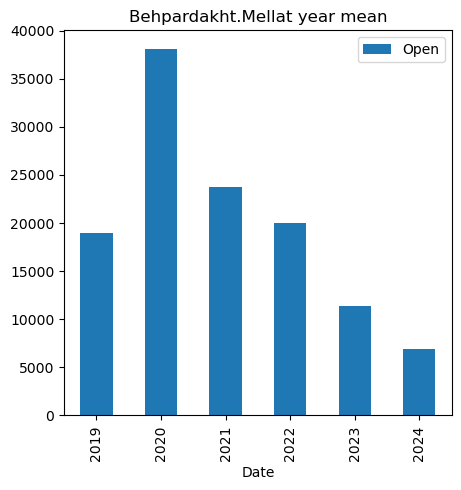

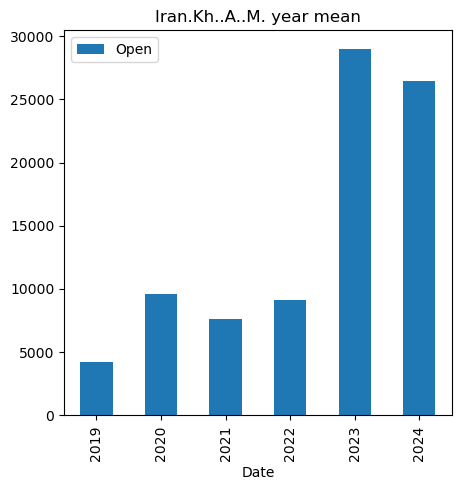

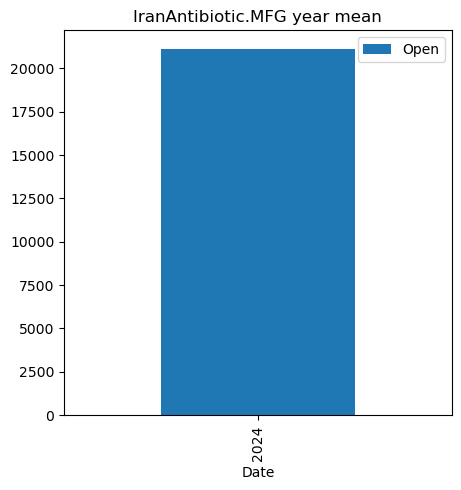

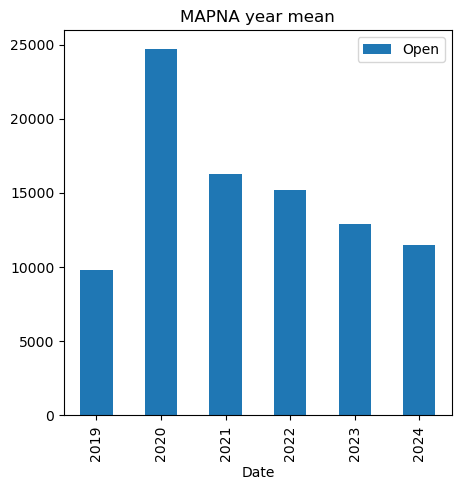

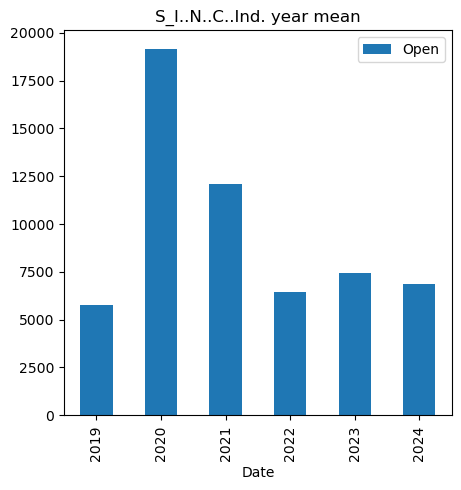

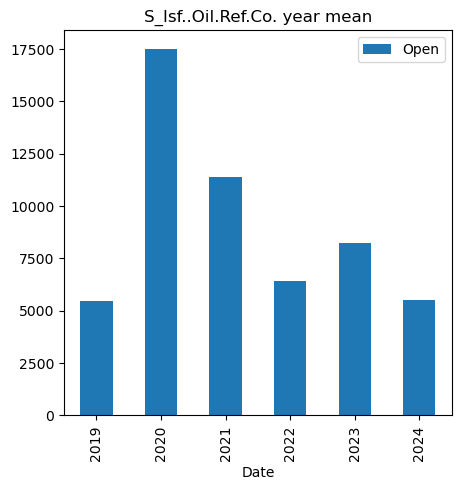

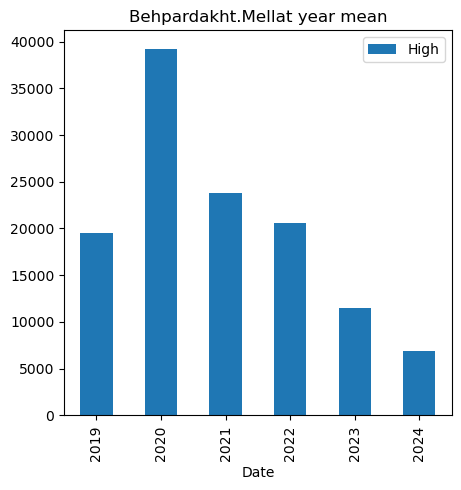

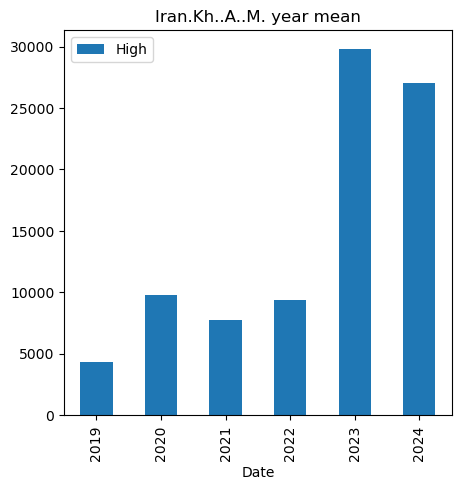

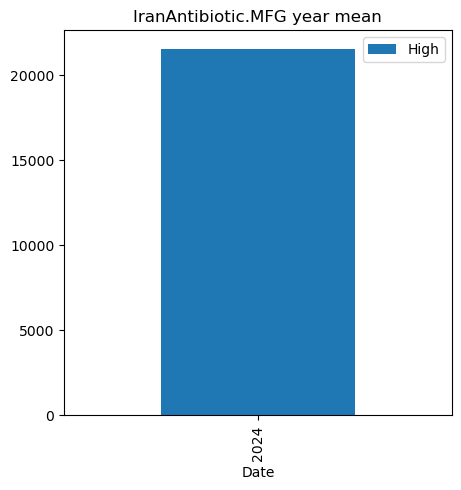

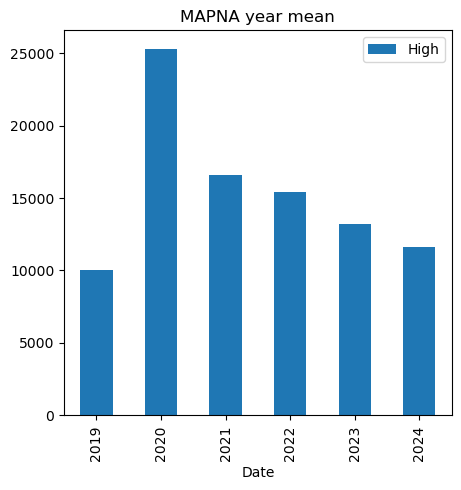

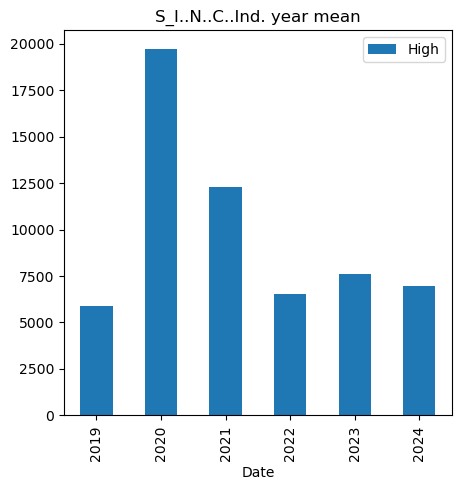

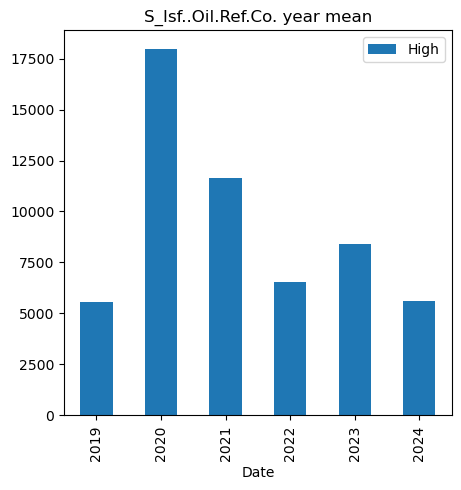

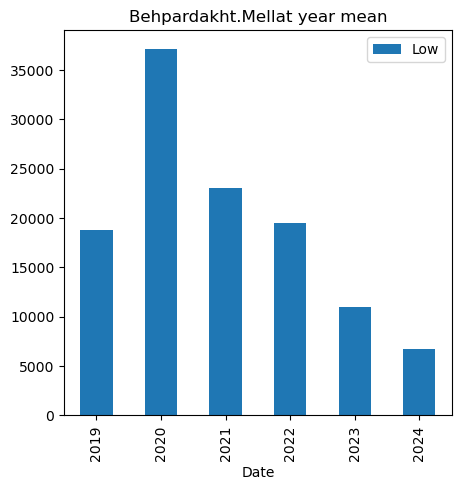

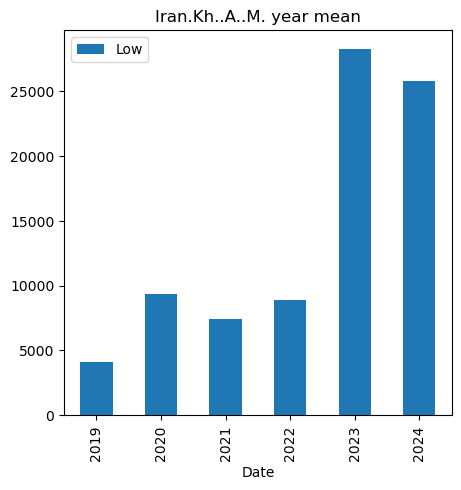

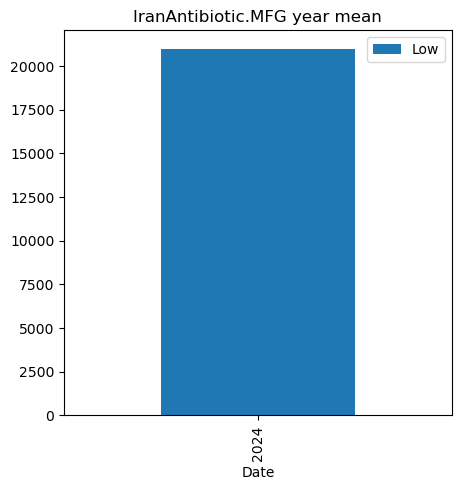

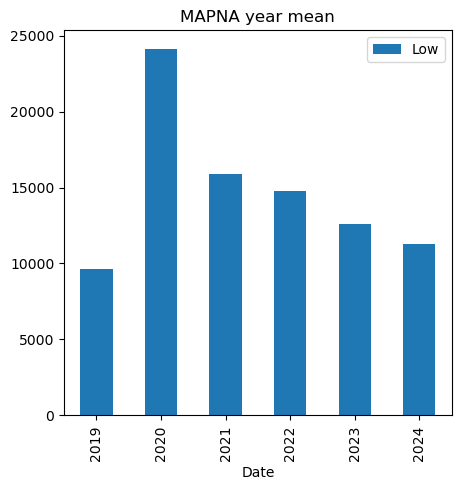

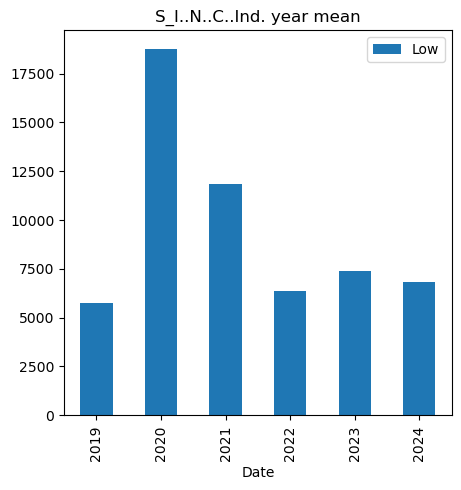

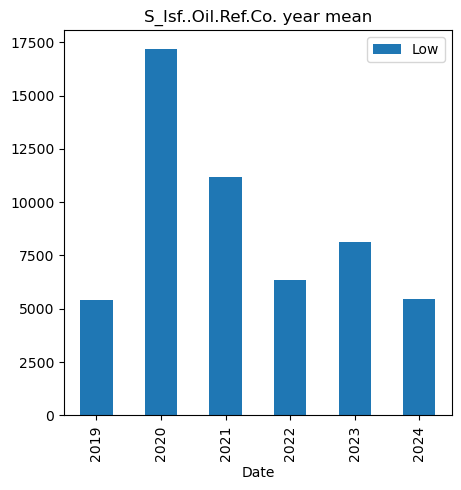

In [8]:
stock_holder.year_mean(SAMPLE_STOCK_NAME, figsize=(5, 5))

#### each year mean - average of last five years

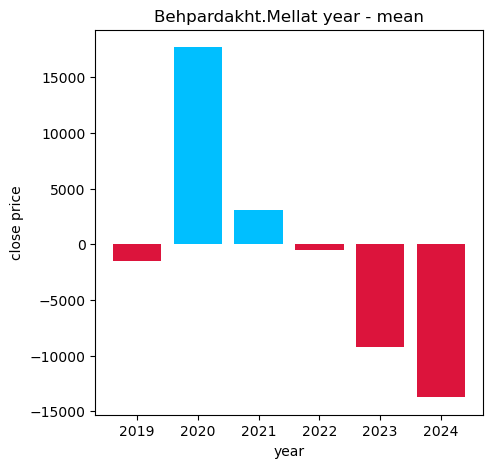

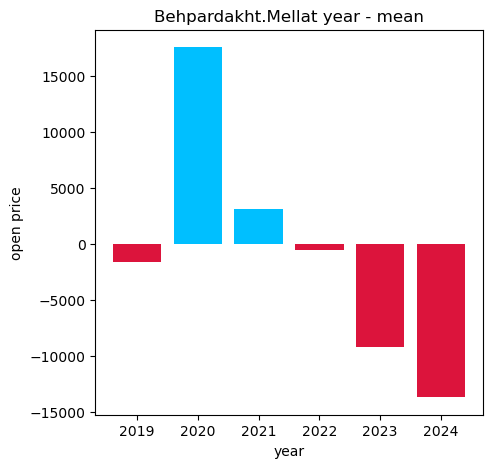

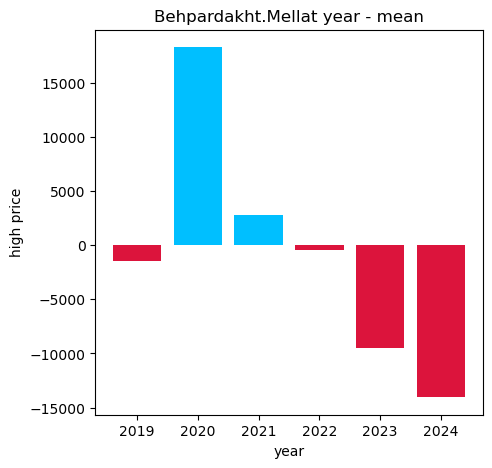

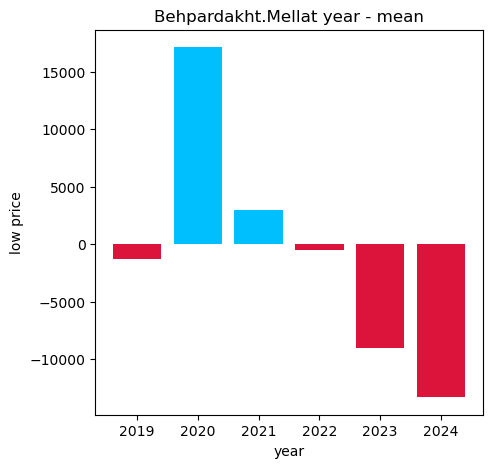

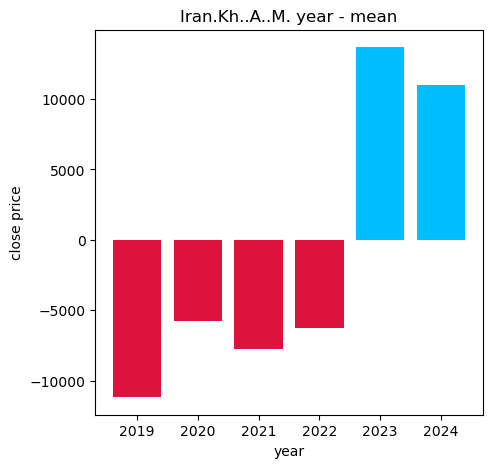

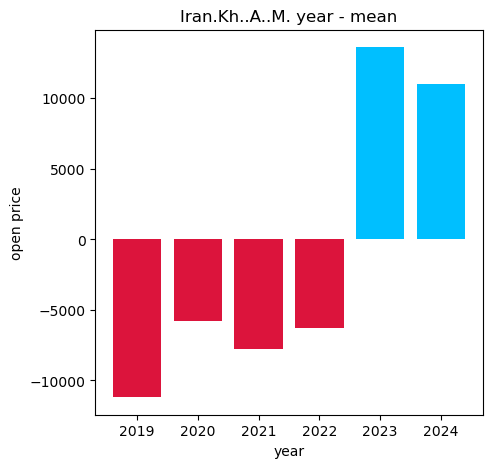

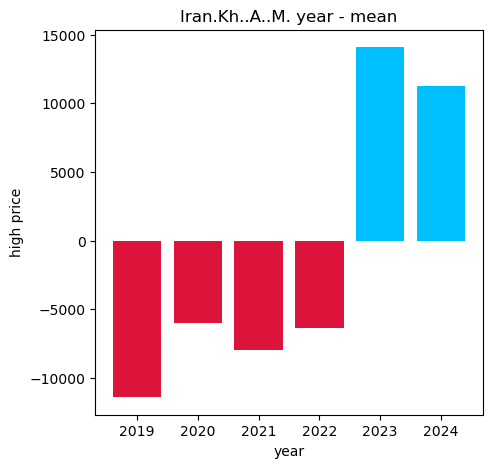

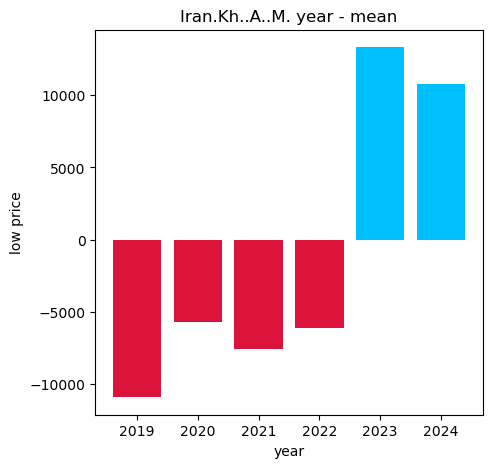

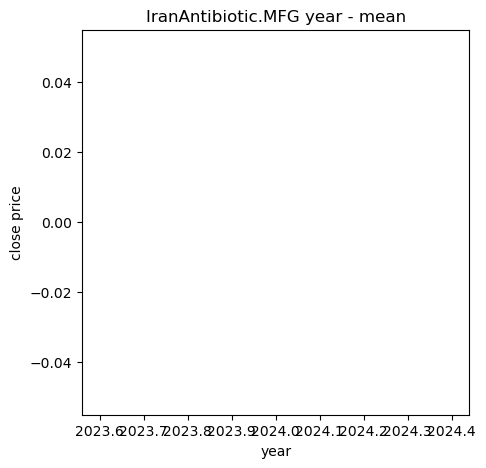

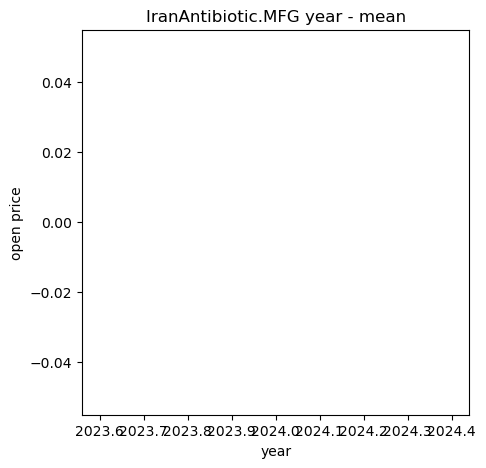

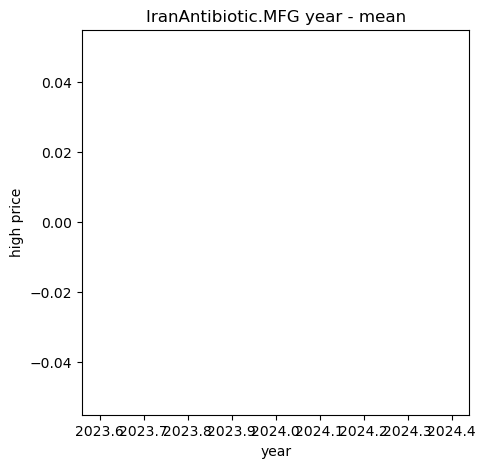

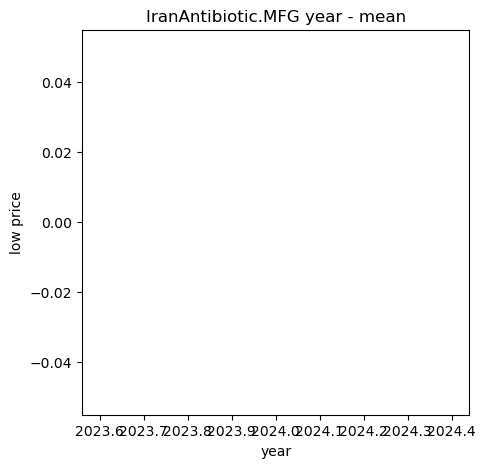

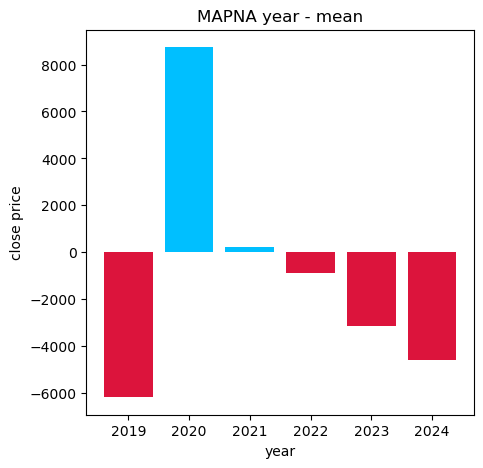

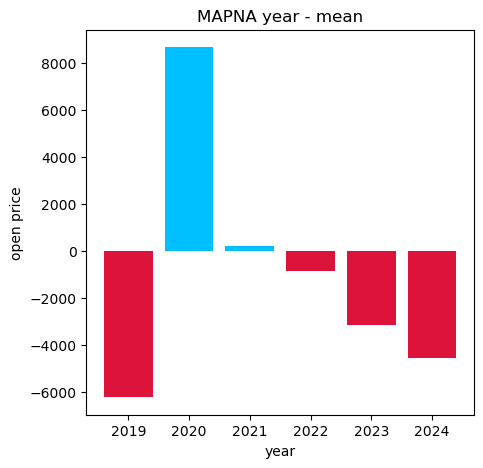

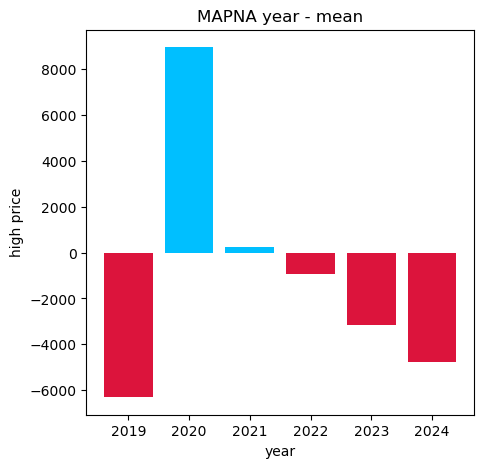

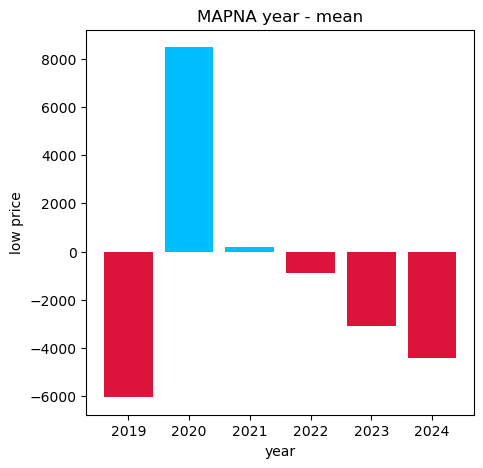

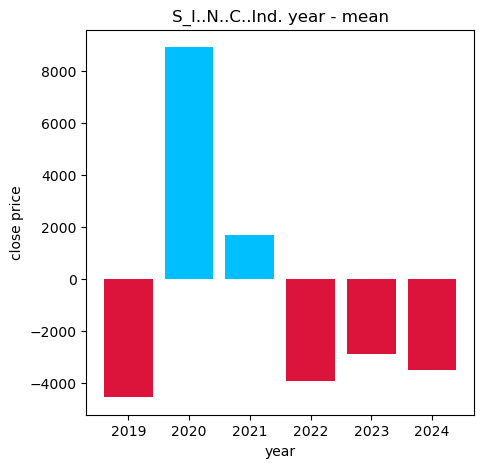

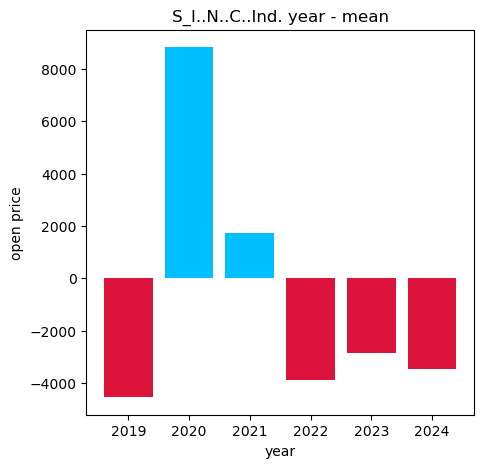

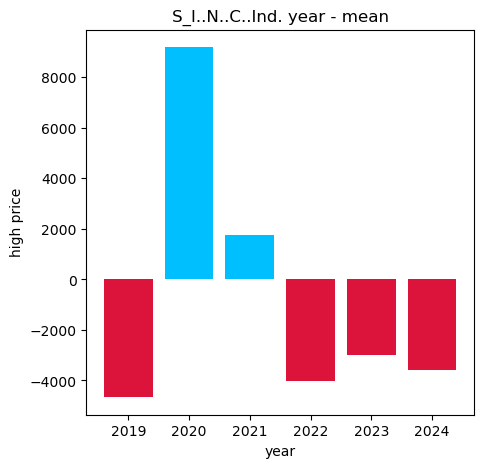

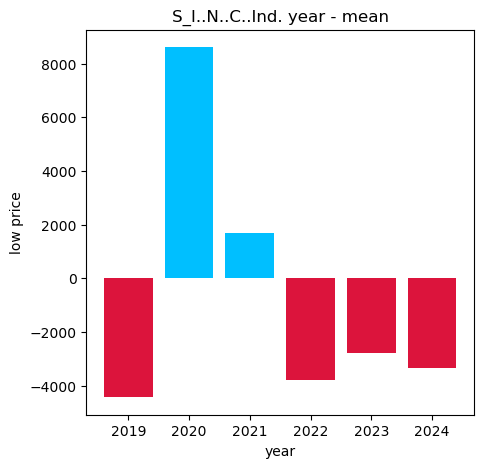

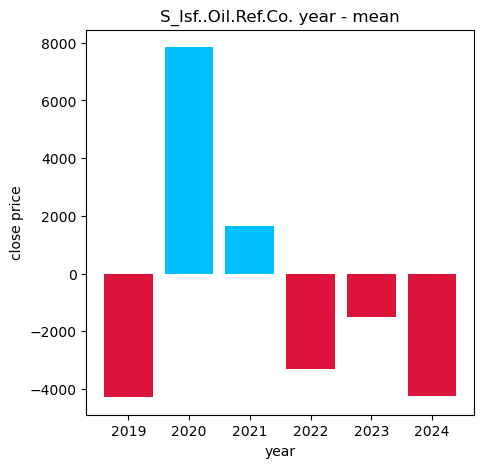

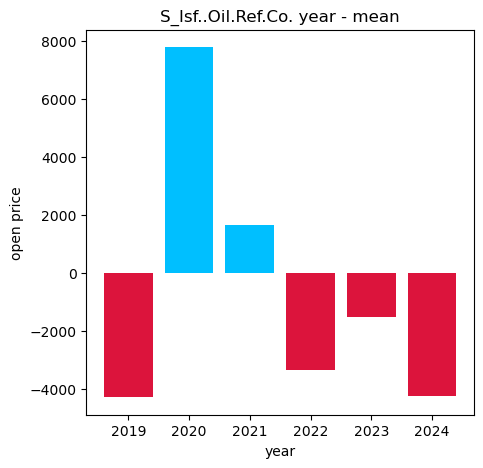

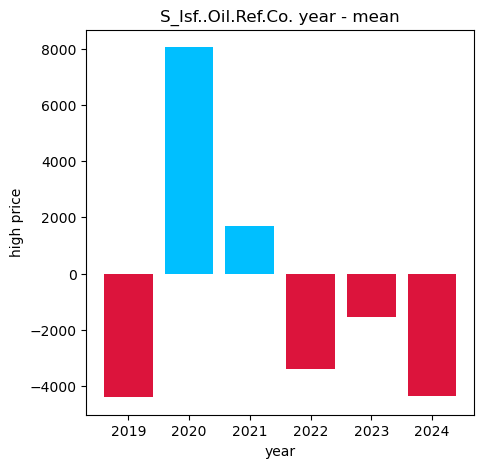

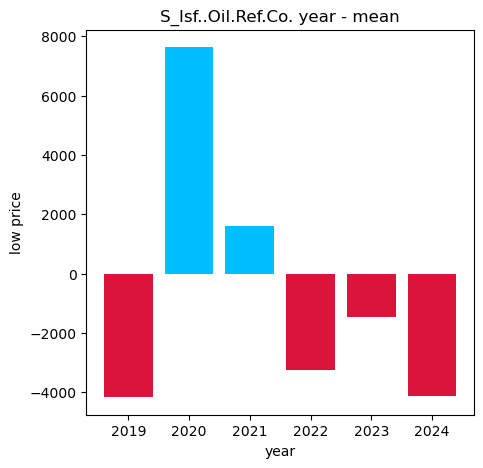

In [9]:
stock_holder.year_mean_diff(SAMPLE_STOCK_NAME, col=SAMPLE_COLUMN_NAME, figsize=(5, 5))

### Data visualization

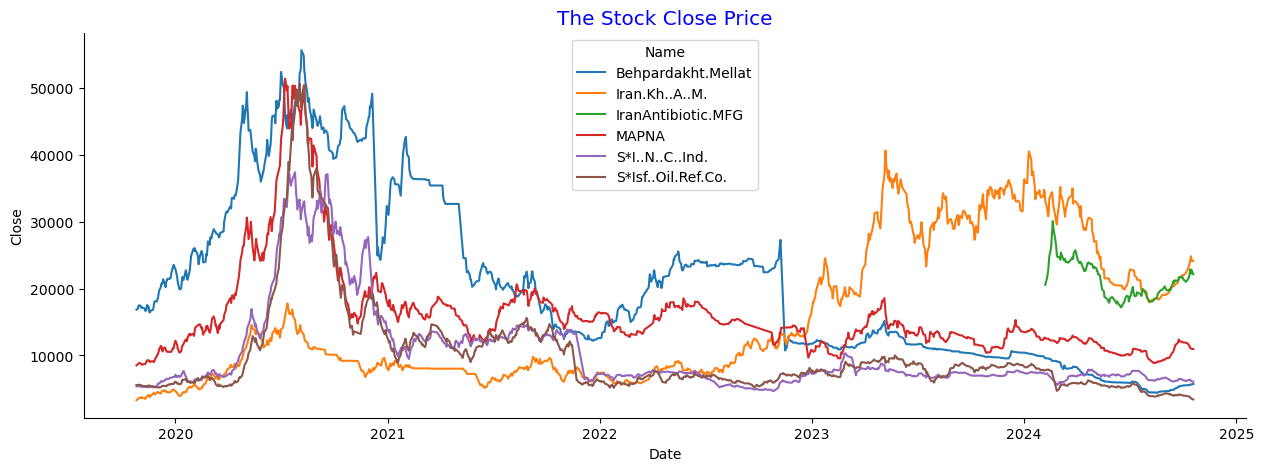

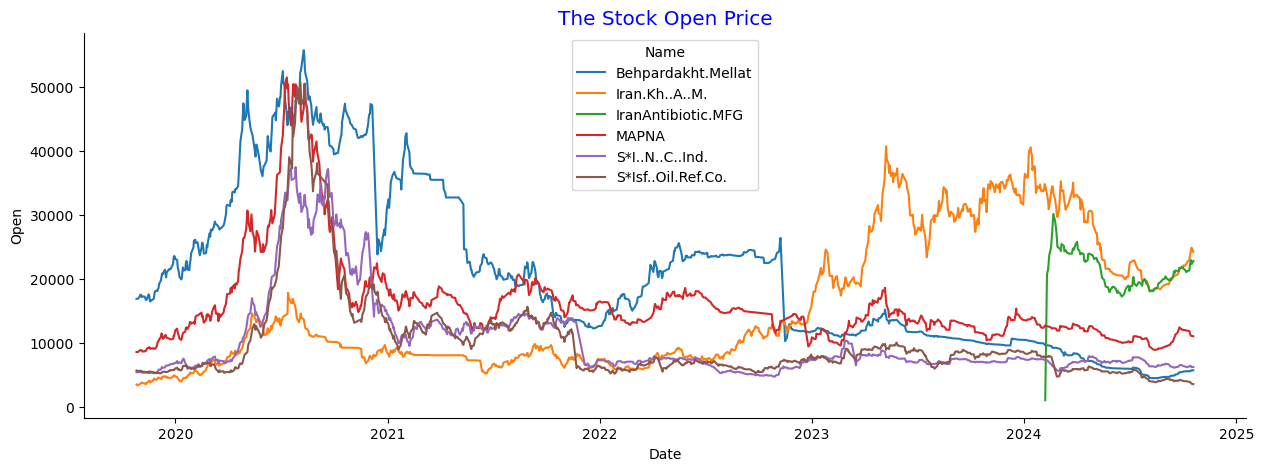

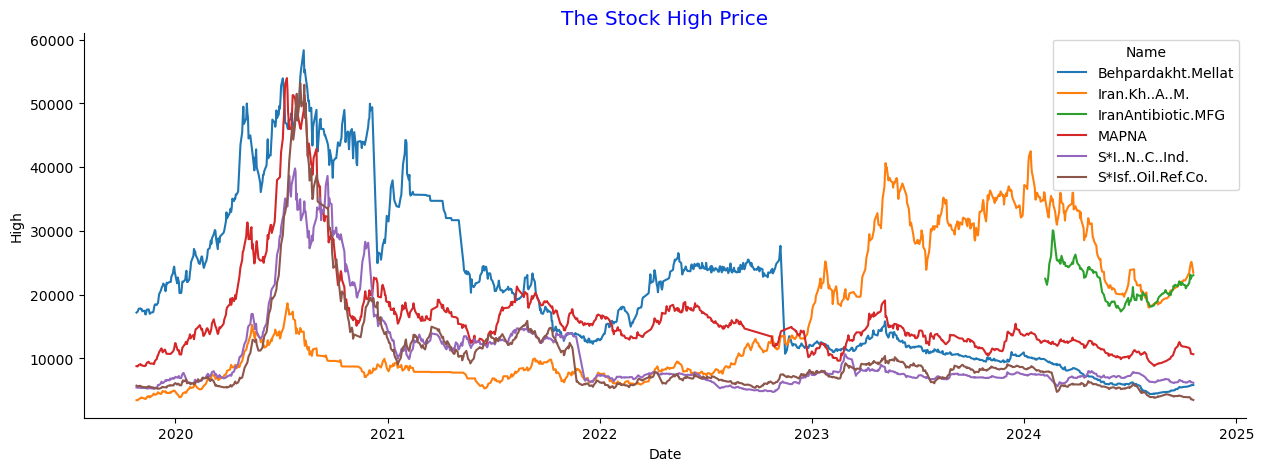

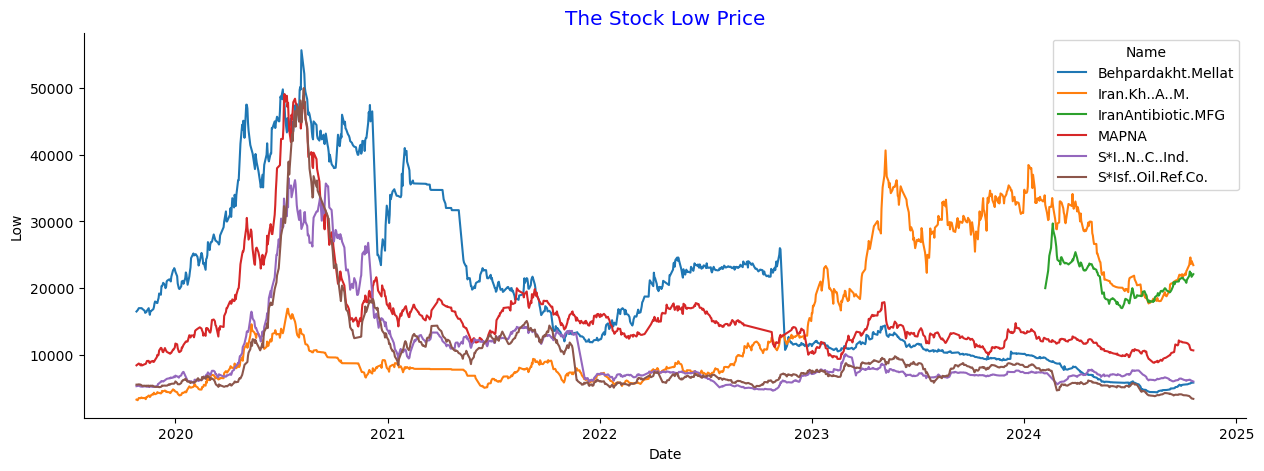

In [10]:
stock_holder.data_plot_compare(col=SAMPLE_COLUMN_NAME)

single stock

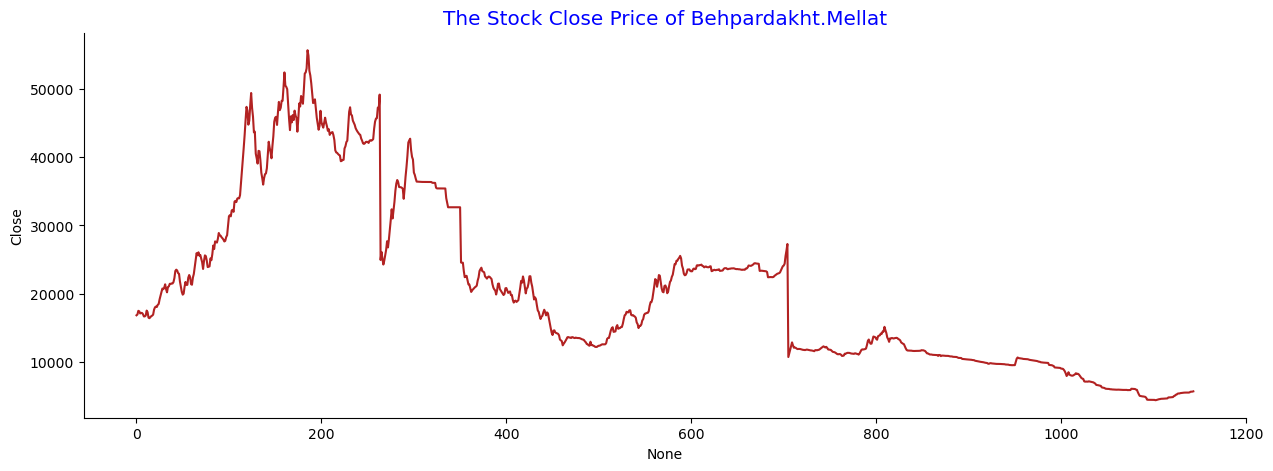

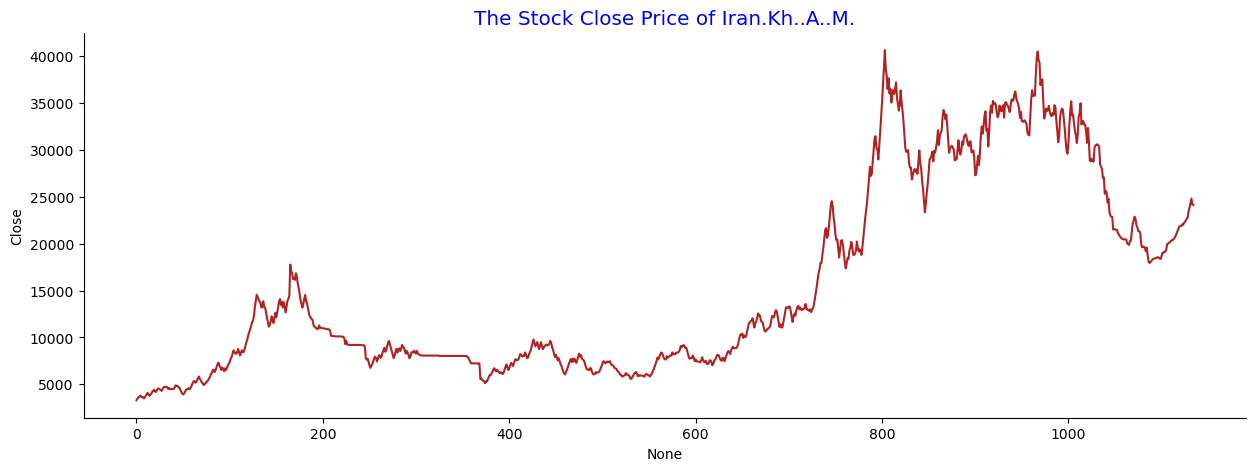

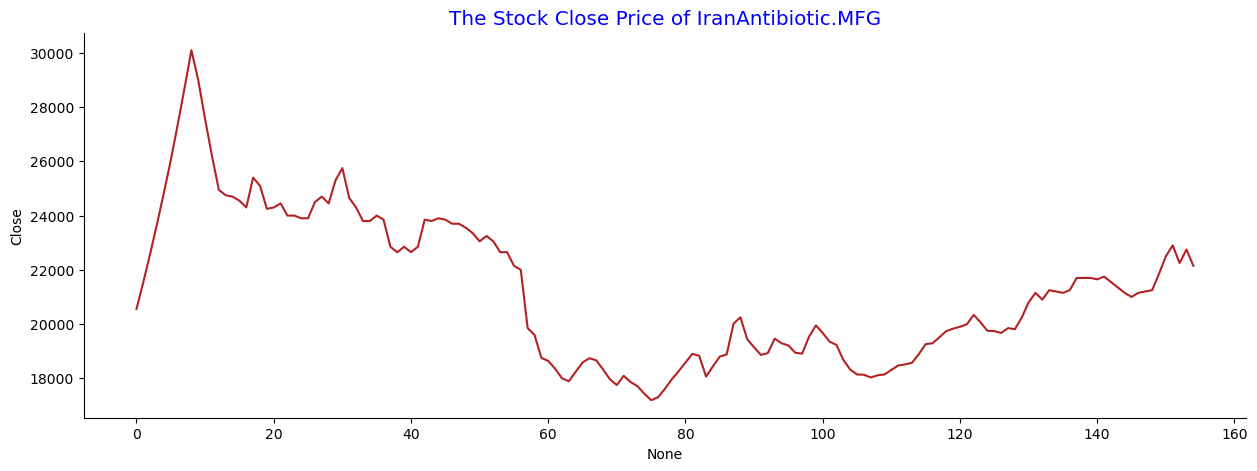

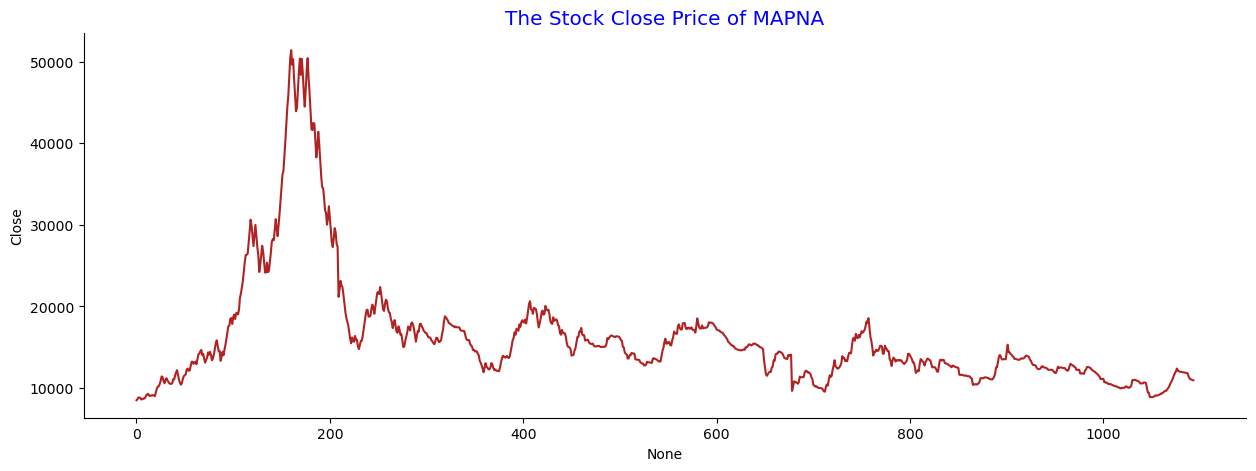

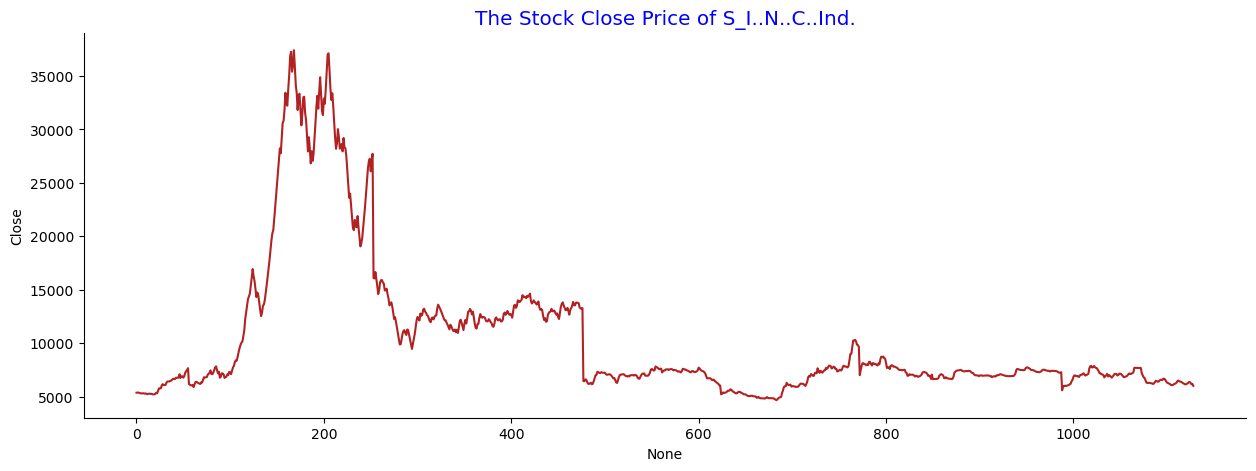

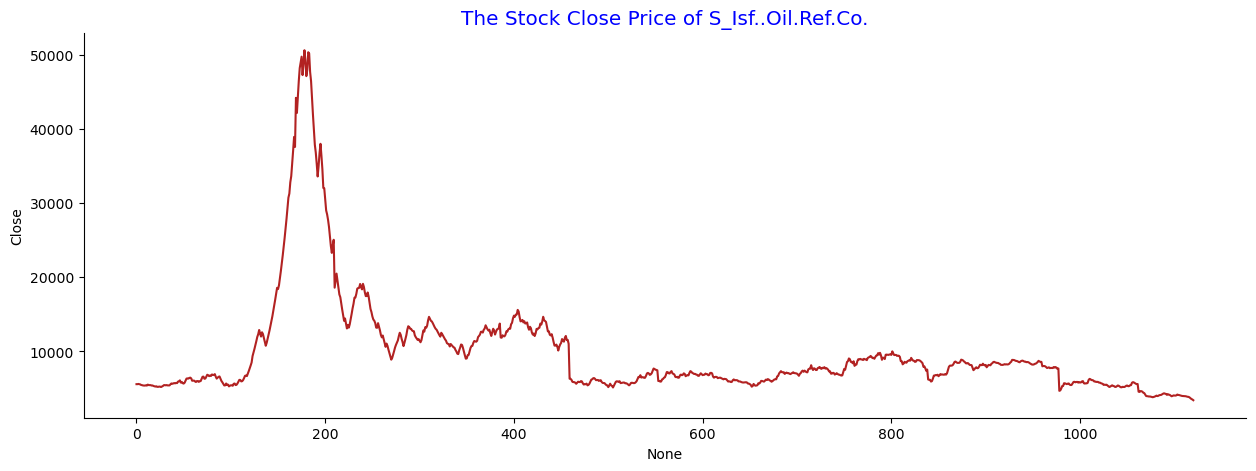

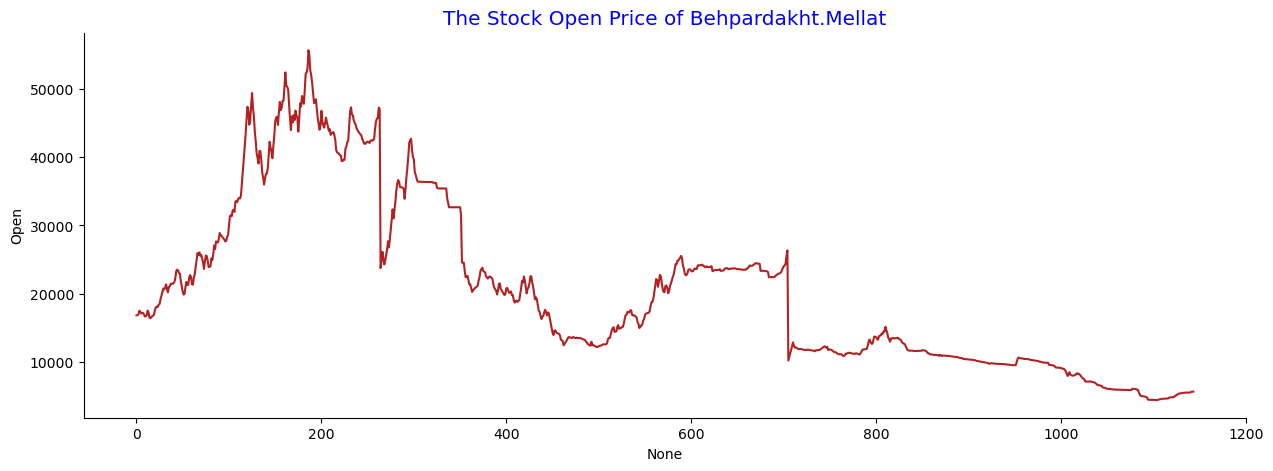

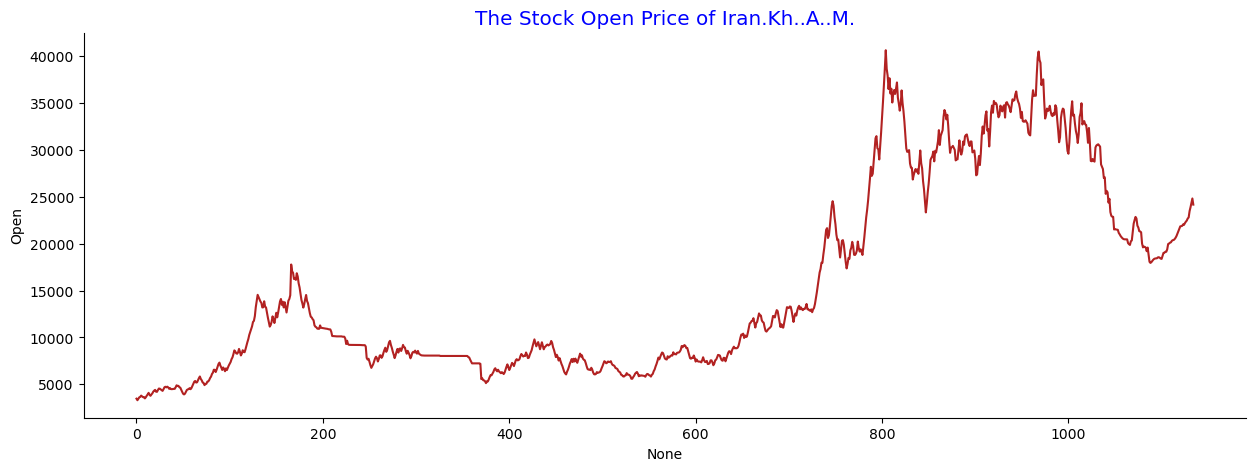

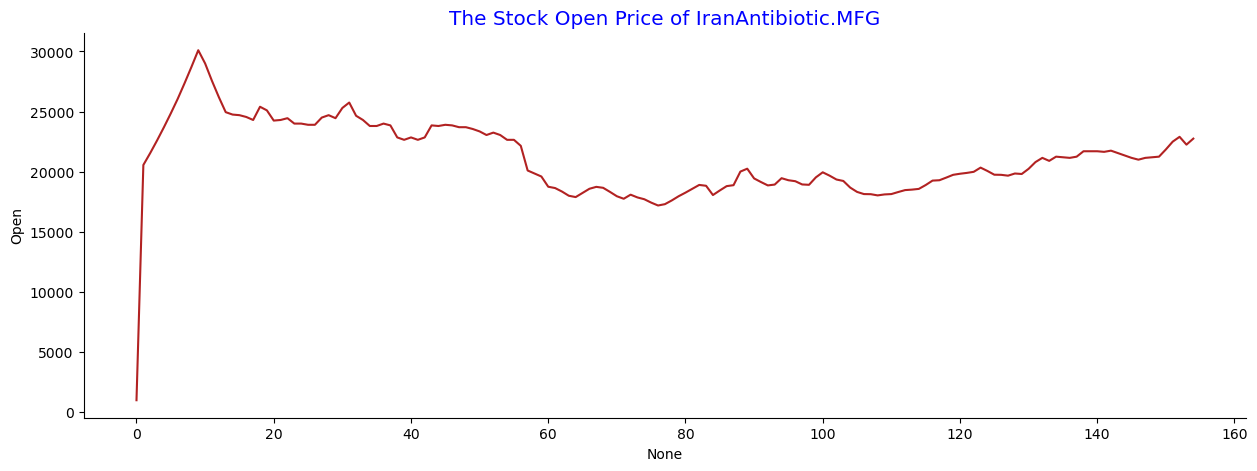

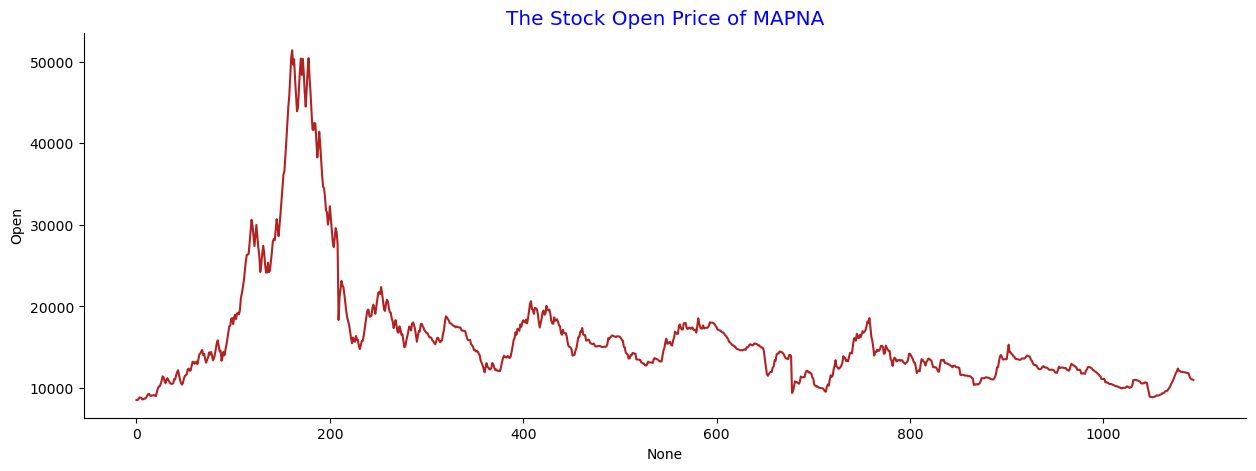

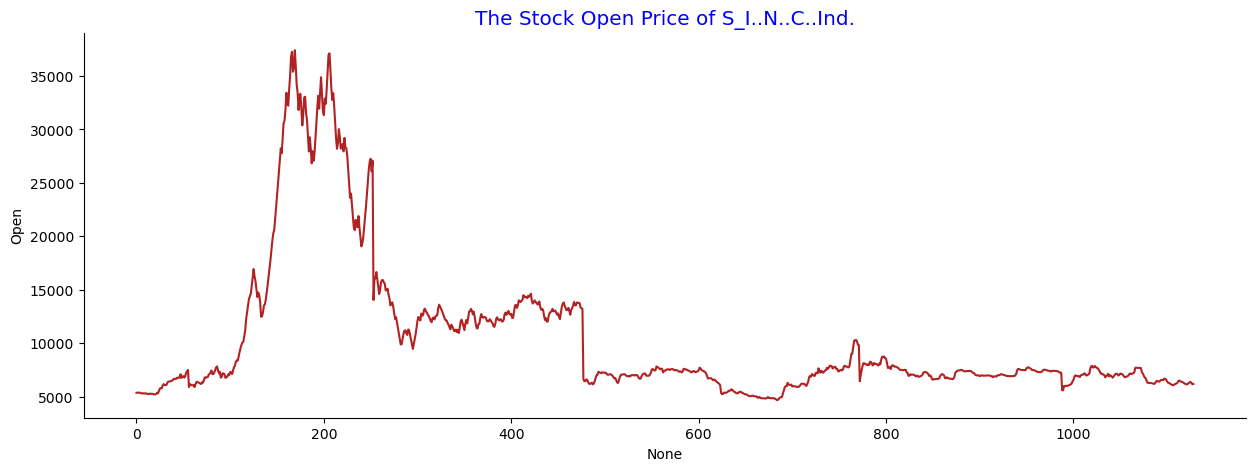

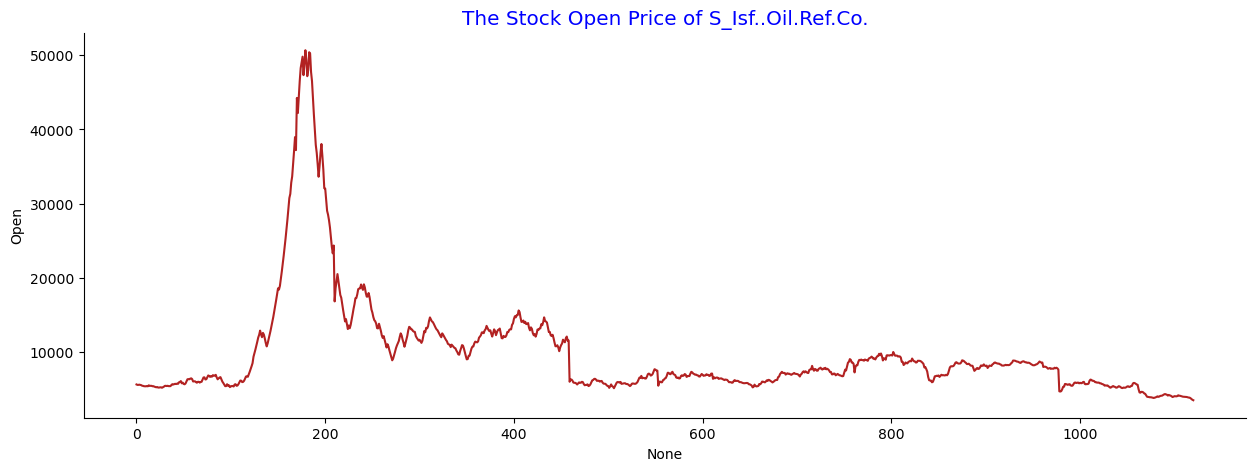

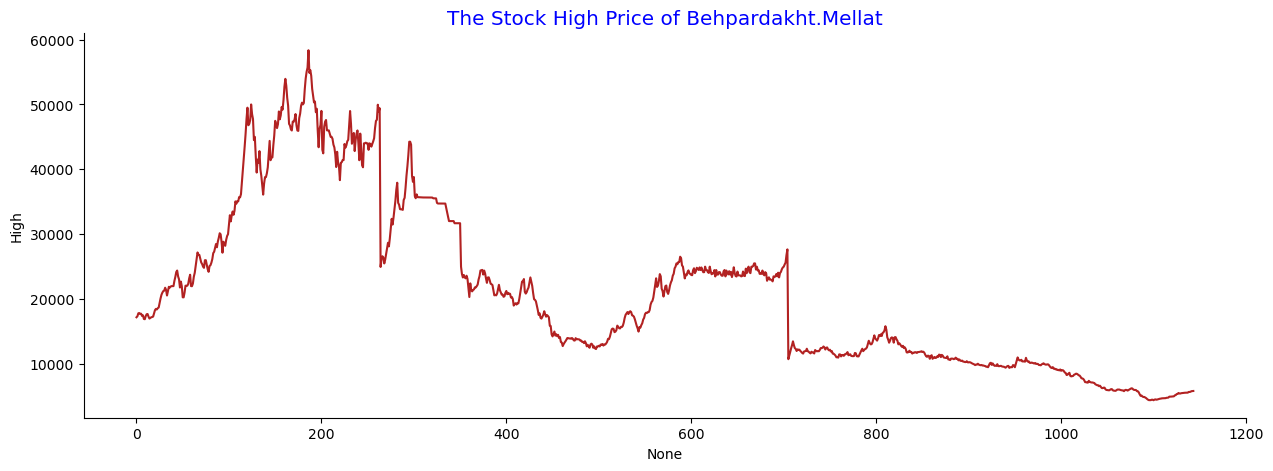

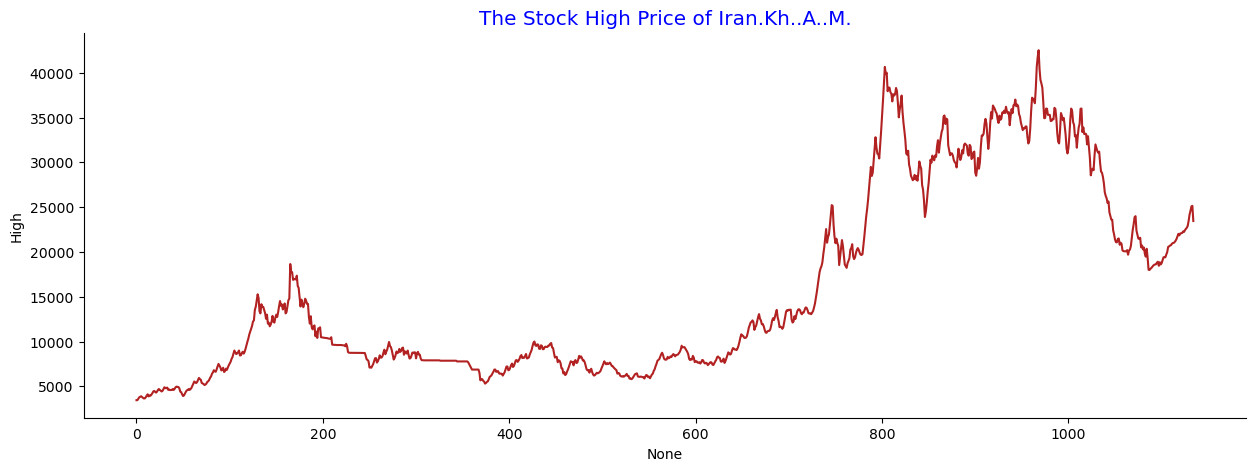

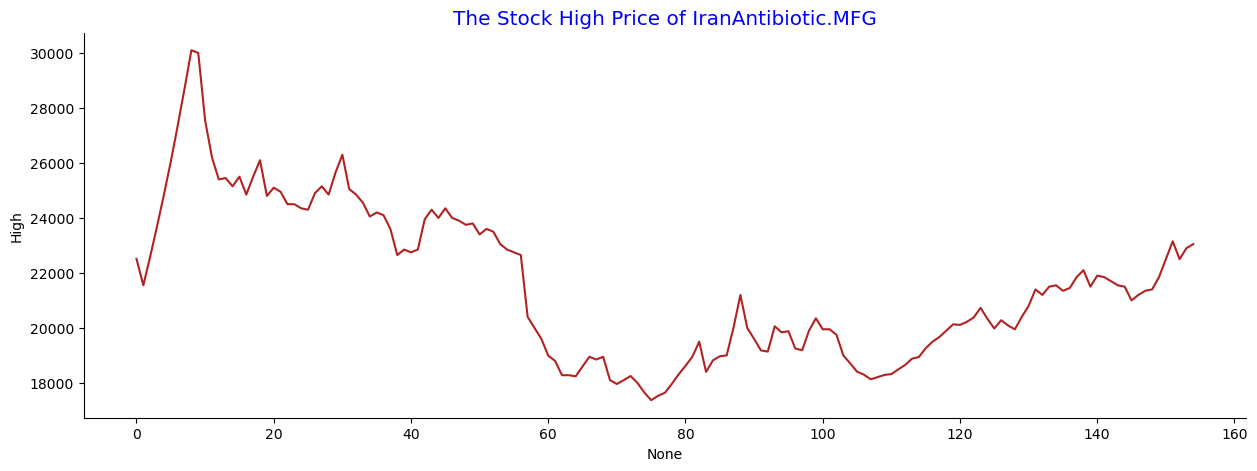

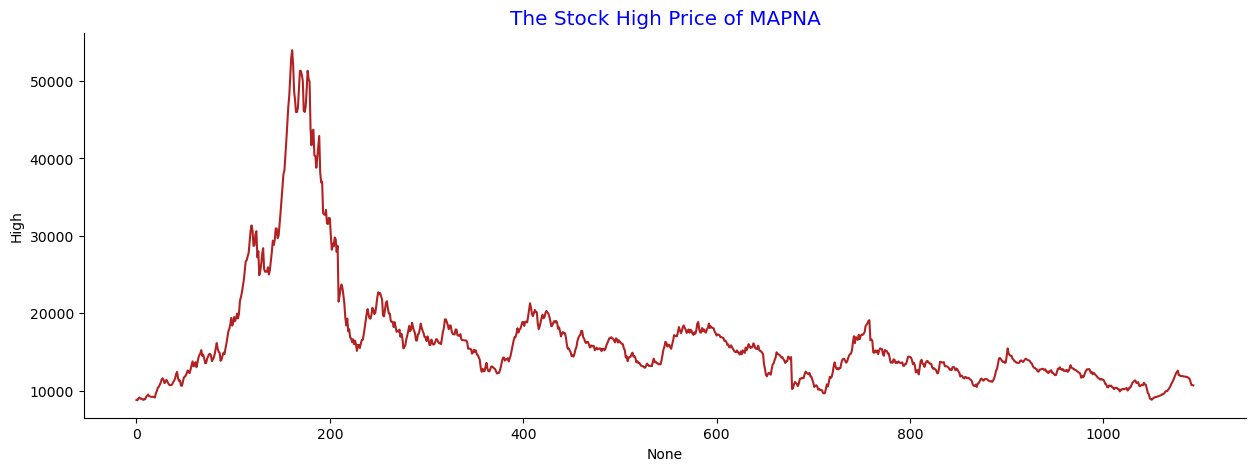

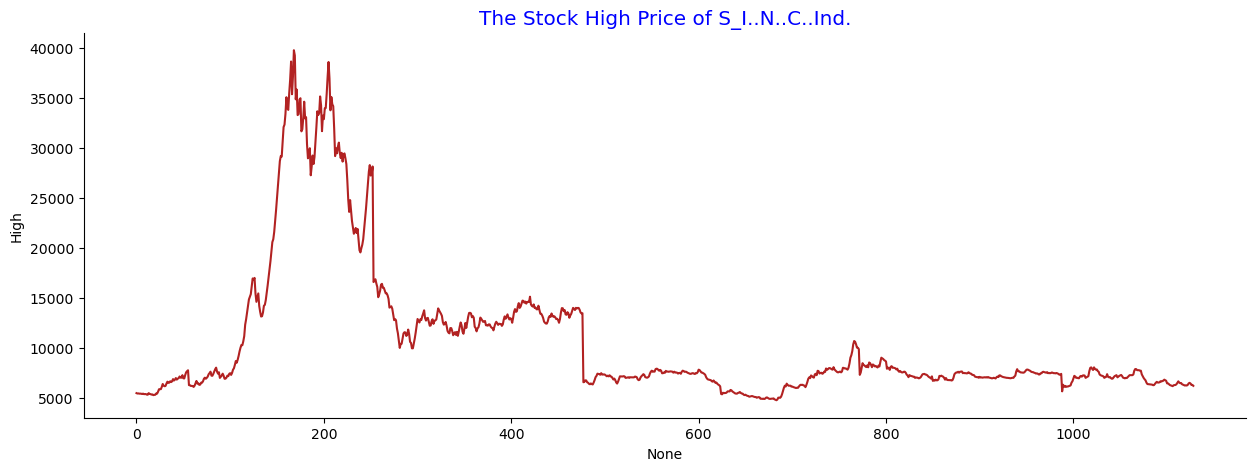

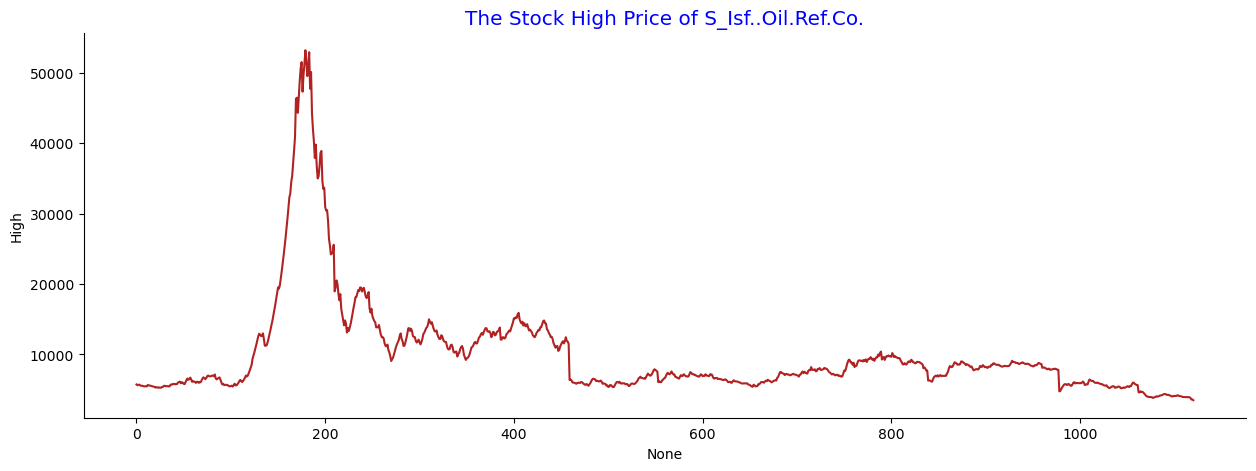

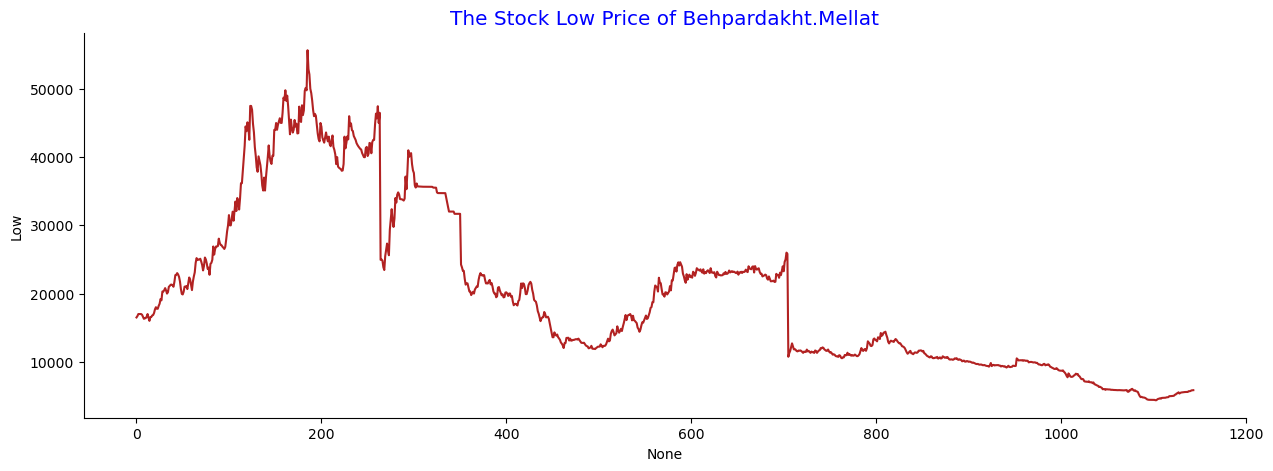

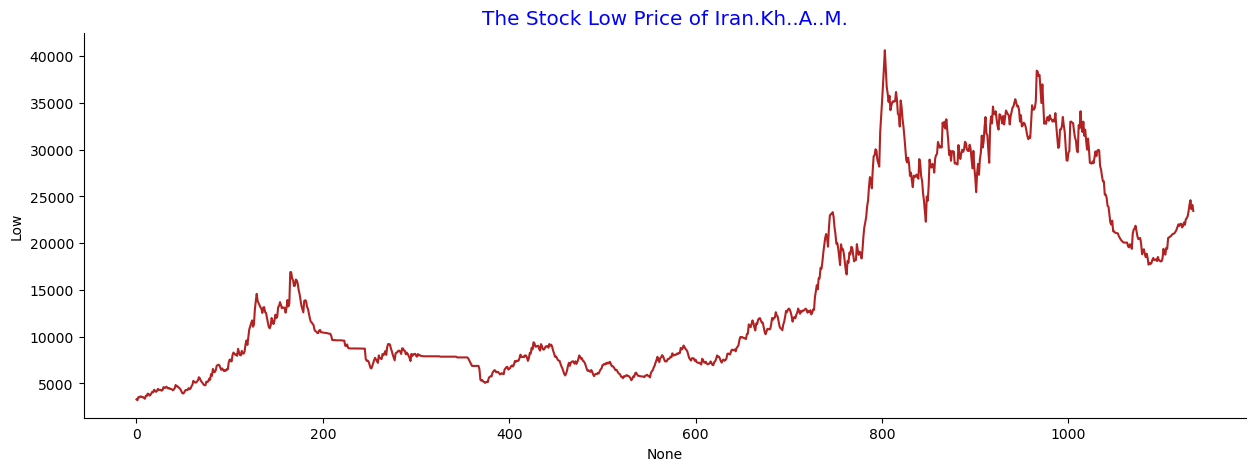

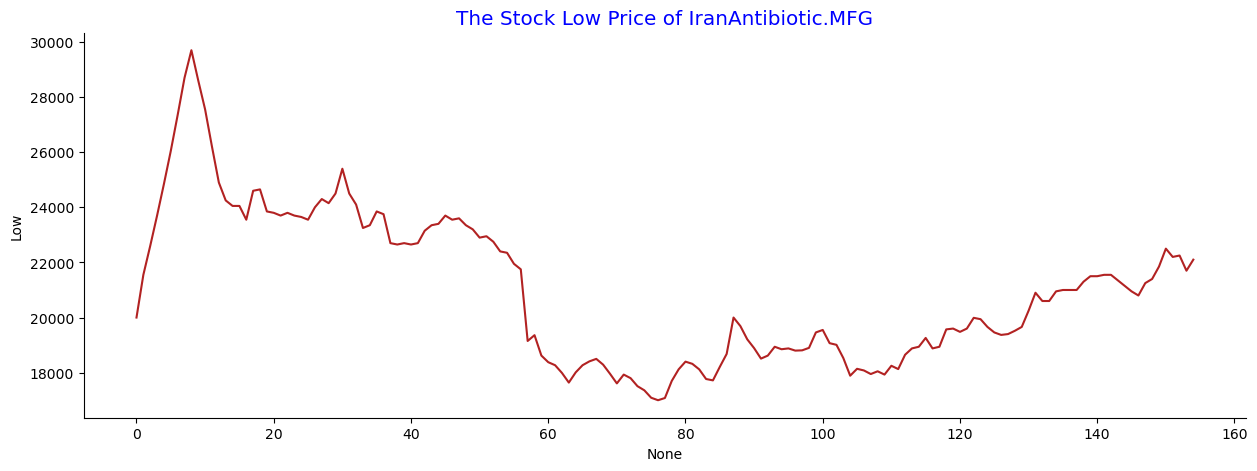

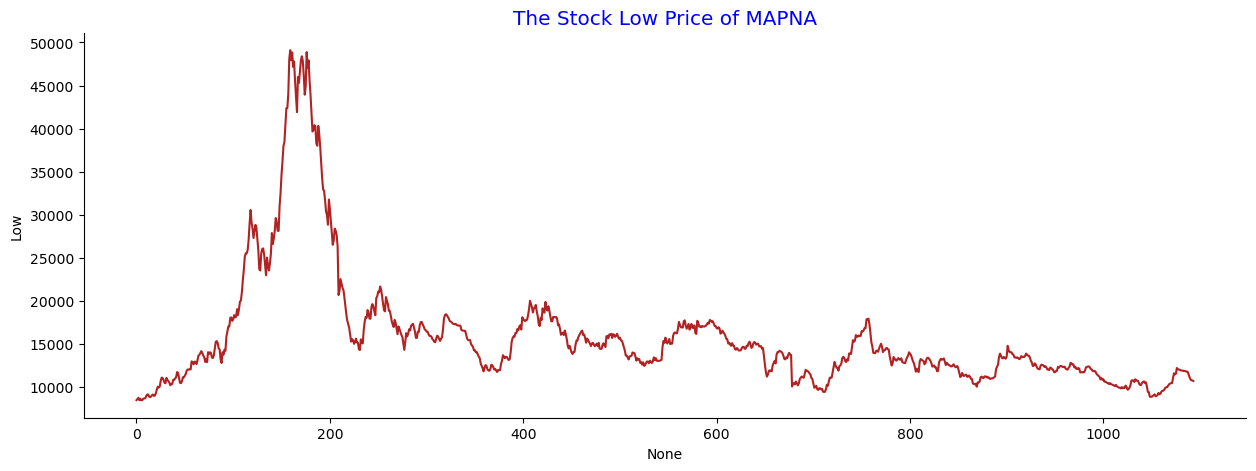

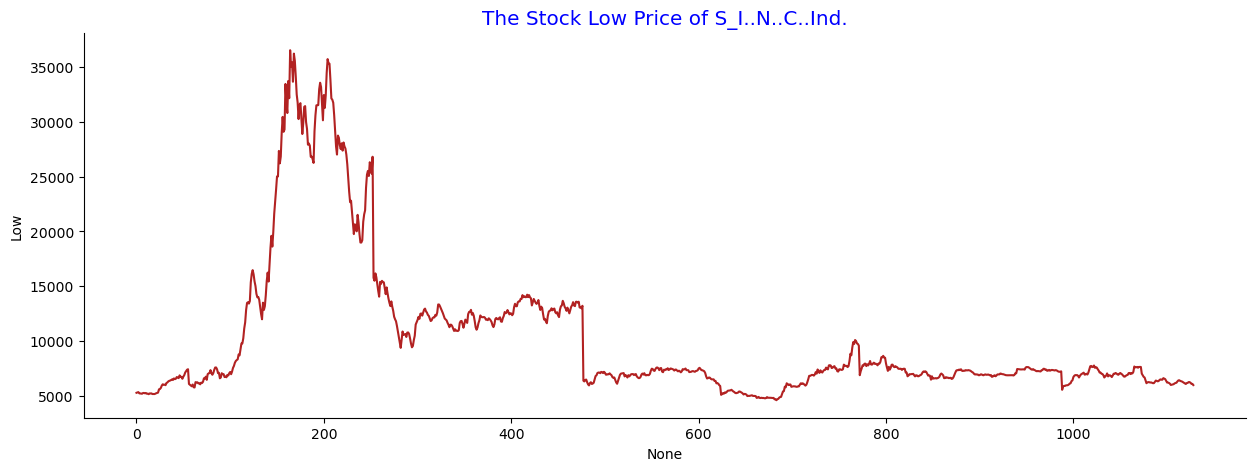

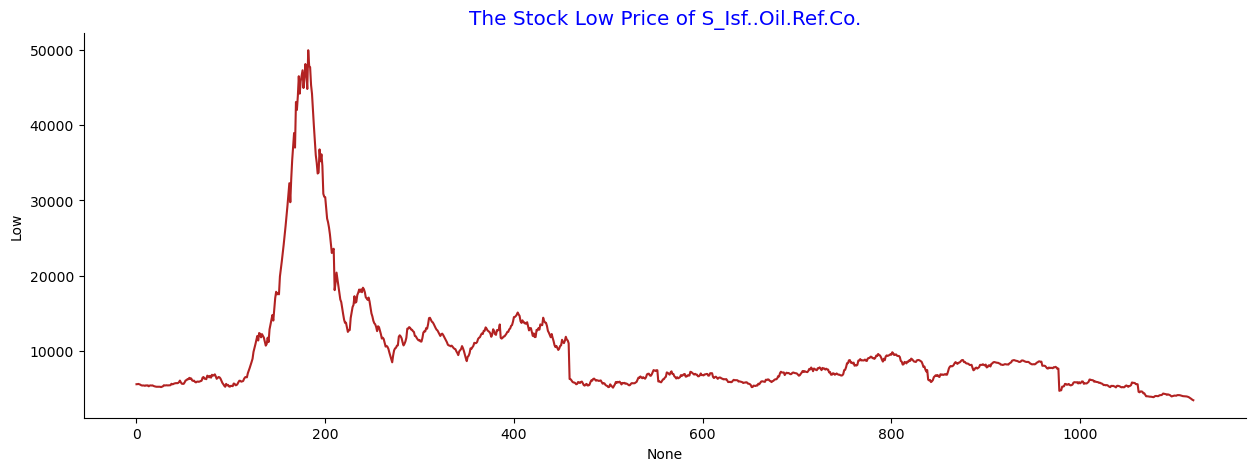

In [11]:
stock_holder.data_plot_single_stock(SAMPLE_STOCK_NAME, col=SAMPLE_COLUMN_NAME,
                                    is_number_index=True)  # change it to false in order to get date index

In [12]:
stock_holder.mpf_last_days_view(SAMPLE_STOCK_NAME, days=100)

## Moving Average Simulation

In [13]:
simulator = BackTestSimulator(stock_holder.get_samples(), stock_holder.get_stock_names(), MOVING_AVERAGE_LIST, save_data=True)
simulator.simulate(is_log_disabled=True)

#### General View

<IPython.core.display.Javascript object>

{'Behpardakht.Mellat': {'period': '(10, 30)',
  'profit-loss': 2692.3125,
  'profit-loss-percentage': 0.26923125},
 'Iran.Kh..A..M.': {'period': '(20, 50)',
  'profit-loss': 8925.375,
  'profit-loss-percentage': 0.8925375},
 'IranAntibiotic.MFG': {'period': '(10, 40)',
  'profit-loss': -3296.0,
  'profit-loss-percentage': -0.3296},
 'MAPNA': {'period': '(20, 50)',
  'profit-loss': -15222.25,
  'profit-loss-percentage': -1.522225},
 'S_I..N..C..Ind.': {'period': '(10, 20)',
  'profit-loss': 25.23749999993015,
  'profit-loss-percentage': 0.002523749999993015},
 'S_Isf..Oil.Ref.Co.': {'period': '(20, 40)',
  'profit-loss': -23002.800000000163,
  'profit-loss-percentage': -2.3002800000000163}}

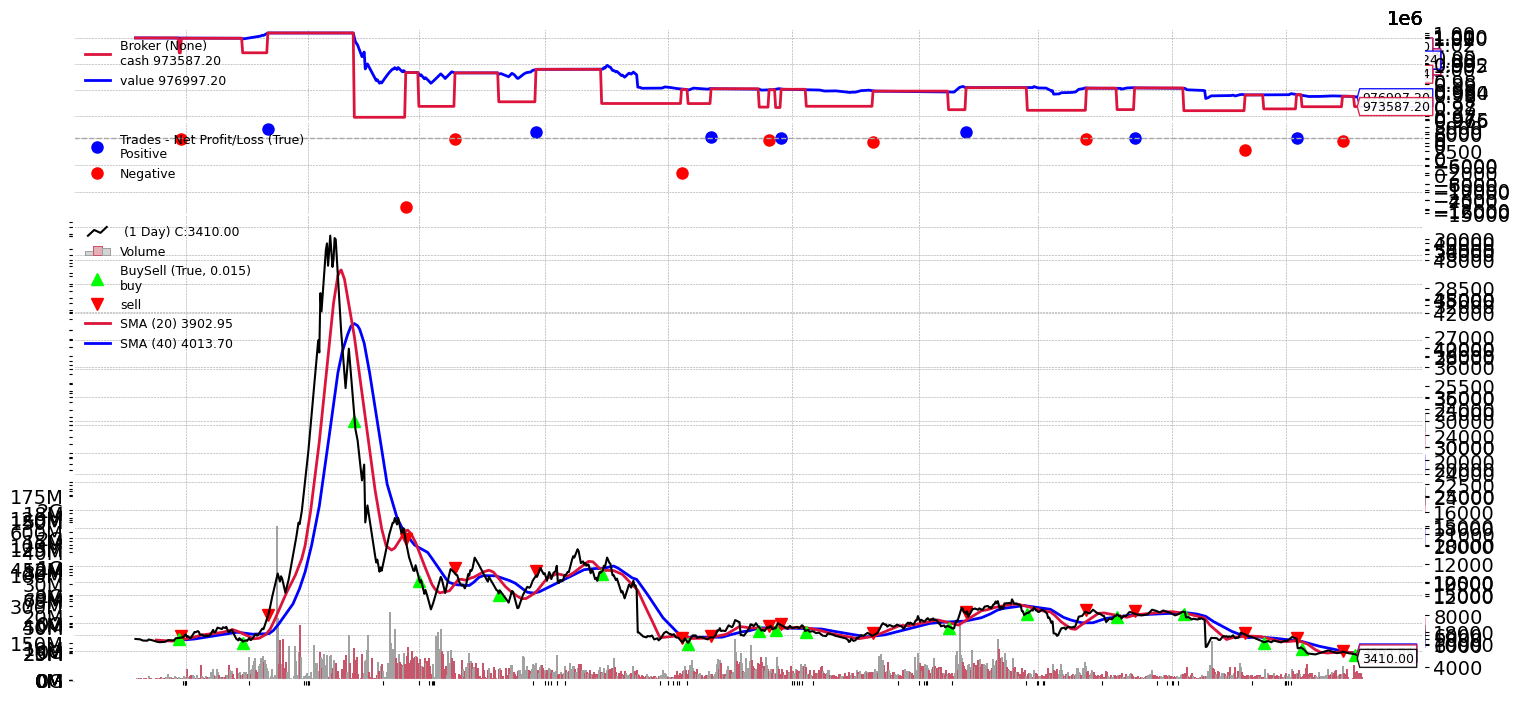

In [26]:
# simulator.best_stock_ma_comparison(SAMPLE_STOCK_NAME, figsize=(15, 7))

#### SMA result

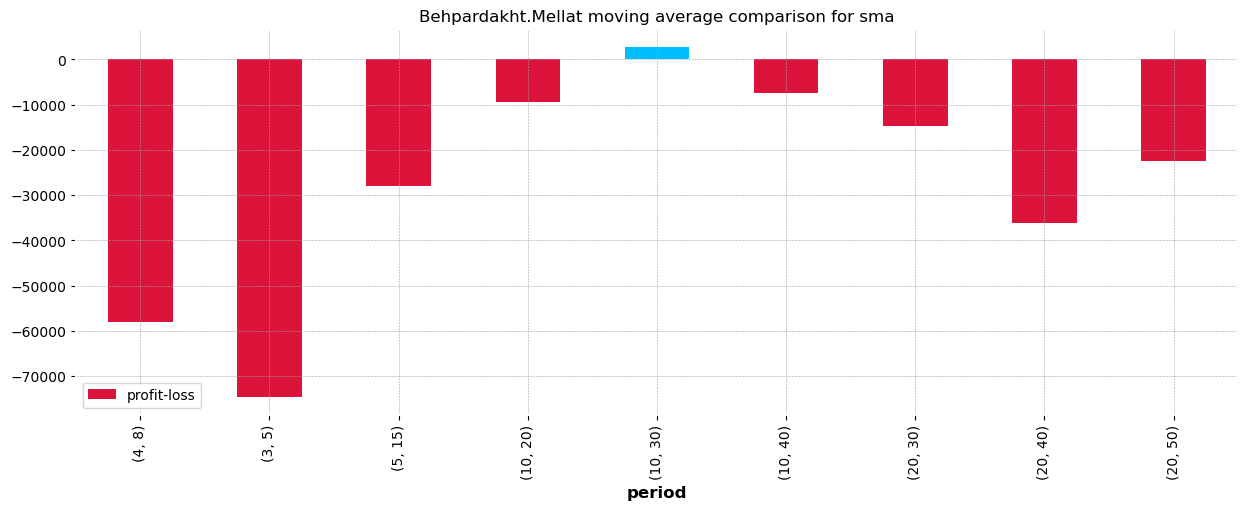

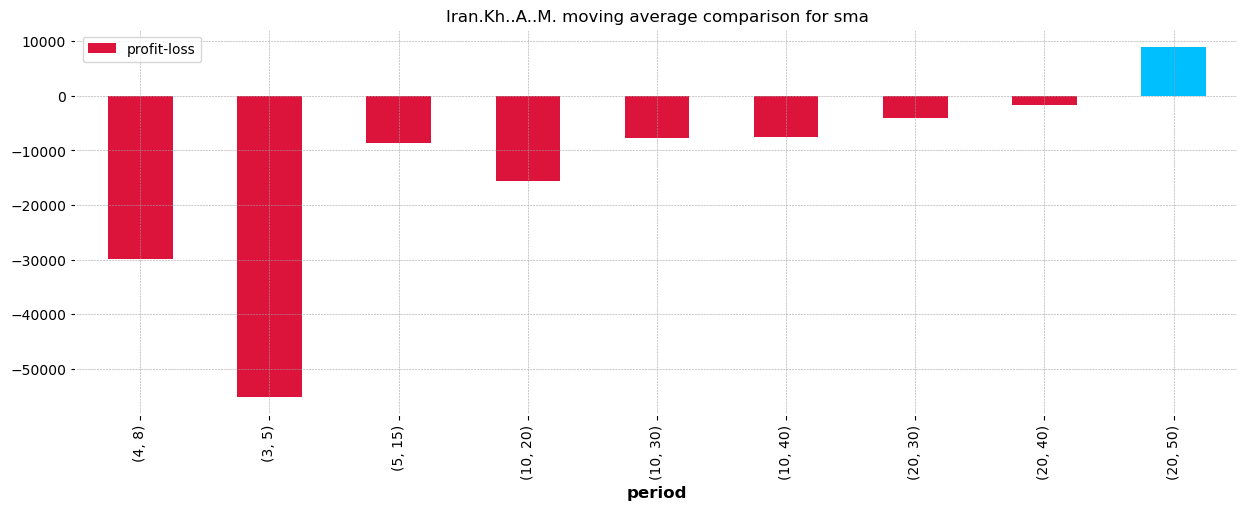

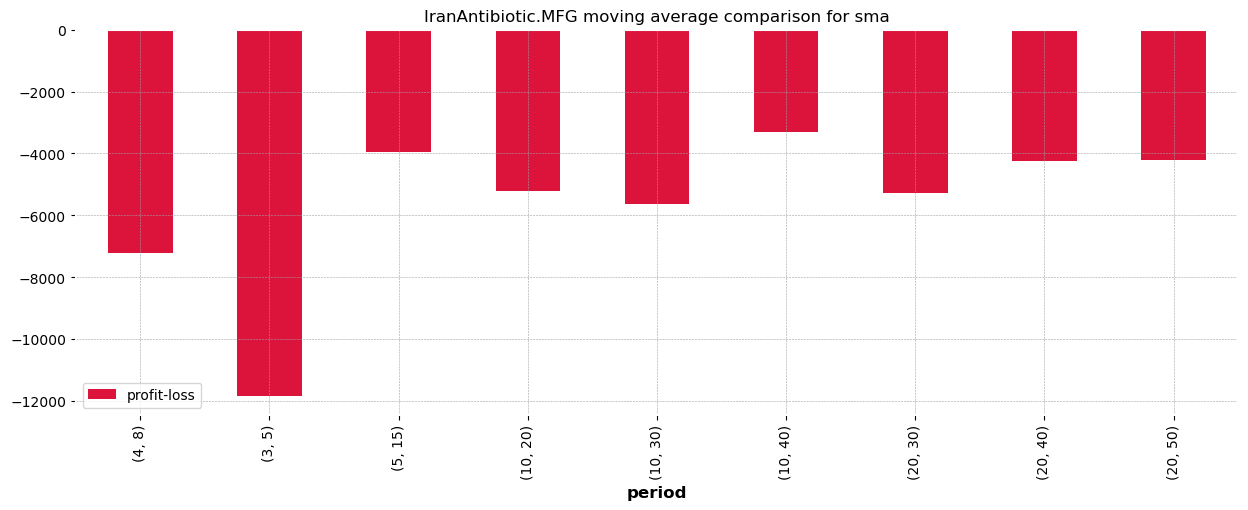

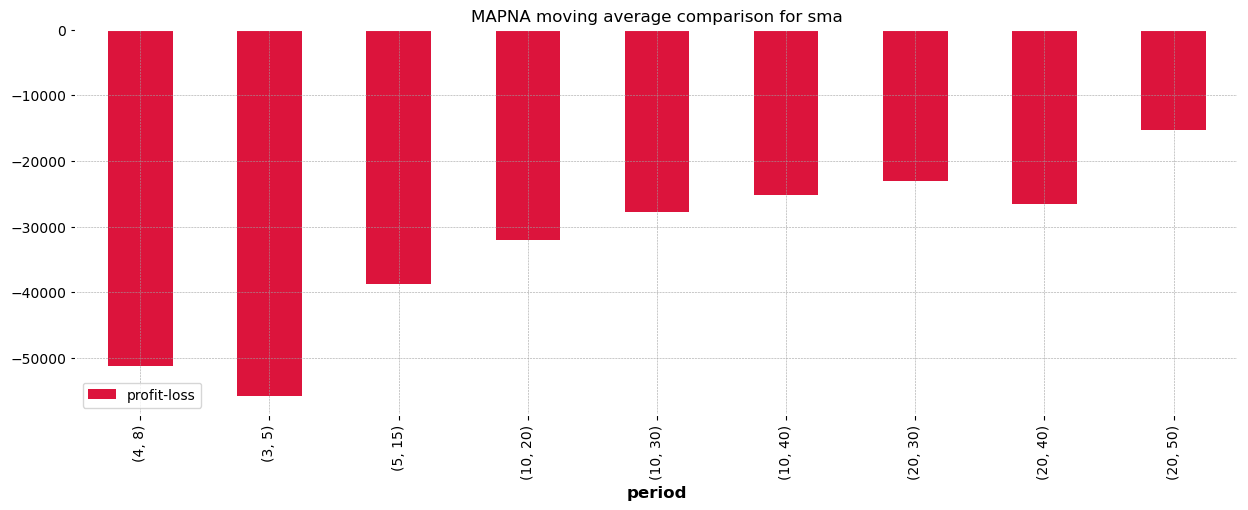

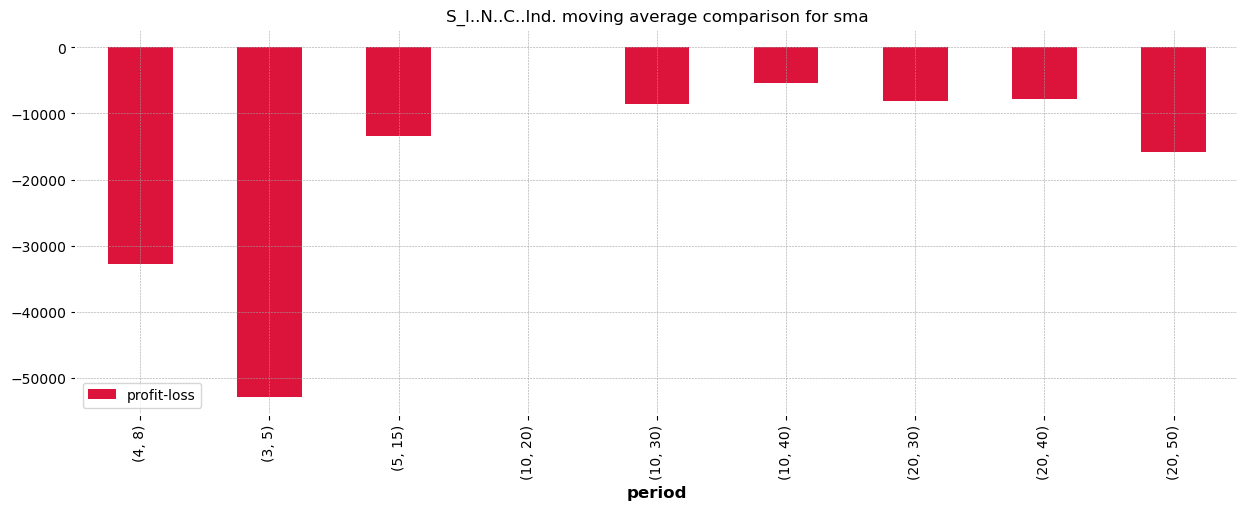

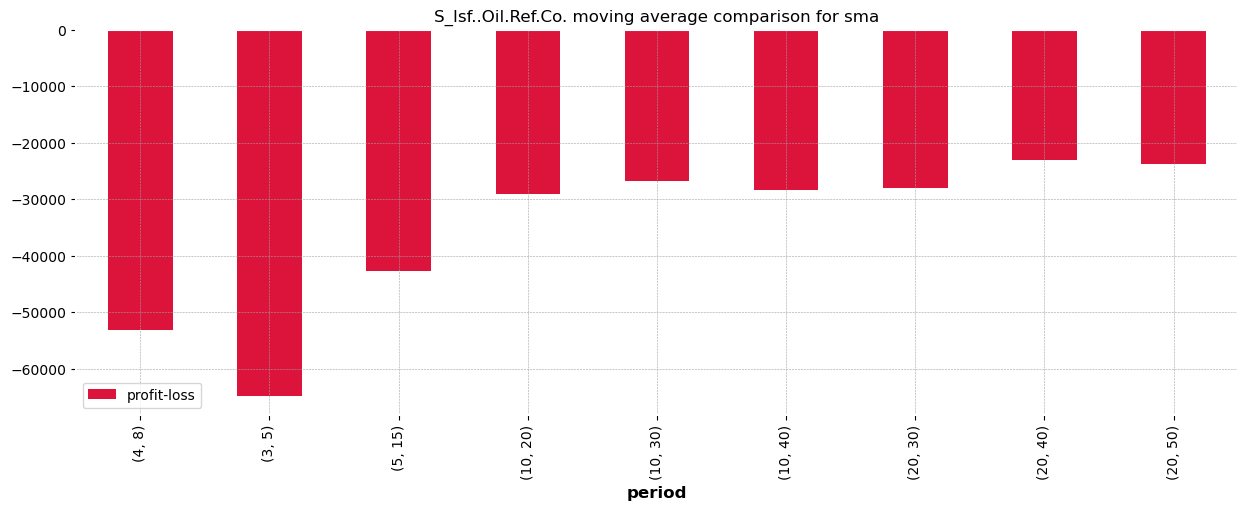

In [15]:
simulator.stock_ma_compare_plot(SAMPLE_STOCK_NAME, sma=True)

#### EMA result

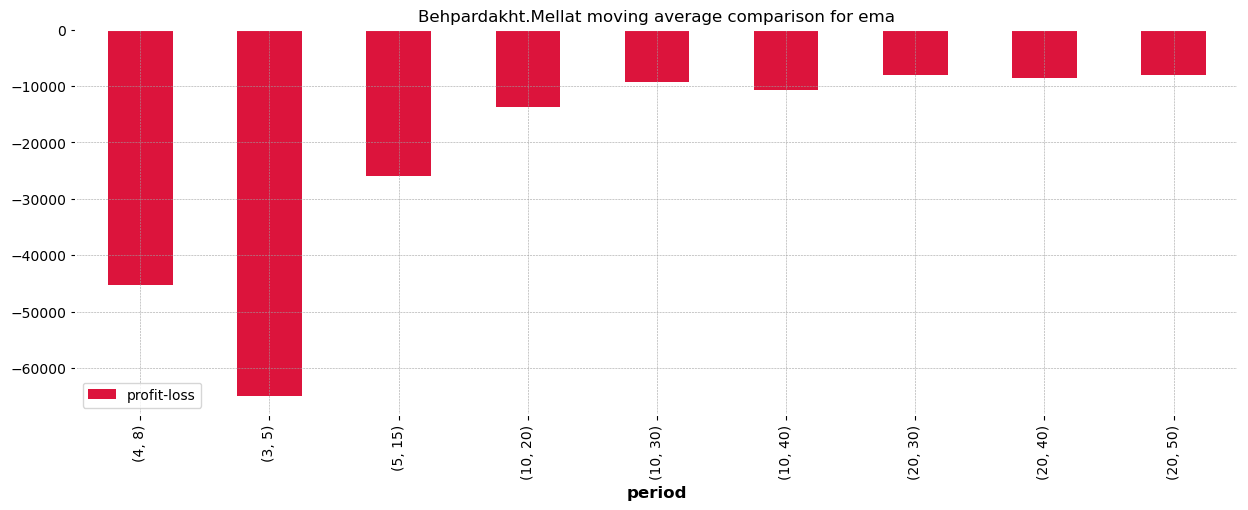

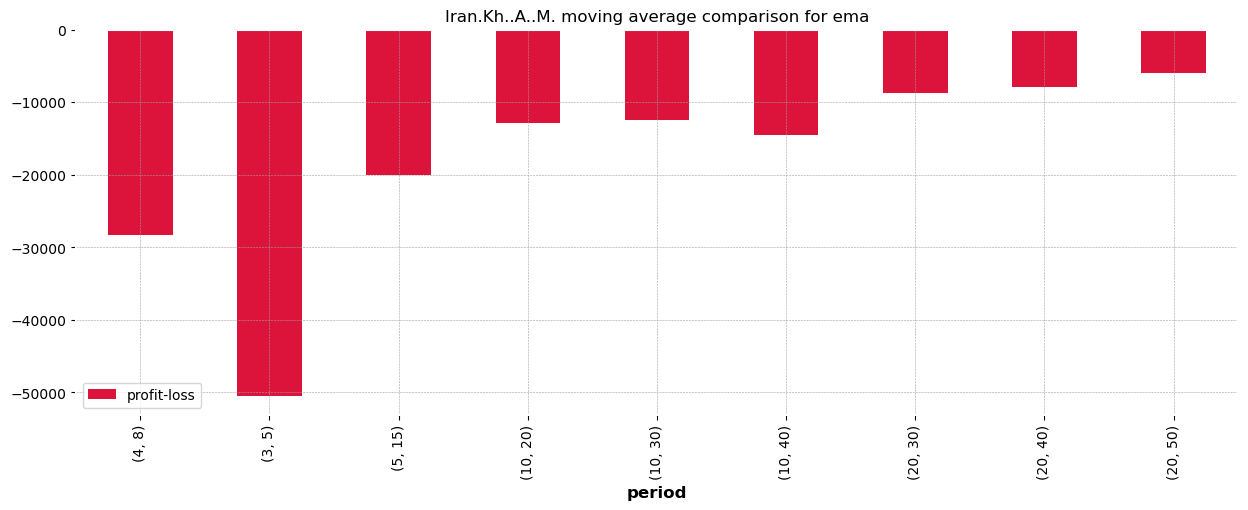

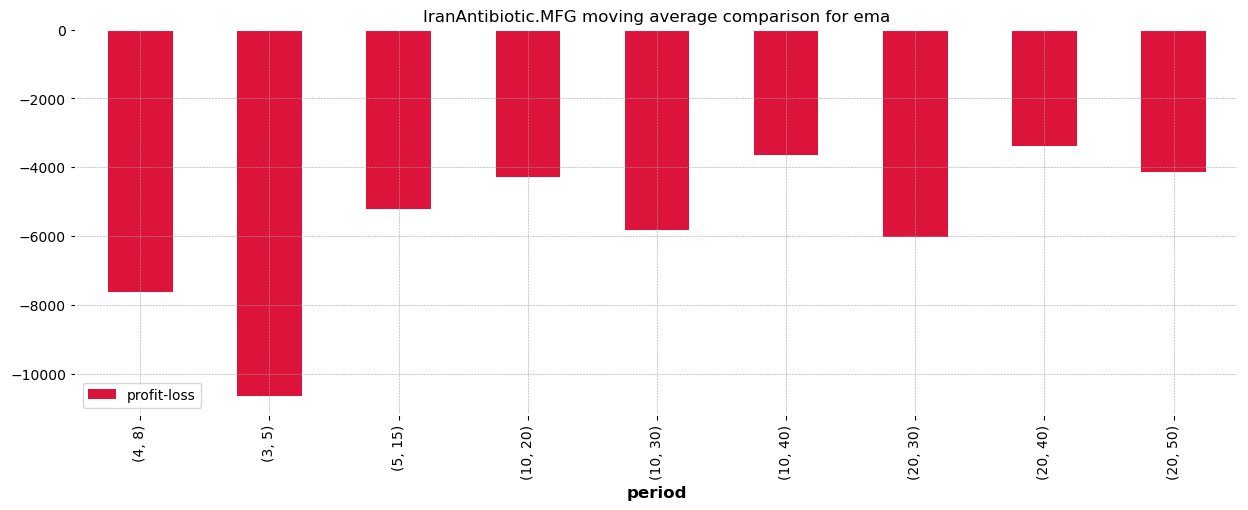

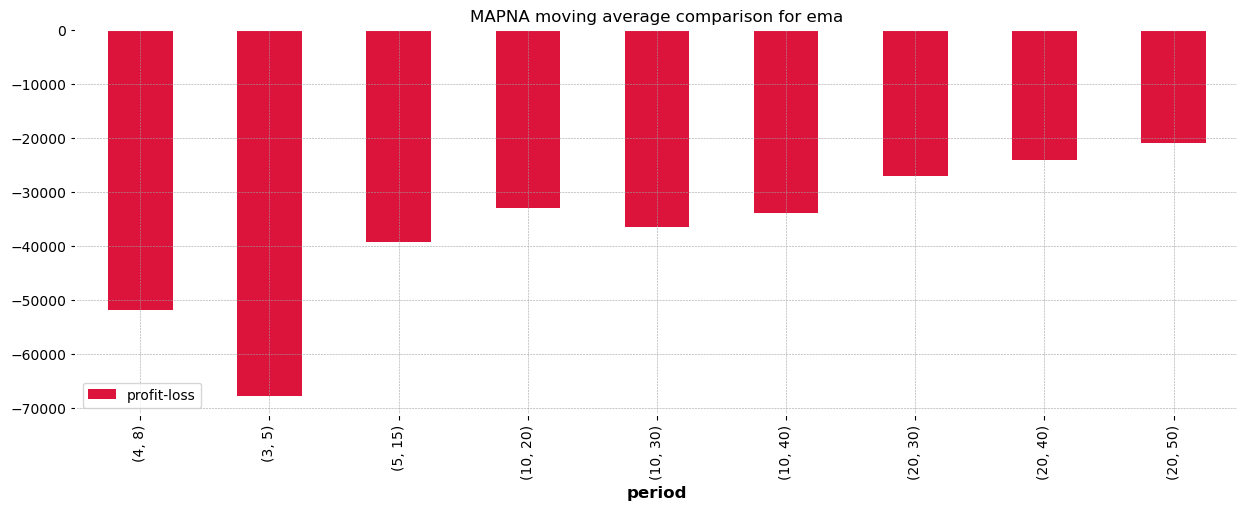

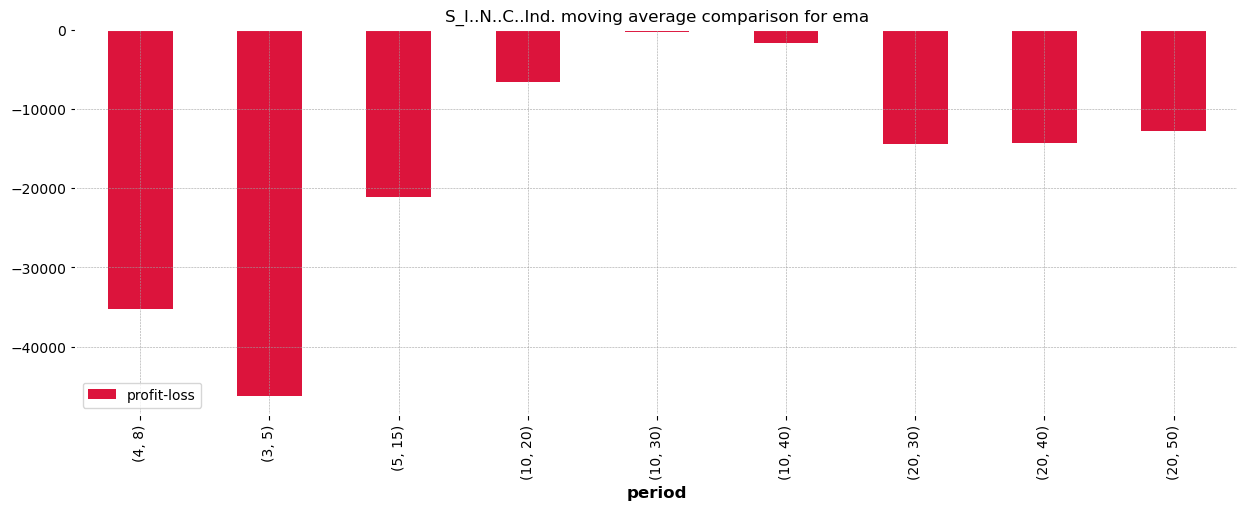

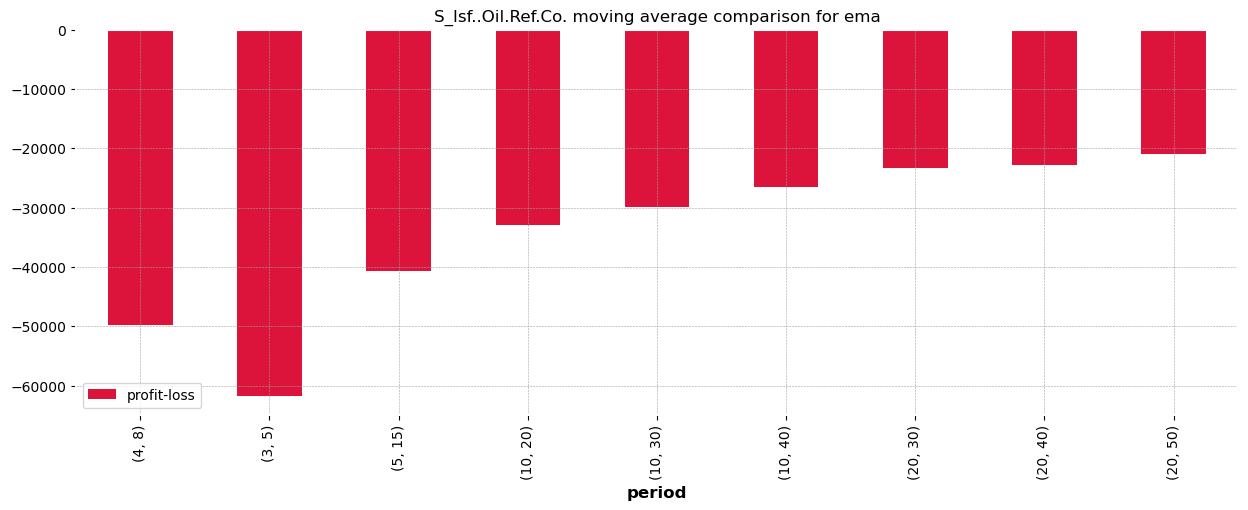

In [16]:
simulator.stock_ma_compare_plot(SAMPLE_STOCK_NAME, sma=False)

#### Comparing EMA vs SMA

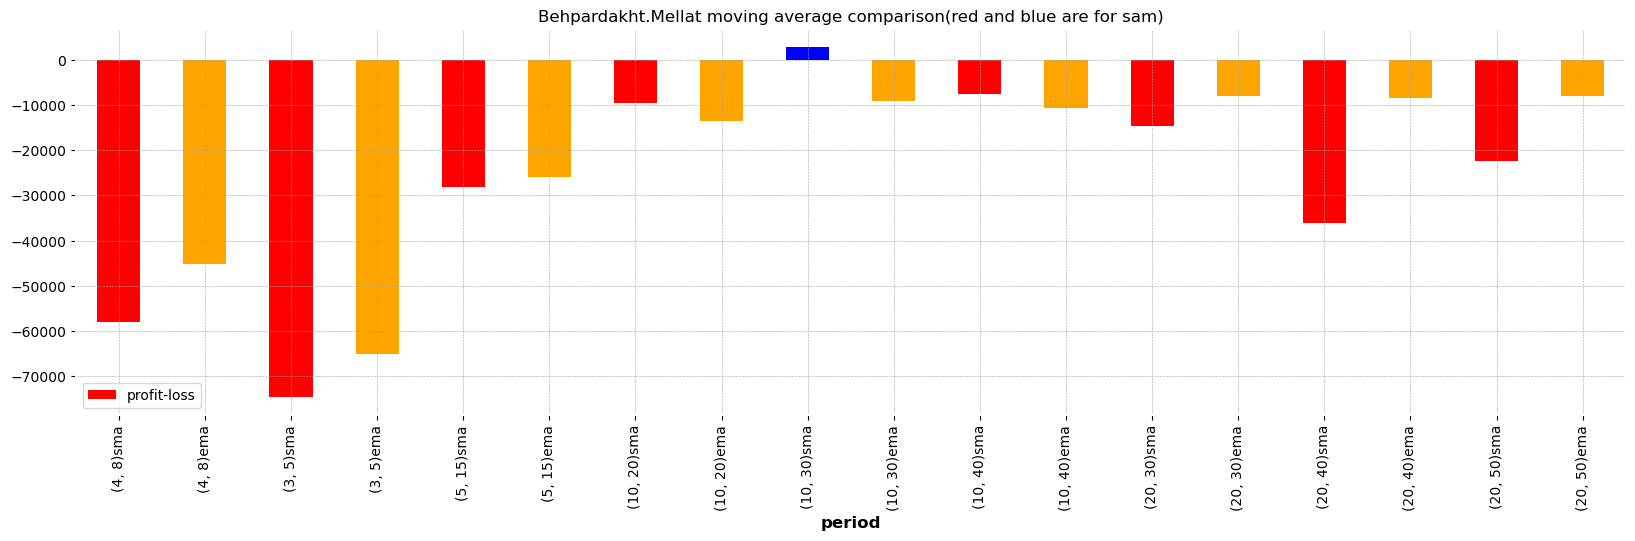

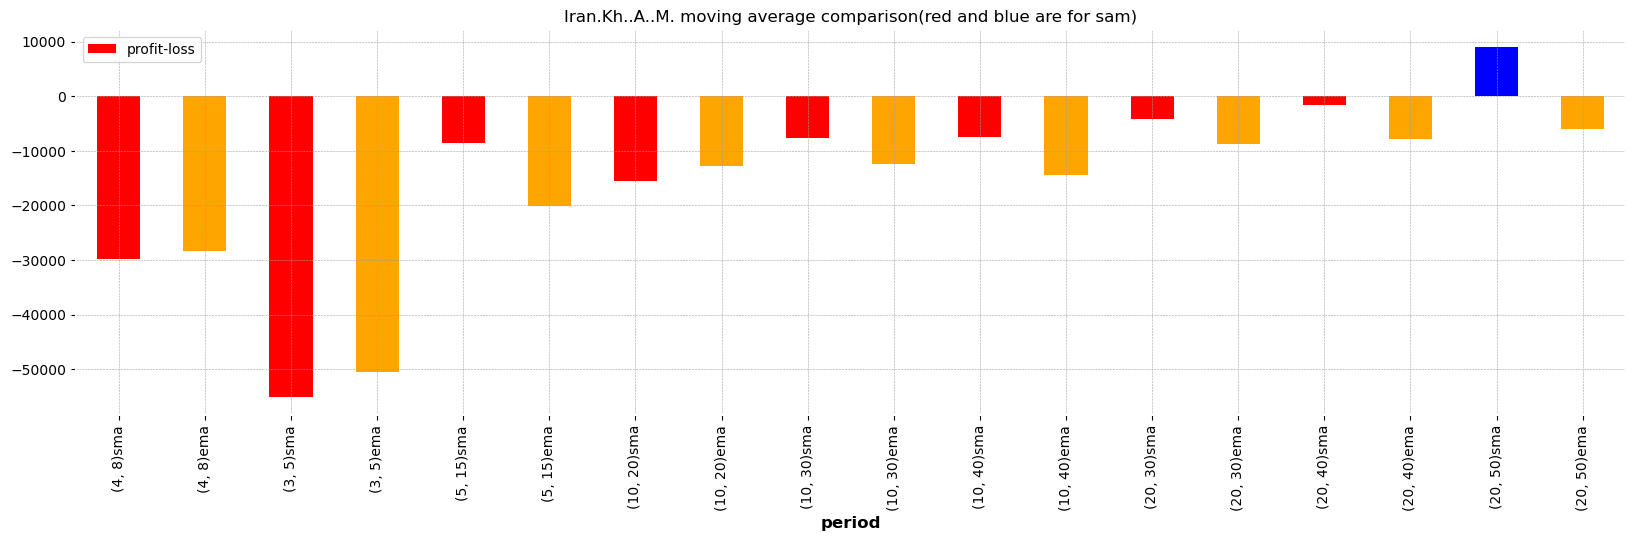

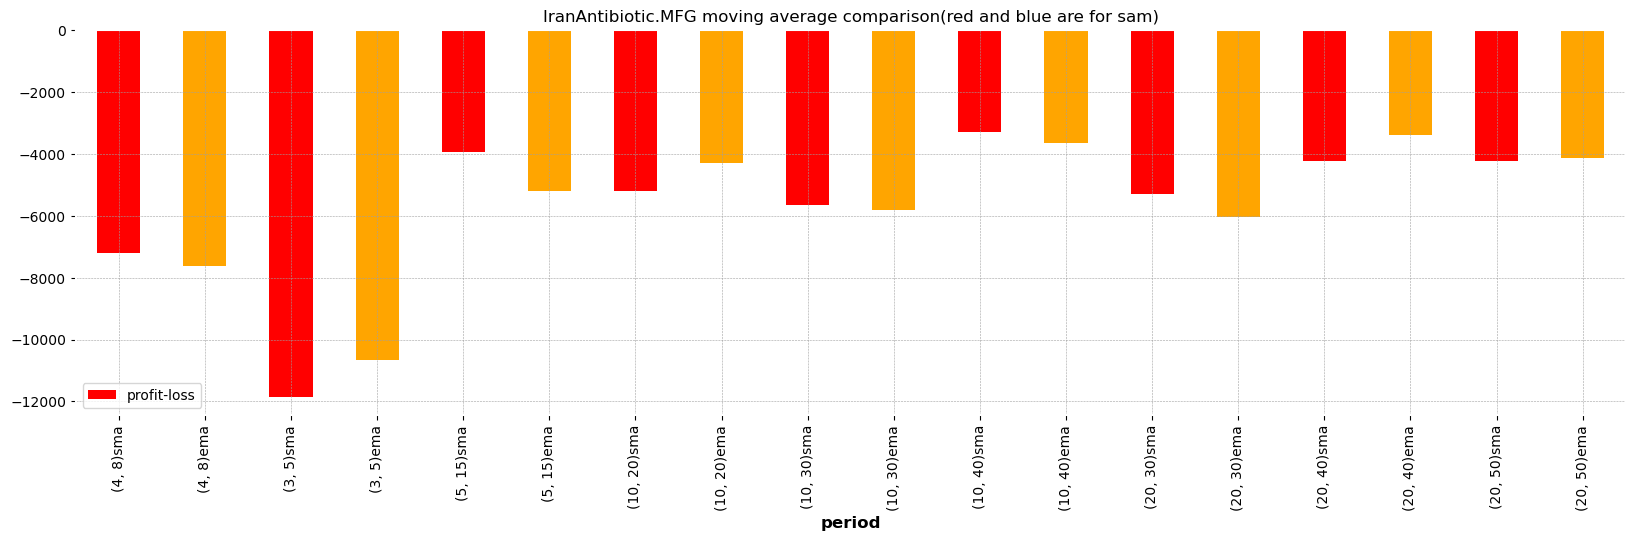

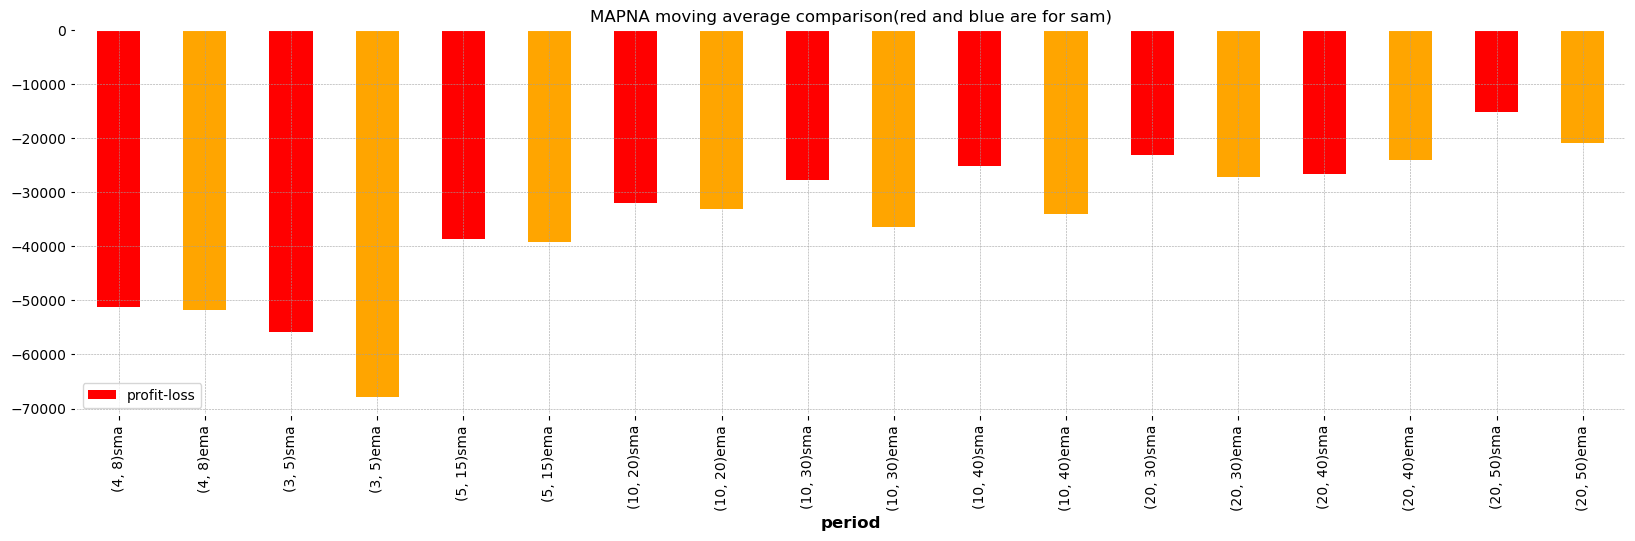

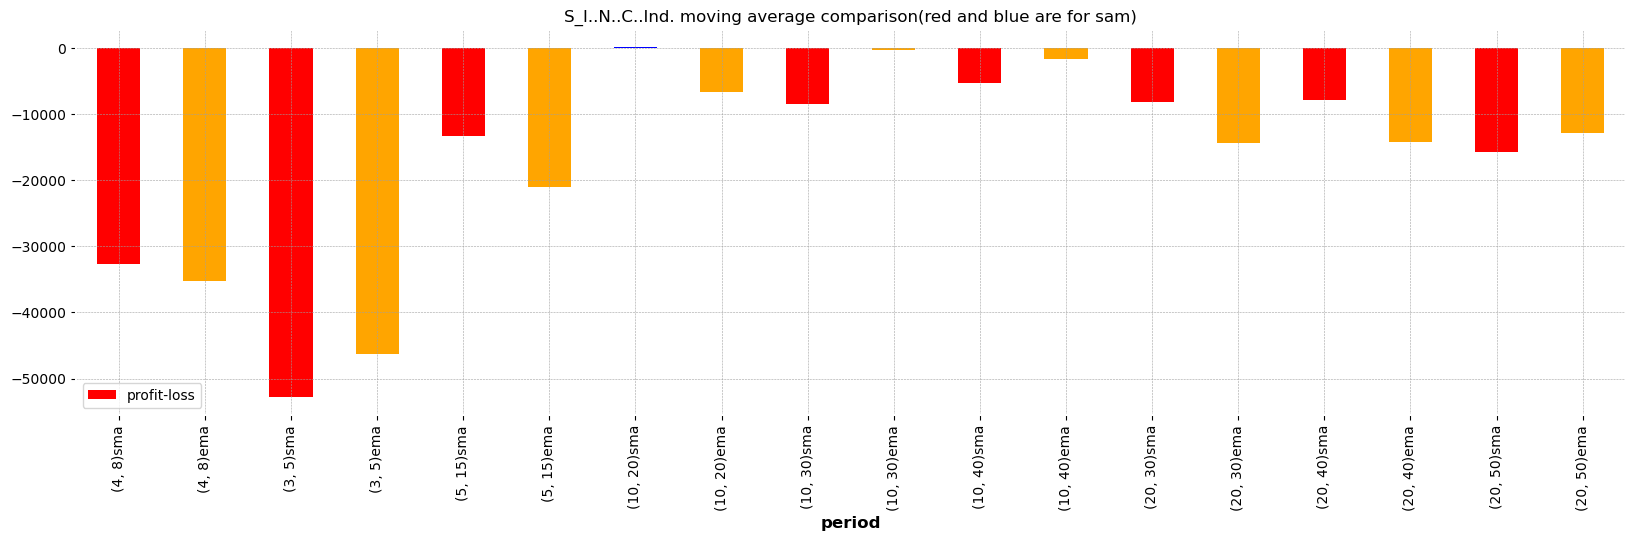

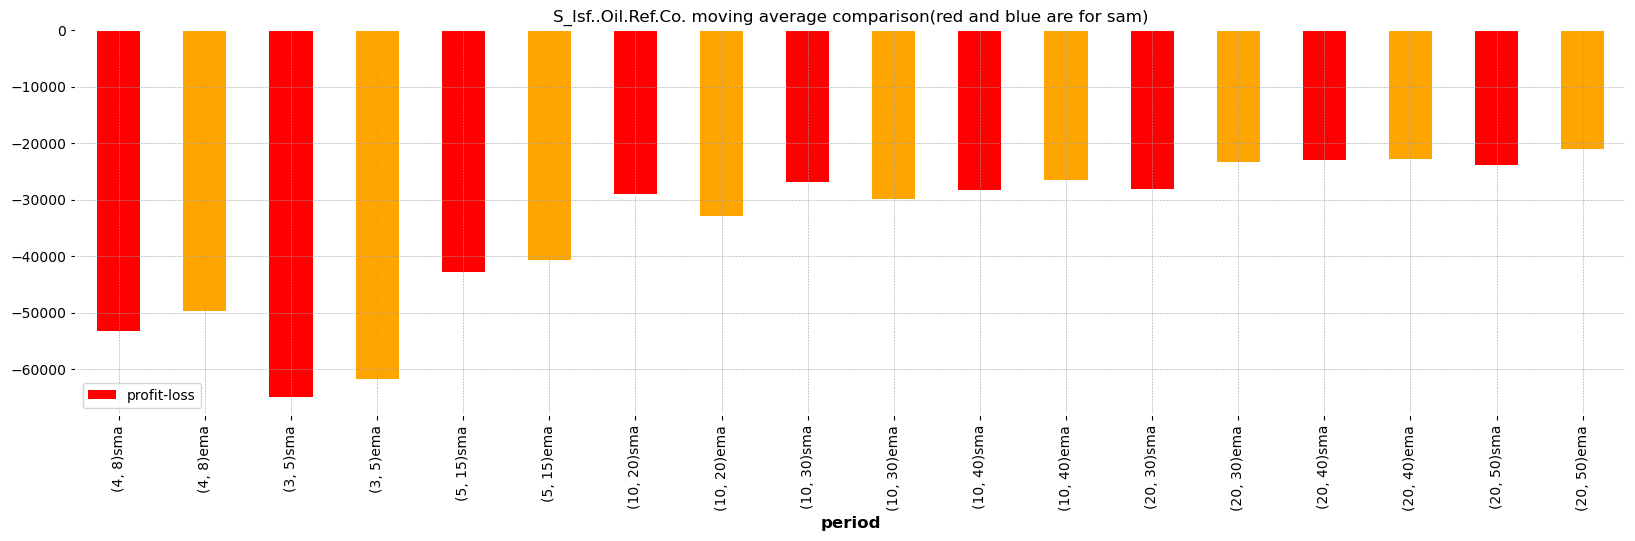

In [17]:
simulator.stock_ma_compare_plot(SAMPLE_STOCK_NAME, sma=None, figsize=(20, 5))

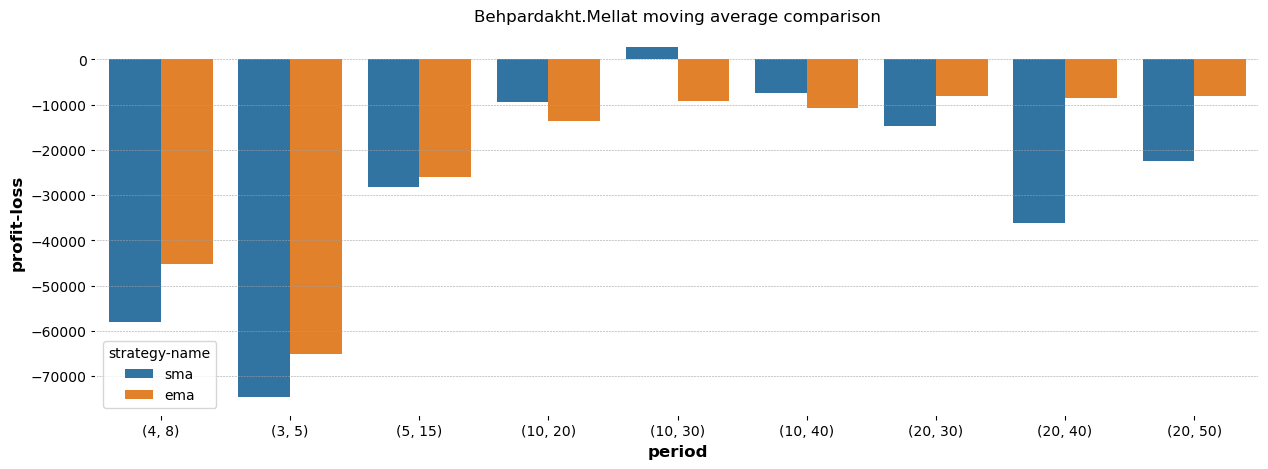

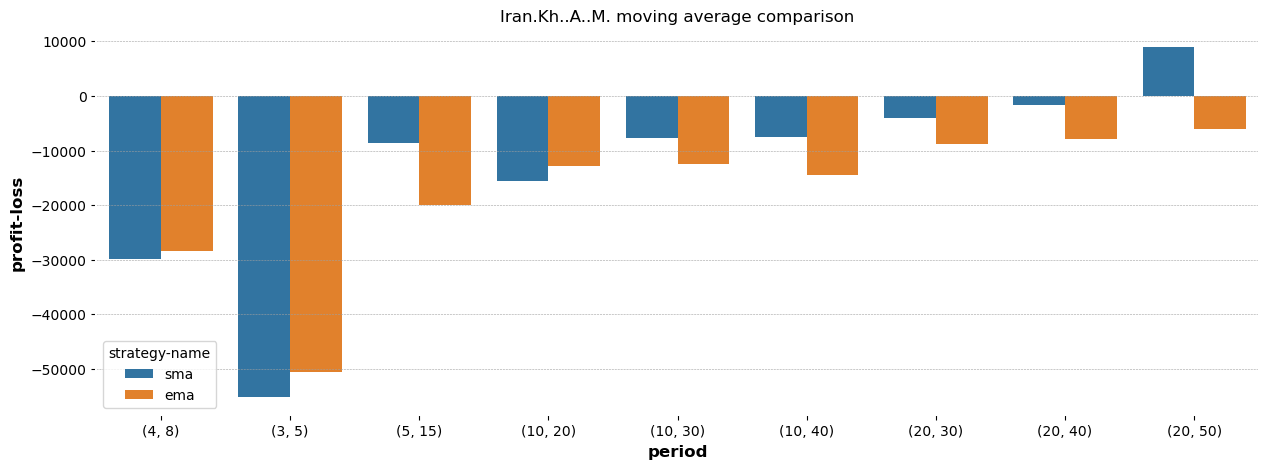

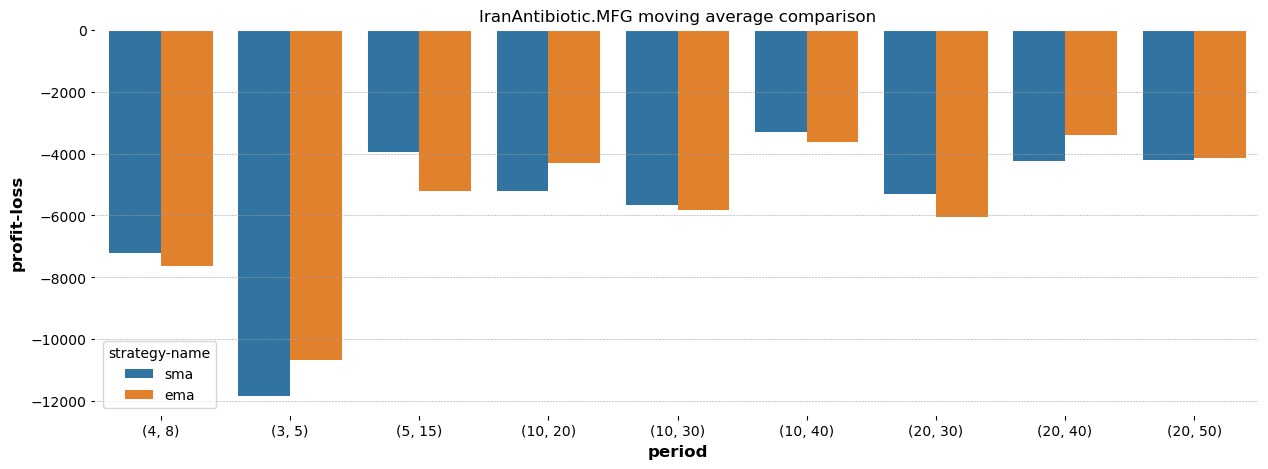

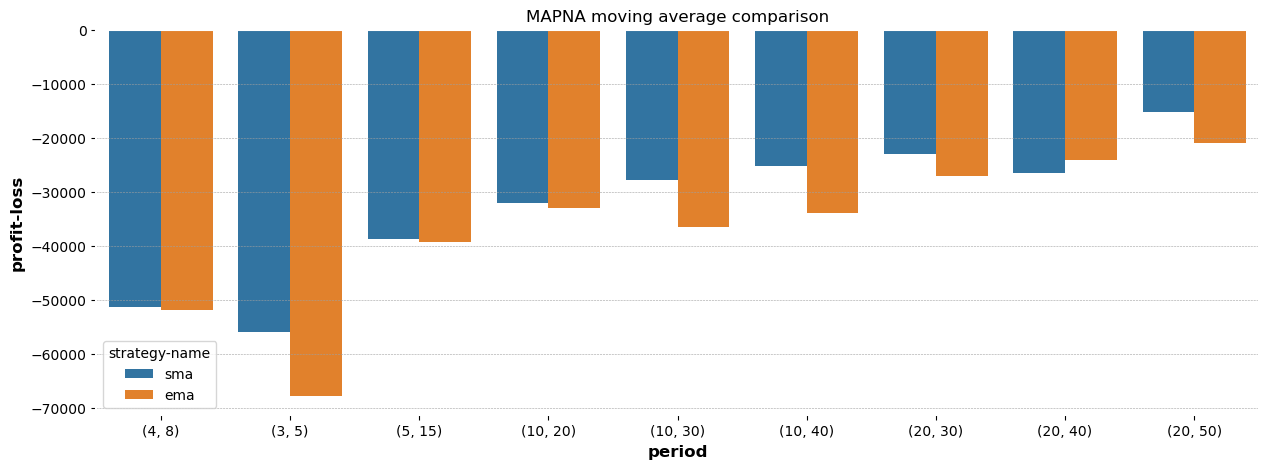

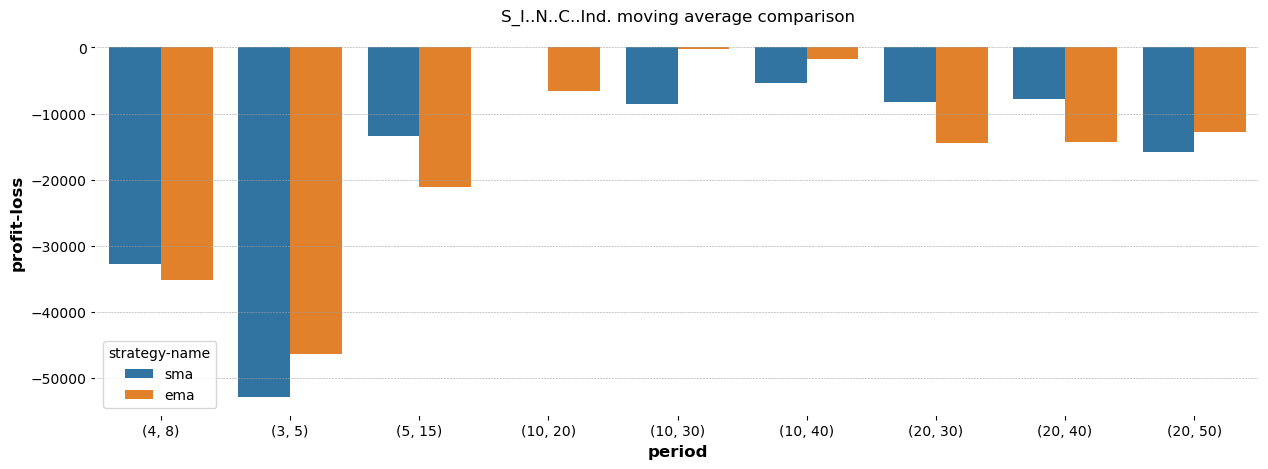

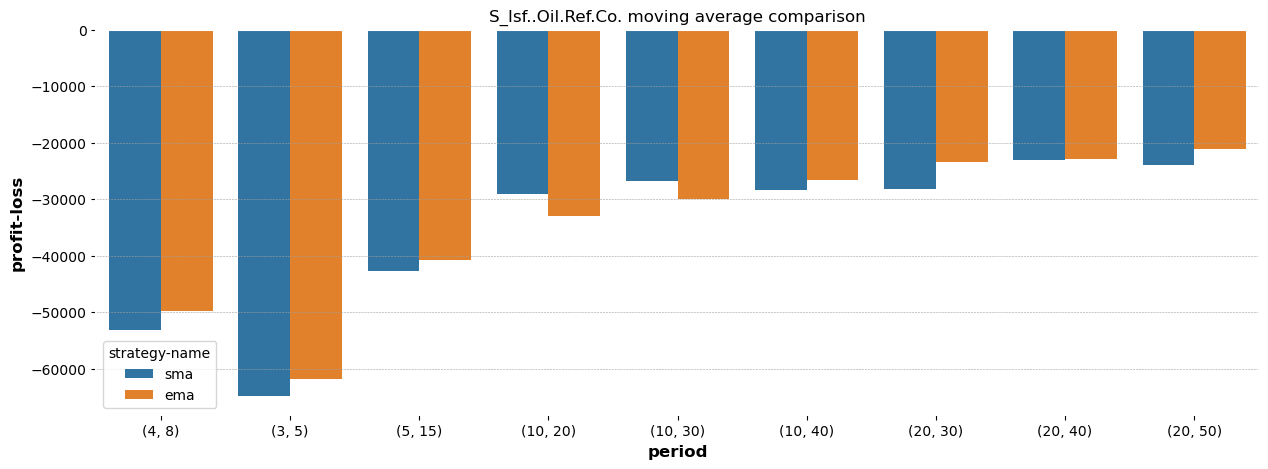

In [18]:
simulator.stock_compare_sma_and_ema(SAMPLE_STOCK_NAME)

### Linear Regression

In [19]:
lr_sim = LrSimulator(stock_holder.get_samples(), stock_holder.get_stock_names(), save_data=True)

#### plot regions

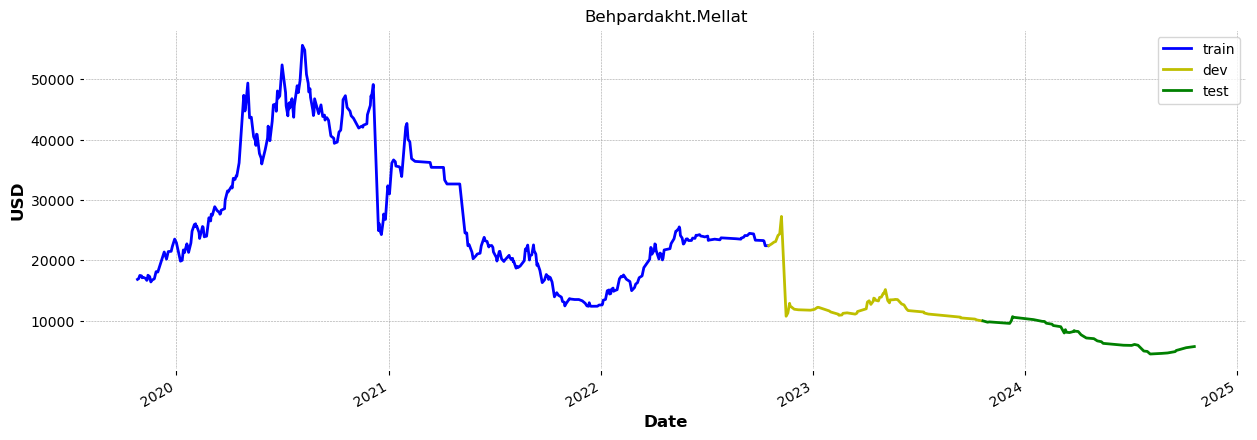

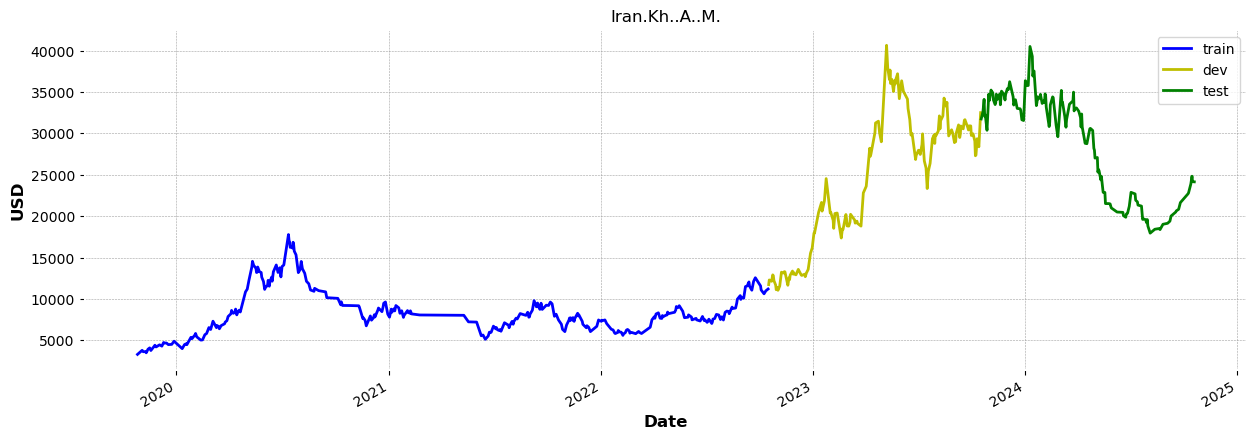

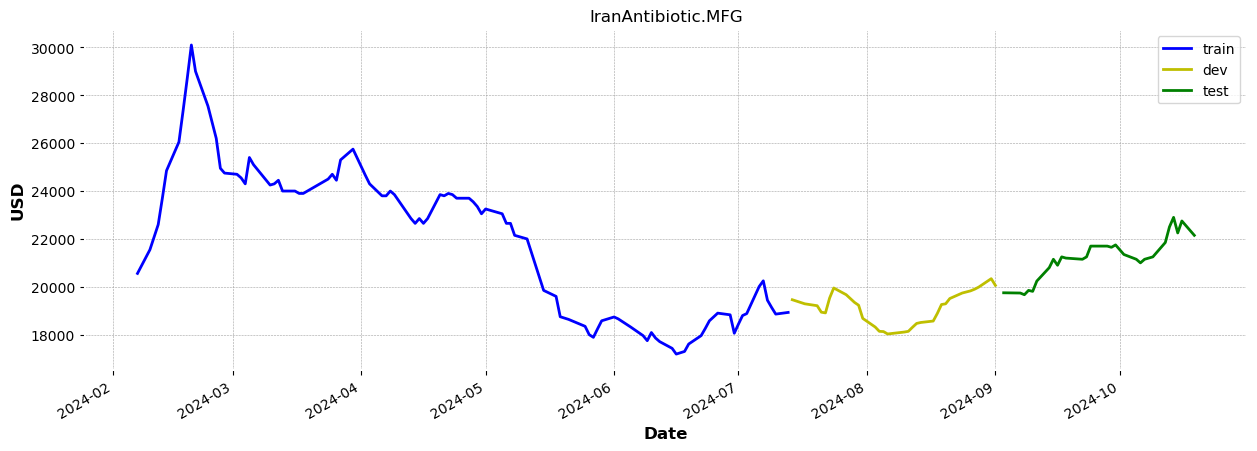

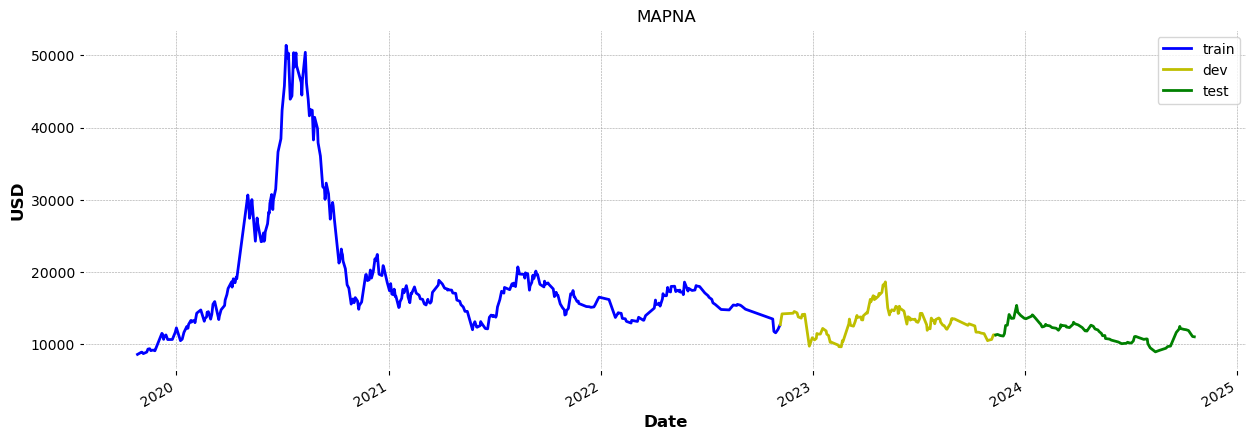

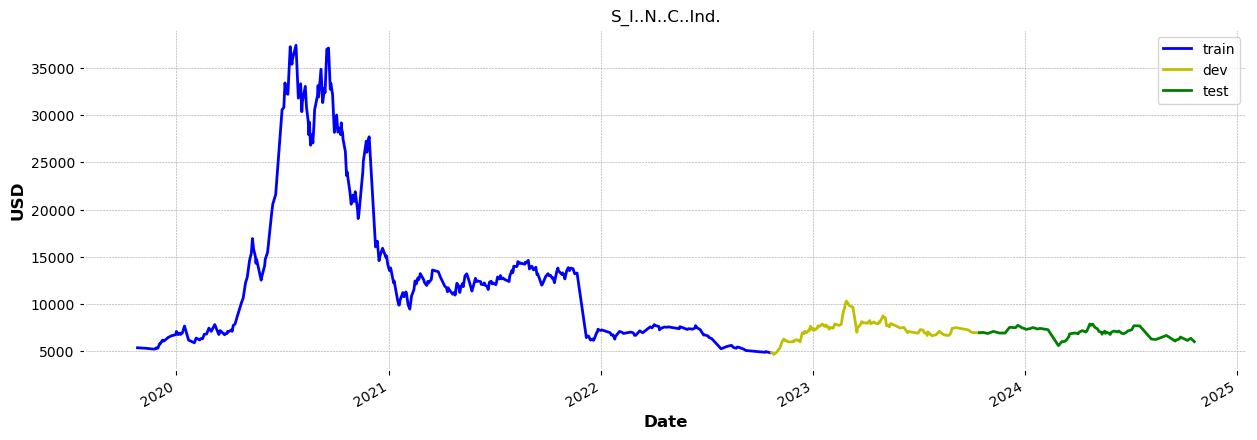

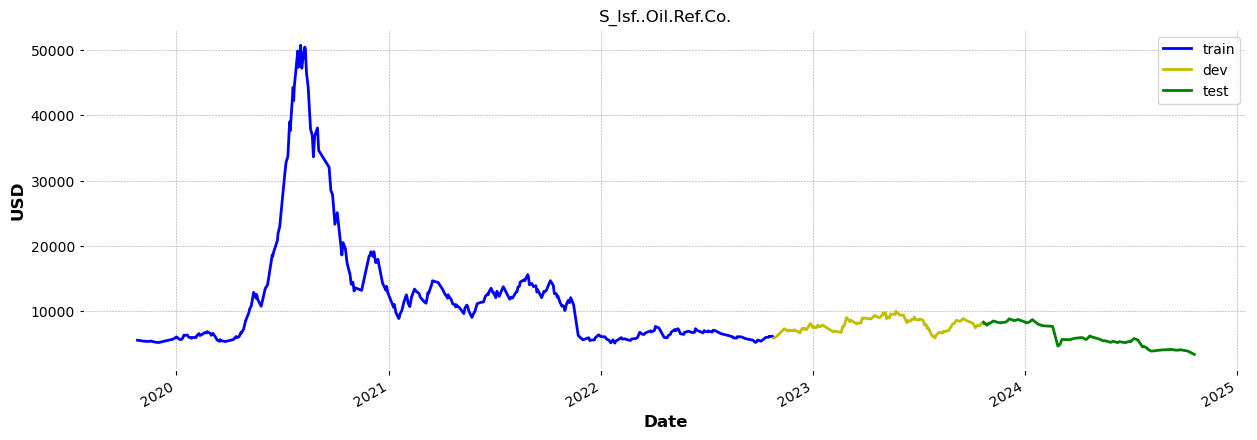

In [20]:
lr_sim.plot_regions(SAMPLE_STOCK_NAME)

#### apply regression

In [21]:
lr_sim.apply_regressions()

#### plotting parameters

##### rms

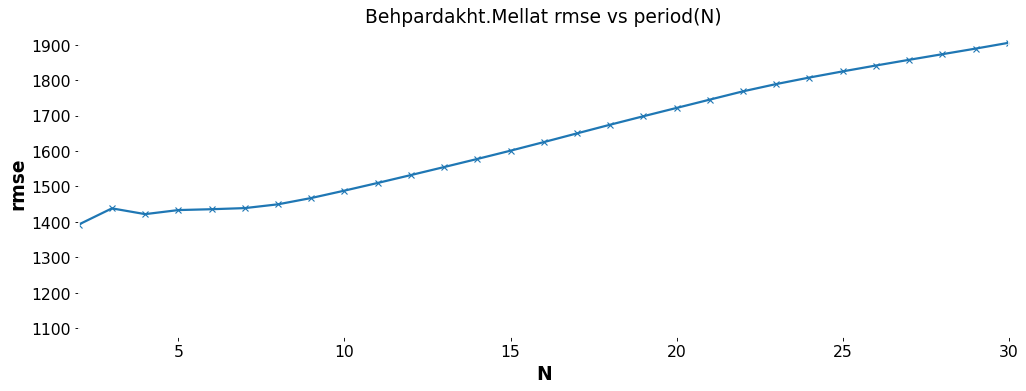

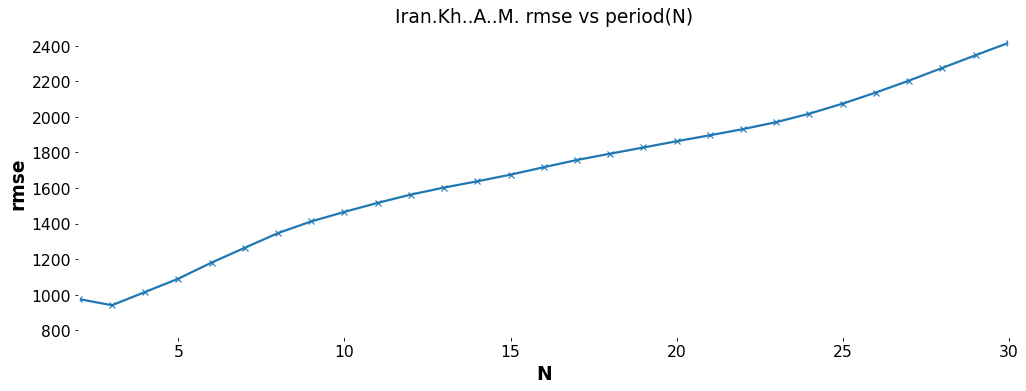

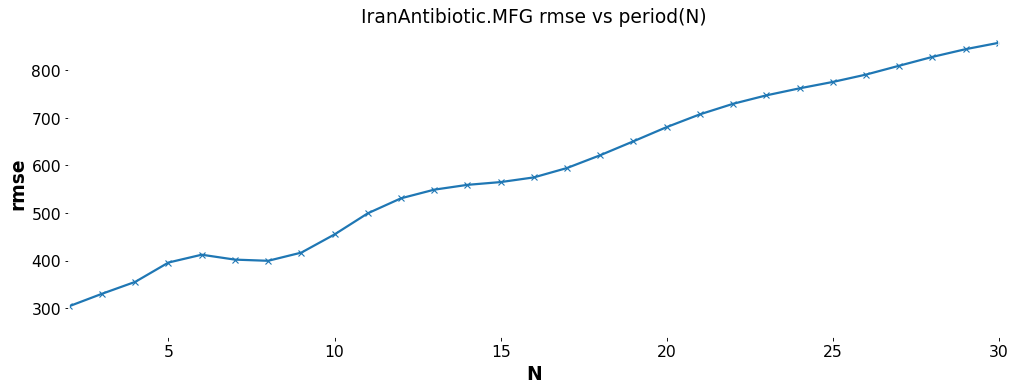

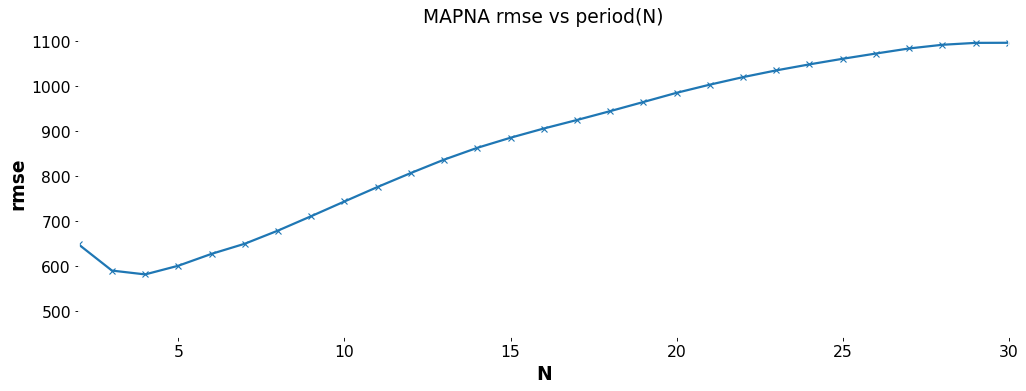

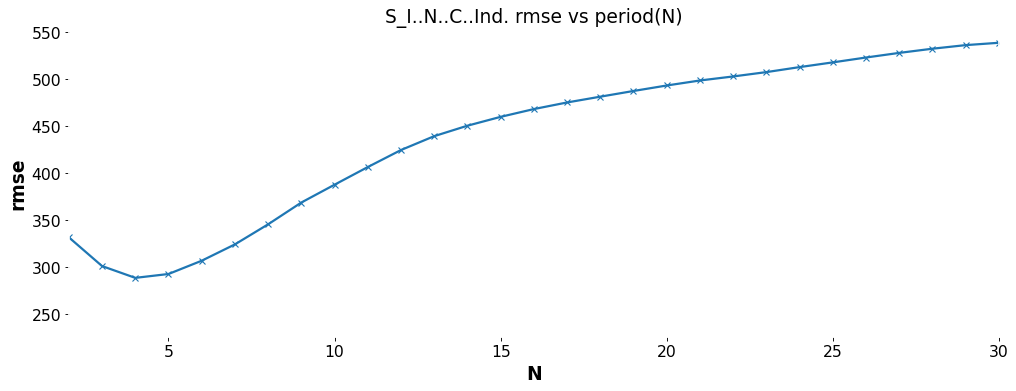

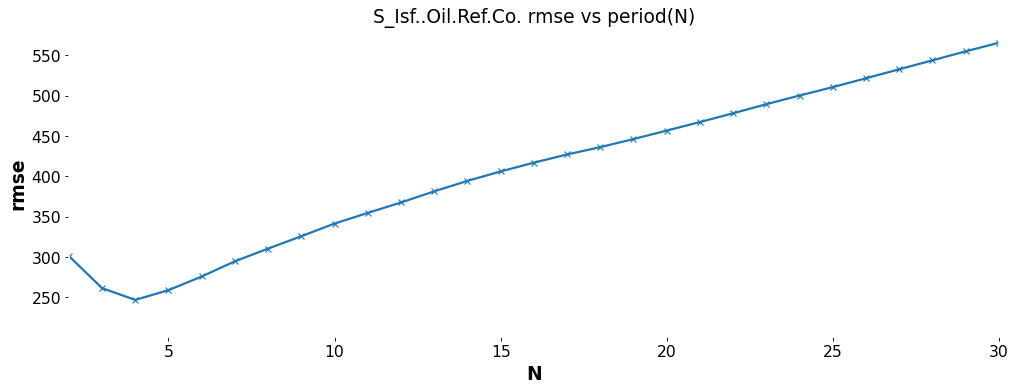

In [22]:
lr_sim.plot_param_vs_period(SAMPLE_STOCK_NAME, LinearRegressionModel.rmse)

##### r2

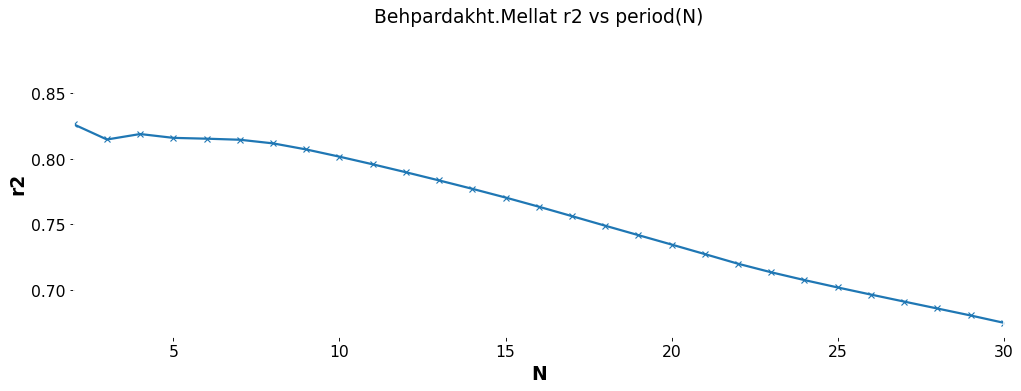

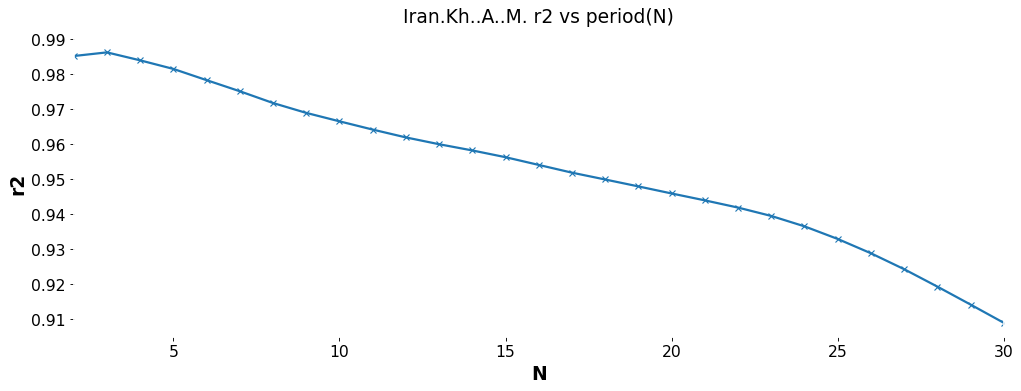

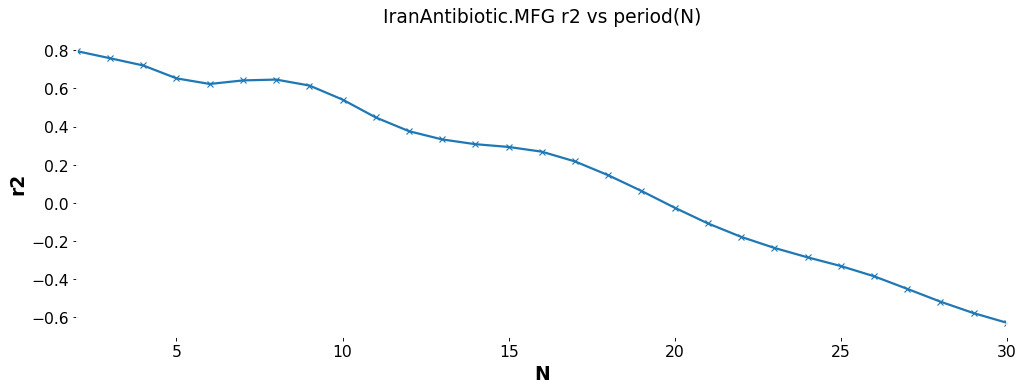

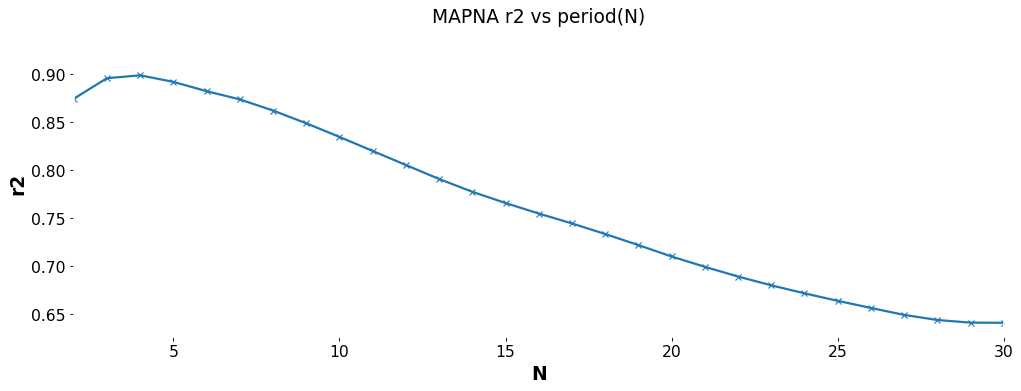

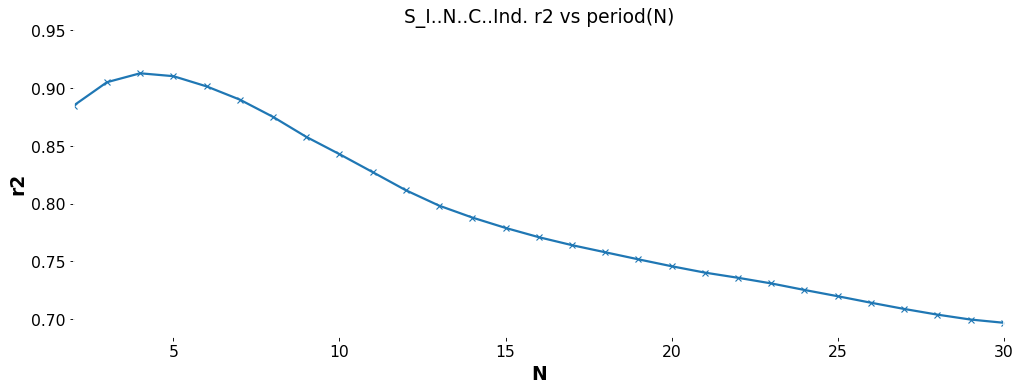

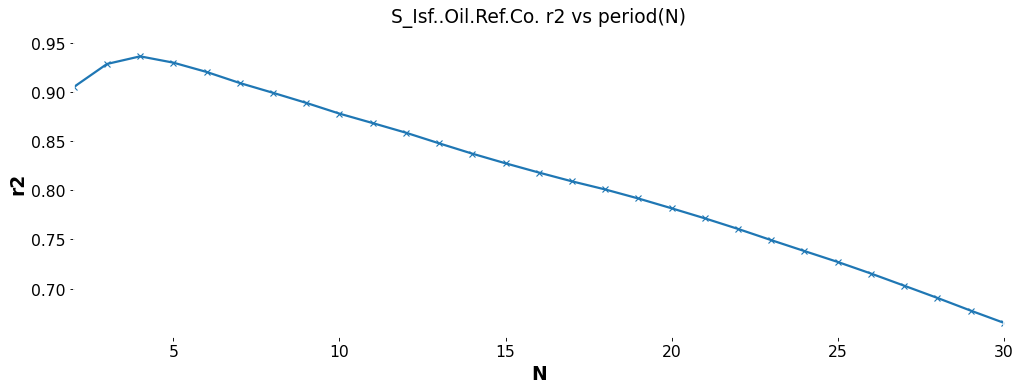

In [23]:
lr_sim.plot_param_vs_period(SAMPLE_STOCK_NAME, LinearRegressionModel.r2)

##### mape

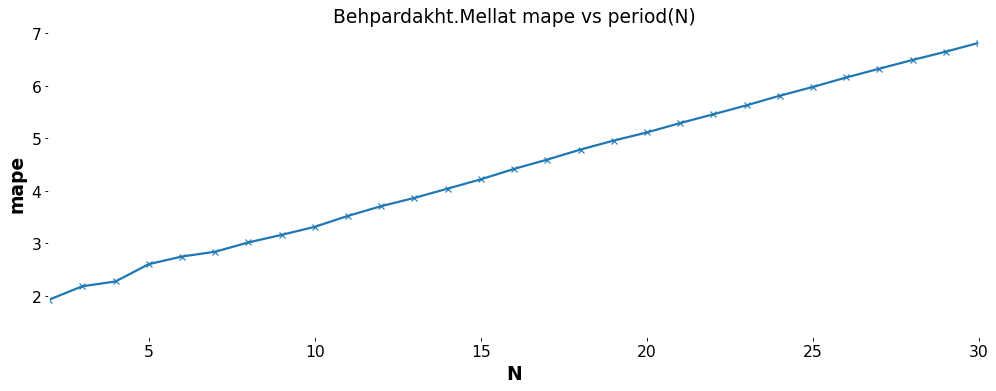

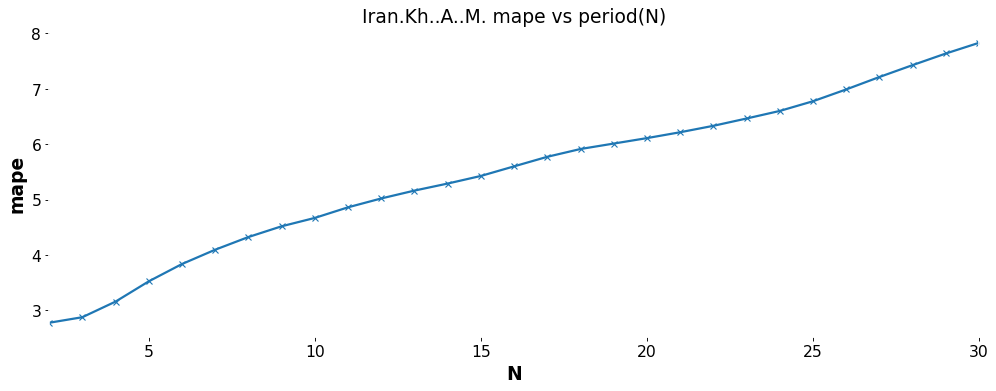

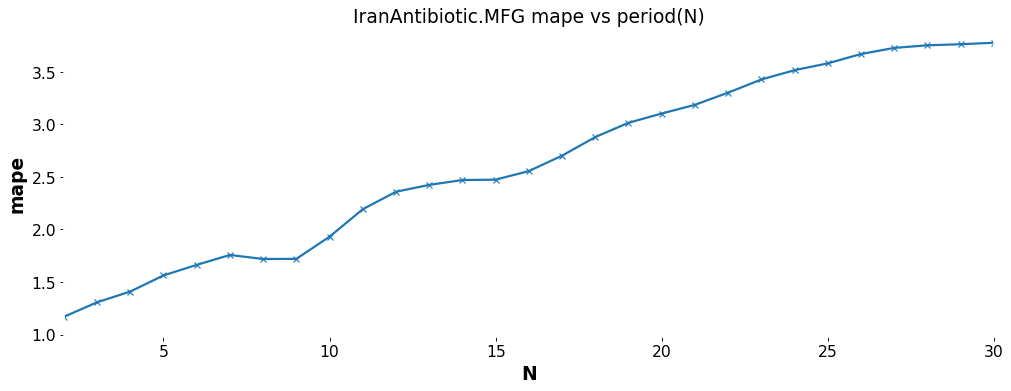

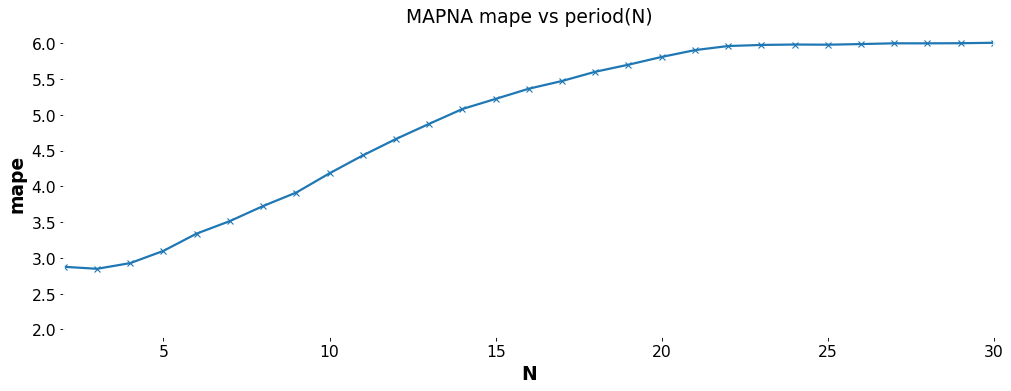

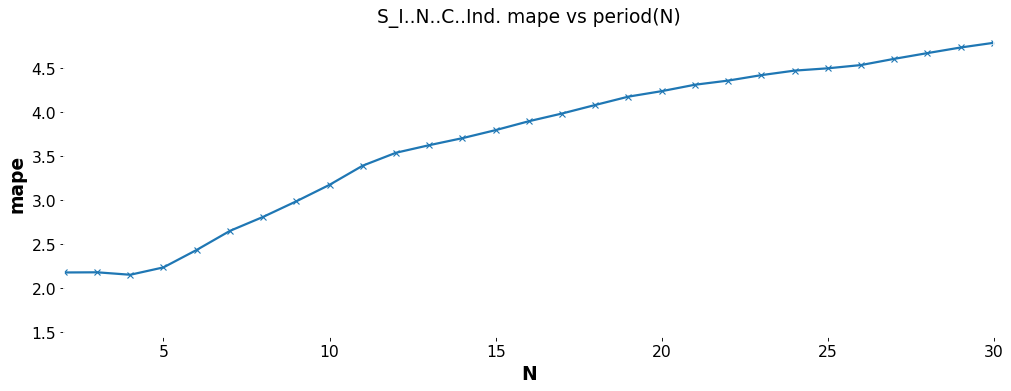

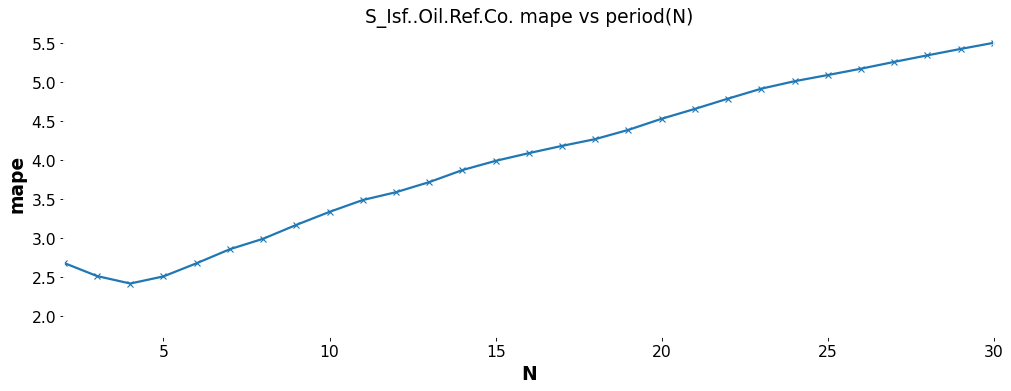

In [24]:
lr_sim.plot_param_vs_period(SAMPLE_STOCK_NAME, LinearRegressionModel.mape)

#### Predicting future days

In [25]:
pred_df = lr_sim.predict_future_days(plot_list=[SAMPLE_STOCK_NAME])
pred_df

Behpardakht.Mellat  Iran.Kh..A..M.  IranAntibiotic.MFG         MAPNA  \
0          5746.000000    24379.000000        22255.000000  10878.000000   
1          5759.800000    24185.200000        22044.000000  10842.400000   
2          5791.840000    24018.660000        22017.700000  10783.920000   
3          5823.572000    24100.328000        21772.160000  10732.936000   
4          5848.137600    24028.732400        21749.878000  10678.988800   
5          5874.284080    23906.761920        21583.122400  10631.003040   
6          5905.106464    23883.895336        21476.498920  10575.532032   
7          5931.761531    23848.746909        21338.439936  10524.863306   
8          5958.576713    23759.293139        21241.774089  10472.783988   
9          5987.079981    23706.417881        21099.675583  10421.069426   
10         6015.080369    23663.435954        20987.416646  10368.265777   

    S_I..N..C..Ind.  S_Isf..Oil.Ref.Co.  
0       5963.000000         3315.500000  
1       5881.400000         3229.300000  
2       5803.620000         3142.790000  
3       5698.196000         3046.182000  
4       5632.346800         2958.650600  
5       5542.359440         2869.439480  
6       5456.778152         2778.114284  
7       5371.804002         2687.207087  
8       5291.791085         2598.372848  
9       5203.515835         2507.520491  
10      5120.447420         2417.057013